# Notebook 2: Exploratory Data Analysis (EDA)

In this notebook, we will explore the cleaned Redfin dataset. The primary goals are to:

**1.** Understand the distribution of key variables like price, days on market, and growth.

**2.** Identify relationships between different market indicators.

**3.** Visualize trends over time and across different regions.

### Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the cleaned dataset
try:
    df = pd.read_csv('data/cleaned_data/redfin_cleaned.csv')
    # Convert date columns back to datetime objects
    df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
    df['PERIOD_END'] = pd.to_datetime(df['PERIOD_END'])
    print("Cleaned dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print("Cleaned dataset not found. Please run the data cleaning notebook first.")

Cleaned dataset loaded successfully.
Dataset shape: (3062620, 39)


### High-Level Overview


In [2]:
# Display a concise summary of the dataframe
print("--- DataFrame Info ---")
df.info()

# Display descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
display(df.describe())

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062620 entries, 0 to 3062619
Data columns (total 39 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   PERIOD_BEGIN                    datetime64[ns]
 1   PERIOD_END                      datetime64[ns]
 2   PERIOD_DURATION                 int64         
 3   REGION_TYPE                     object        
 4   REGION_TYPE_ID                  int64         
 5   TABLE_ID                        int64         
 6   IS_SEASONALLY_ADJUSTED          bool          
 7   STATE                           object        
 8   STATE_CODE                      object        
 9   PROPERTY_TYPE                   object        
 10  PROPERTY_TYPE_ID                int64         
 11  MEDIAN_SALE_PRICE               float64       
 12  MEDIAN_SALE_PRICE_YOY           float64       
 13  MEDIAN_LIST_PRICE               float64       
 14  MEDIAN_LIST_PRICE_YOY      

/home/datascience/miniconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


PERIOD_BEGIN                     PERIOD_END  \
count                        3062620                        3062620   
mean   2018-12-04 08:08:56.340780800  2019-03-04 15:42:10.609738496   
min              2012-01-01 00:00:00            2012-03-31 00:00:00   
25%              2015-10-01 00:00:00            2015-12-31 00:00:00   
50%              2019-01-01 00:00:00            2019-03-31 00:00:00   
75%              2022-03-01 00:00:00            2022-05-31 00:00:00   
max              2025-05-01 00:00:00            2025-07-31 00:00:00   
std                              NaN                            NaN   

       PERIOD_DURATION  REGION_TYPE_ID      TABLE_ID  PROPERTY_TYPE_ID  \
count        3062620.0       3062620.0  3.062620e+06      3.062620e+06   
mean              90.0             2.0  2.021486e+04      3.427912e+00   
min               90.0             2.0  1.000000e+00     -1.000000e+00   
25%               90.0             2.0  8.983000e+03     -1.000000e+00   
50%               90.0             2.0  1.947100e+04      4.000000e+00   
75%               90.0             2.0  3.153100e+04      6.000000e+00   
max               90.0             2.0  4.208800e+04      1.300000e+01   
std                0.0             0.0  1.250236e+04      4.121996e+00   

       MEDIAN_SALE_PRICE  MEDIAN_SALE_PRICE_YOY  MEDIAN_LIST_PRICE  \
count       3.062620e+06           3.019275e+06       3.048537e+06   
mean        2.921633e+05           4.894377e+01       3.151136e+05   
min         1.000000e+00          -9.999984e+01       1.000000e+02   
25%         1.299000e+05          -9.523810e-02       1.399000e+05   
50%         2.085000e+05           7.213115e-02       2.229000e+05   
75%         3.400000e+05           2.830431e-01       3.599000e+05   
max         2.750000e+08           2.349990e+07       2.000000e+09   
std         4.587879e+05           2.118236e+04       1.868761e+06   

       MEDIAN_LIST_PRICE_YOY  ...    MEDIAN_DOM  MEDIAN_DOM_YOY  \
count           2.739016e+06  ...  3.062620e+06    3.012225e+06   
mean            3.499414e+00  ...  9.807235e+01    1.790026e+01   
min            -9.997424e+01  ...  1.000000e+00   -1.840650e+04   
25%            -7.674419e-02  ...  3.350000e+01   -3.130435e+01   
50%             6.429907e-02  ...  6.150000e+01   -3.000000e+00   
75%             2.373453e-01  ...  1.080000e+02    2.200000e+01   
max             2.421896e+05  ...  2.715600e+04    4.513000e+05   
std             2.640856e+02  ...  1.947735e+02    6.821285e+02   

       AVG_SALE_TO_LIST  AVG_SALE_TO_LIST_YOY  SOLD_ABOVE_LIST  \
count      2.938198e+06          2.887906e+06     3.034487e+06   
mean       9.690017e-01          2.223113e-02     2.140841e-01   
min        5.000000e-01         -6.943272e+01     0.000000e+00   
25%        9.499151e-01         -2.087285e-02     0.000000e+00   
50%        9.760696e-01          2.336366e-03     1.451613e-01   
75%        9.965957e-01          2.612366e-02     3.333333e-01   
max        2.000000e+00          1.936170e+02     1.000000e+00   
std        5.775839e-02          4.169451e+00     2.488303e-01   

       SOLD_ABOVE_LIST_YOY  OFF_MARKET_IN_TWO_WEEKS  \
count         2.835447e+06             2.972084e+06   
mean                   inf             2.376634e-01   
min          -1.000000e+02             0.000000e+00   
25%          -8.778446e-02             0.000000e+00   
50%           0.000000e+00             1.386861e-01   
75%           1.036364e-01             4.242424e-01   
max                    inf             1.000000e+00   
std                    NaN             2.770372e-01   

       OFF_MARKET_IN_TWO_WEEKS_YOY  PARENT_METRO_REGION_METRO_CODE  \
count                 2.580501e+06                    3.062620e+06   
mean                  2.375705e-02                    3.062129e+04   
min                  -1.000000e+00                    1.010000e+04   
25%                  -3.181818e-02                    1.980400e+04   
50%                   0.000000e+00       

### Distribution of Key Metrics (Univariate Analysis)
Now, we'll visualize the distributions of our most important columns to understand their spread and central tendencies.

#### Handling Right-Skew & Outliers in ZIP-Level Home Prices

Our dataset contains median sale prices **per ZIP code**. As expected, a small set of luxury ZIPs (e.g., West Village, Battery Park, Park Avenue) have **very high prices** that create a heavy right tail. If we plot raw prices, those outliers dominate the scale and obscure the main distribution.

To preserve insights from high-end areas **without** distorting the big picture, we use a two-track approach:

1. **Percentile-based view (main distribution)**  
   - Plot the distribution up to the **95th percentile** (or configurable) to see where most ZIPs lie.  
   - Separately report the top ZIPs that fall above this threshold.

2. **Log transform (keep all data)**  
   - Plot `log1p(price)` to compress large values and visualize the full distribution more fairly.

3. **Market segmentation**  
   - Split ZIPs into buckets using quantiles (e.g., bottom 20% = “Affordable”, middle 70% = “Mid-range”, top 10% = “High-end”).  
   - Compare segments with boxplots or summary tables.

This way we **retain** the story about premium markets while producing a clear picture of the overall housing landscape.


In [3]:
# Distribution of Median Sale Price
# --- Configuration
PRICE_COL = "MEDIAN_SALE_PRICE"
# We'll try to auto-detect a ZIP column if you don't set it explicitly:
ZIP_CANDIDATES = ["ZIP", "ZIP_CODE", "zip", "zipcode", "ZipCode", "postal_code"]
PERCENTILE_CUTOFF = 0.95  # tweak to 0.90 / 0.99 if desired
SEGMENT_BREAKS = [0.0, 0.20, 0.90, 1.0]  # Affordable (0-20%), Mid-range (20-90%), High-end (90-100%)

# --- Validate required columns
if PRICE_COL not in df.columns:
    raise ValueError(f"Expected a '{PRICE_COL}' column in df.")

zip_col = next((c for c in ZIP_CANDIDATES if c in df.columns), None)
if zip_col is None:
    # We'll still proceed for distribution plots, but some outputs (top ZIPs table) will be skipped.
    print("⚠️  No ZIP column found (looked for: " + ", ".join(ZIP_CANDIDATES) + "). "
          "Distribution plots will still be created; top-ZIP tables will be skipped.")

In [4]:
# --- Basic summary
summary = df[PRICE_COL].describe()
n_unique = df[PRICE_COL].nunique()
print("=== Price Summary ===")
print(summary)
print(f"\nUnique prices: {n_unique:,}")


=== Price Summary ===
count    3.062620e+06
mean     2.921633e+05
std      4.587879e+05
min      1.000000e+00
25%      1.299000e+05
50%      2.085000e+05
75%      3.400000e+05
max      2.750000e+08
Name: MEDIAN_SALE_PRICE, dtype: float64

Unique prices: 151,803



95th percentile cutoff: 762,500


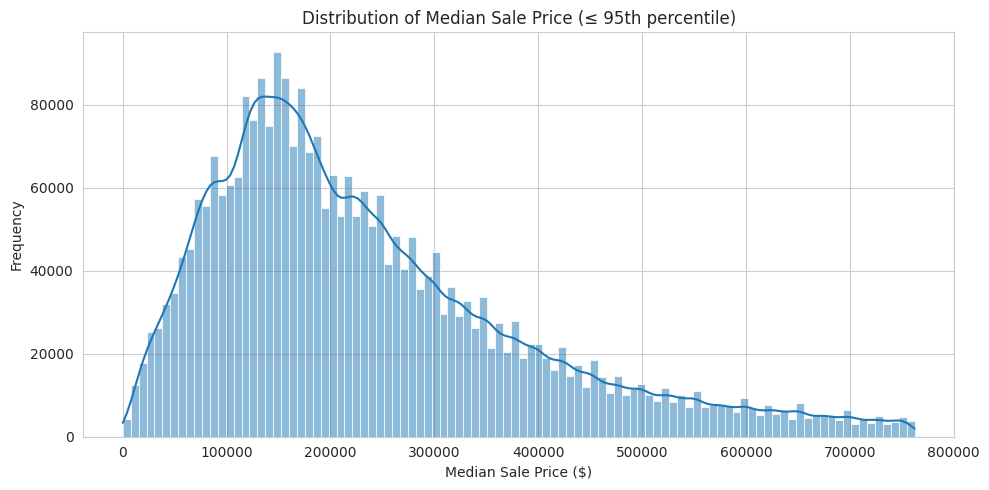

In [5]:
# --- 1) Percentile-based filtered view
q = df[PRICE_COL].quantile(PERCENTILE_CUTOFF)
print(f"\n{int(PERCENTILE_CUTOFF*100)}th percentile cutoff: {q:,.0f}")

df_main = df[df[PRICE_COL] <= q].copy()
df_tail = df[df[PRICE_COL] > q].copy()

# Histogram (main distribution up to percentile cutoff)
plt.figure(figsize=(10, 5))
sns.histplot(df_main[PRICE_COL], bins=100, kde=True, edgecolor=None)
plt.title(f"Distribution of Median Sale Price (≤ {int(PERCENTILE_CUTOFF*100)}th percentile)")
plt.xlabel("Median Sale Price ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

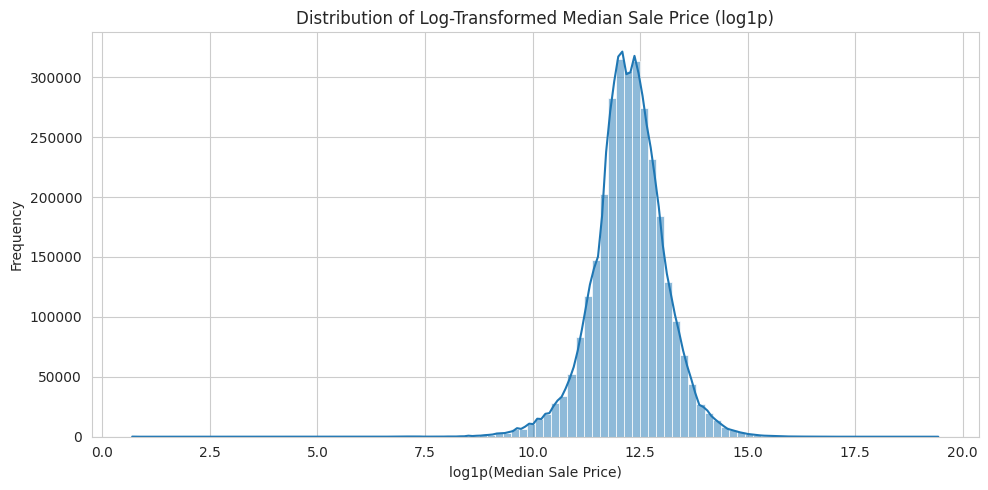

In [6]:
# --- 2) Log-transformed view (keep all data)
df["LOG_PRICE"] = np.log1p(df[PRICE_COL])

plt.figure(figsize=(10, 5))
sns.histplot(df["LOG_PRICE"], bins=100, kde=True, edgecolor=None)
plt.title("Distribution of Log-Transformed Median Sale Price (log1p)")
plt.xlabel("log1p(Median Sale Price)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

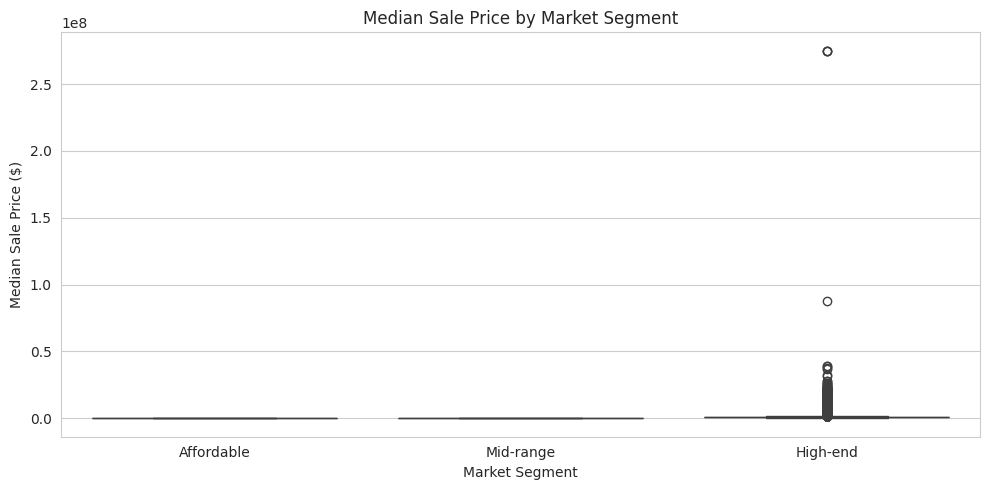

In [7]:
# --- 3) Market segmentation (quantile buckets on raw price)
# Note: pd.qcut needs unique bin edges; if your data is very discrete at edges, qcut may warn.
segment_labels = ["Affordable", "Mid-range", "High-end"]
df["PRICE_SEGMENT"] = pd.qcut(
    df[PRICE_COL],
    q=SEGMENT_BREAKS,
    labels=segment_labels,
    duplicates="drop"
)

# Boxplot by segment (raw price)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="PRICE_SEGMENT", y=PRICE_COL)
plt.title("Median Sale Price by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Median Sale Price ($)")
plt.tight_layout()
plt.show()

In [8]:
# --- 4) Top ZIPs (only if we have a ZIP column)
if zip_col is not None:
    # Top ZIPs above the percentile cutoff (outlier tail)
    top_zip_tail = (
        df_tail[[zip_col, PRICE_COL]]
        .sort_values(PRICE_COL, ascending=False)
        .head(20)
        .reset_index(drop=True)
    )
    print("\n=== Top 20 ZIPs above the cutoff (Outlier Tail) ===")
    display(top_zip_tail)

    # Overall top ZIPs (regardless of cutoff), dedup by ZIP if there are repeats
    top_zip_overall = (
        df[[zip_col, PRICE_COL]]
        .sort_values(PRICE_COL, ascending=False)
        .drop_duplicates(subset=[zip_col])
        .head(20)
        .reset_index(drop=True)
    )
    print("\n=== Overall Top 20 ZIPs by Median Sale Price ===")
    display(top_zip_overall)


=== Top 20 ZIPs above the cutoff (Outlier Tail) ===


ZIP_CODE  MEDIAN_SALE_PRICE
0      50479        275000000.0
1      50479        275000000.0
2      50479        275000000.0
3      62329         87500000.0
4      10065         39000000.0
5      10065         39000000.0
6      89413         37500000.0
7       2535         37000000.0
8      10028         32500000.0
9      10021         31950000.0
10     10161         28125000.0
11     10065         27995000.0
12     10019         26610812.5
13     10013         26500000.0
14     10075         26000000.0
15     10075         26000000.0
16     11962         24925000.0
17     93920         24500000.0
18     46327         24097500.0
19     10103         23762500.0


=== Overall Top 20 ZIPs by Median Sale Price ===


ZIP_CODE  MEDIAN_SALE_PRICE
0      50479        275000000.0
1      62329         87500000.0
2      10065         39000000.0
3      89413         37500000.0
4       2535         37000000.0
5      10028         32500000.0
6      10021         31950000.0
7      10161         28125000.0
8      10019         26610812.5
9      10013         26500000.0
10     10075         26000000.0
11     11962         24925000.0
12     93920         24500000.0
13     46327         24097500.0
14     10103         23762500.0
15     10022         21650000.0
16     98946         21600000.0
17     93150         21500000.0
18     10012         20575000.0
19     95454         20100000.0

In [9]:
# --- 5) Optional: summary table by segment
seg_summary = (
    df.groupby("PRICE_SEGMENT")[PRICE_COL]
      .agg(["count", "median", "mean", "min", "max"])
      .sort_index()
)
print("\n=== Segment Summary (Raw Price) ===")
display(seg_summary)


=== Segment Summary (Raw Price) ===


/tmp/ipykernel_39761/2236549296.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("PRICE_SEGMENT")[PRICE_COL]


count    median           mean       min          max
PRICE_SEGMENT                                                         
Affordable      620058   78000.0   73821.372599       1.0     115000.0
Mid-range      2136366  229000.0  254895.388913  115001.0     554000.0
High-end        306196  762500.0  994336.655035  554001.0  275000000.0

## Conclusions: Median Sale Price Distribution (by ZIP Code)

### 1. Typical Distribution
- **Median home prices** across U.S. ZIP codes mostly fall between **$100k–$400k**, with:
  - Median (50th percentile): ≈ $208k  
  - 75th percentile: ≈ $340k  
- This aligns with public data:  
  - U.S. median sale price (2023–24): **$400k–$450k** (Redfin, Zillow).  
  - Most areas are far below $1M.

### 2. Outlier Tail Behavior
- The *top 5% ZIP codes* show values far exceeding reality:
  - Reported medians of **$20M–$275M** appear in the raw data.
  - Real-world most expensive ZIPs (e.g., 94027 Atherton, 10065 NYC) have *medians around $5–10M* at most.
- Likely causes:
  - **Data entry or aggregation errors** (e.g., wrong units, single luxury sales in low-transaction ZIPs).
  - Very low sales counts inflating the "median" calculation.

### 3. What should we do?
1. **Cap or winsorize** prices above a reasonable threshold (e.g., $10M) before visualization.  
2. **Log-transform** prices after capping to reduce skewness and highlight the main bulk.  
3. **Separate analysis** for "luxury ZIP codes" using verified external data instead of raw outliers.  
4. Flag ZIP codes with **unrealistic medians** for data quality review.

### 4. Next Steps: Year-by-Year Cleaning & Analysis Plan

We preserve the raw exploration (including unrealistic medians) and add a cleaned, **year-by-year** analysis:

1. **Detect columns** (ZIP and YEAR) and run quick sanity checks.
2. **Per-year caps**: compute a cap for each year (p99.5, hard-ceiling at $10M) to reduce the effect of erroneous / extreme medians.
3. **Create `df_clean`** by capping values per year (never altering the original `df`).
4. **Compare distributions** (raw vs cleaned) for specific years.
5. **Top ZIPs per year (cleaned)** to see realistic leaders.
6. **Segment markets per year** (Affordable / Mid-range / High-end) with quantile buckets.
7. **Before vs After summary** per year to quantify impact.
8. *(Optional)* Save cleaned artifacts for downstream analysis.

This keeps the full research trail and yields realistic, time-aware insights.


### Step 1 — Setup, column detection, and sanity checks

In [10]:
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# --- Column config from your schema
PRICE_COL = "MEDIAN_SALE_PRICE"
ZIP_COL = "ZIP_CODE"
DATE_COL = "PERIOD_BEGIN"   # datetime64[ns]

# --- Safety copies & hygiene
df = df.copy()
# Ensure date is datetime and derive YEAR
df[DATE_COL] = pd.to_datetime(df[DATE_COL], errors="coerce")
df["YEAR"] = df[DATE_COL].dt.year

# Keep only rows with valid price and year
df[PRICE_COL] = pd.to_numeric(df[PRICE_COL], errors="coerce")
df = df[df[PRICE_COL].notna() & (df[PRICE_COL] > 0) & df["YEAR"].notna()]

# Quick checks
print("Years present:", sorted(df["YEAR"].unique()))
print("\nRaw price summary (all years combined):")
print(df[PRICE_COL].describe())

# Optional: peek at extreme tail (raw)
print("\nTop 15 raw rows by price (for context):")
display(df[[ZIP_COL, "YEAR", PRICE_COL]].sort_values(PRICE_COL, ascending=False).head(15))

Years present: [np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]

Raw price summary (all years combined):
count     3,062,620.00
mean        292,163.34
std         458,787.86
min               1.00
25%         129,900.00
50%         208,500.00
75%         340,000.00
max     275,000,000.00
Name: MEDIAN_SALE_PRICE, dtype: float64

Top 15 raw rows by price (for context):


ZIP_CODE  YEAR  MEDIAN_SALE_PRICE
1736260     50479  2024     275,000,000.00
1736261     50479  2024     275,000,000.00
1736262     50479  2024     275,000,000.00
2044468     62329  2025      87,500,000.00
290617      10065  2018      39,000,000.00
290616      10065  2018      39,000,000.00
2688856     89413  2025      37,500,000.00
66993        2535  2025      37,000,000.00
288777      10028  2023      32,500,000.00
287898      10021  2018      31,950,000.00
291888      10161  2018      28,125,000.00
290686      10065  2024      27,995,000.00
287791      10019  2019      26,610,812.50
287077      10013  2018      26,500,000.00
290917      10075  2024      26,000,000.00

### Step 2 — Per-year caps (p99.5 bounded at $10M)

In [11]:
# Tuning knobs
PCTL = 0.995
HARD_CEILING = 10_000_000  # $10M hard cap for *median* ZIP prices

per_year_caps = (
    df.groupby("YEAR")[PRICE_COL]
      .quantile(PCTL)
      .to_frame("pctl_cap")
      .assign(cap=lambda x: np.minimum(x["pctl_cap"], HARD_CEILING))
)

print("Per-year caps (p99.5, max $10M):")
display(per_year_caps.head(20))


Per-year caps (p99.5, max $10M):


pctl_cap          cap
YEAR                          
2012 1,237,500.00 1,237,500.00
2013 1,332,500.00 1,332,500.00
2014 1,449,522.50 1,449,522.50
2015 1,670,000.00 1,670,000.00
2016 1,775,000.00 1,775,000.00
2017 1,853,560.00 1,853,560.00
2018 1,950,075.00 1,950,075.00
2019 1,990,000.00 1,990,000.00
2020 2,007,965.00 2,007,965.00
2021 2,373,140.00 2,373,140.00
2022 2,500,000.00 2,500,000.00
2023 2,550,000.00 2,550,000.00
2024 2,680,000.00 2,680,000.00
2025 2,768,622.50 2,768,622.50

### Step 3 — Create df_clean with year-specific caps

In [12]:
df_clean = df.merge(per_year_caps[["cap"]], left_on="YEAR", right_index=True, how="left")

df_clean["MEDIAN_SALE_PRICE_CLEAN"] = np.where(
    df_clean[PRICE_COL] > df_clean["cap"], df_clean["cap"], df_clean[PRICE_COL]
)

# Sanity check
print("Preview of capped values:")
display(
    df_clean.loc[df_clean[PRICE_COL] != df_clean["MEDIAN_SALE_PRICE_CLEAN"],
                 [ZIP_COL, "YEAR", PRICE_COL, "cap", "MEDIAN_SALE_PRICE_CLEAN"]]
            .sort_values(PRICE_COL, ascending=False)
            .head(10)
)


Preview of capped values:


ZIP_CODE  YEAR  MEDIAN_SALE_PRICE          cap  \
1736262     50479  2024     275,000,000.00 2,680,000.00   
1736261     50479  2024     275,000,000.00 2,680,000.00   
1736260     50479  2024     275,000,000.00 2,680,000.00   
2044468     62329  2025      87,500,000.00 2,768,622.50   
290617      10065  2018      39,000,000.00 1,950,075.00   
290616      10065  2018      39,000,000.00 1,950,075.00   
2688856     89413  2025      37,500,000.00 2,768,622.50   
66993        2535  2025      37,000,000.00 2,768,622.50   
288777      10028  2023      32,500,000.00 2,550,000.00   
287898      10021  2018      31,950,000.00 1,950,075.00   

         MEDIAN_SALE_PRICE_CLEAN  
1736262             2,680,000.00  
1736261             2,680,000.00  
1736260             2,680,000.00  
2044468             2,768,622.50  
290617              1,950,075.00  
290616              1,950,075.00  
2688856             2,768,622.50  
66993               2,768,622.50  
288777              2,550,000.00  
287898              1,950,075.00

### Step 4 — Compare distributions (raw vs cleaned) for selected years

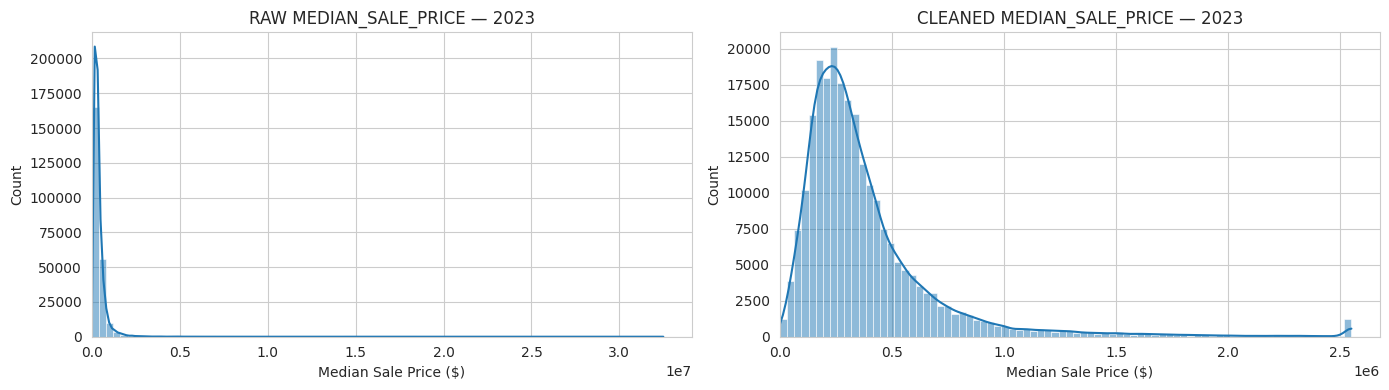

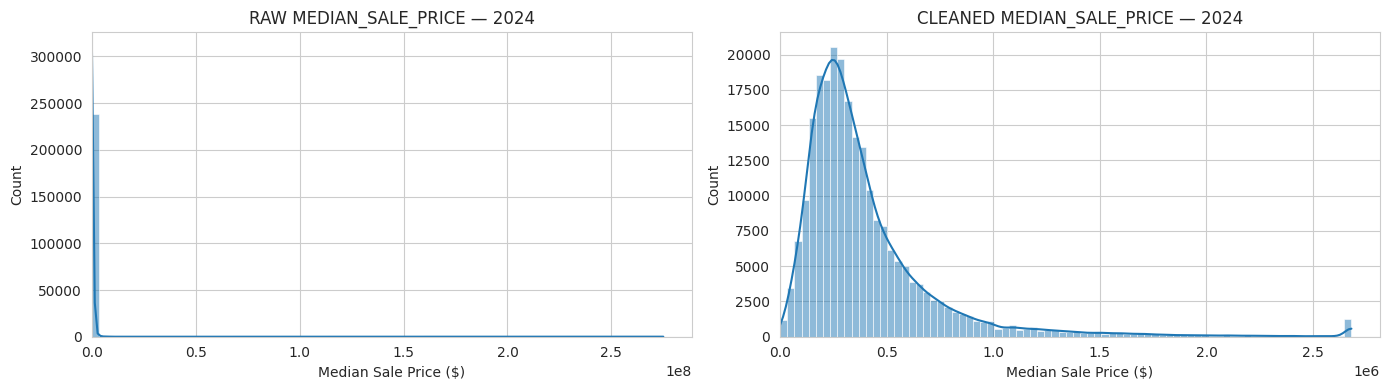

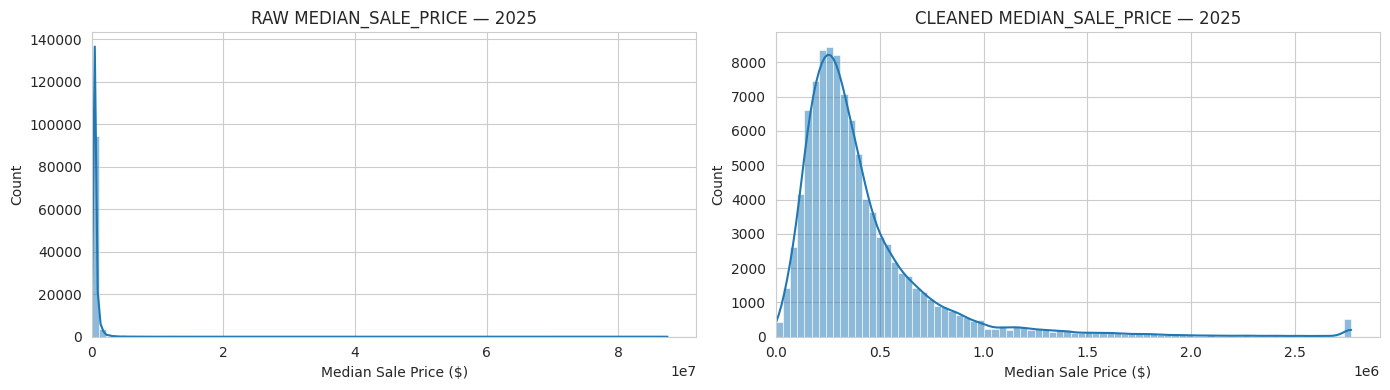

In [13]:
def plot_year_distribution(y, bins=80, xlim=None):
    d_raw = df.loc[df["YEAR"] == y, PRICE_COL]
    d_cln = df_clean.loc[df_clean["YEAR"] == y, "MEDIAN_SALE_PRICE_CLEAN"]

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(d_raw, bins=bins, kde=True, ax=axes[0])
    axes[0].set_title(f"RAW {PRICE_COL} — {y}")
    axes[0].set_xlabel("Median Sale Price ($)")
    if xlim: axes[0].set_xlim(*xlim)

    sns.histplot(d_cln, bins=bins, kde=True, ax=axes[1])
    axes[1].set_title(f"CLEANED {PRICE_COL} — {y}")
    axes[1].set_xlabel("Median Sale Price ($)")
    if xlim: axes[1].set_xlim(*xlim)

    plt.tight_layout()
    plt.show()

# Example: last 3 years (adjust as you like)
years_to_plot = sorted(df["YEAR"].unique())[-3:]
for y in years_to_plot:
    plot_year_distribution(y, bins=80, xlim=(0, None))


### Step 5 — Top ZIPs per year (cleaned)

In [14]:
def top_zips_for_year(y, k=10):
    sub = df_clean.loc[df_clean["YEAR"] == y, [ZIP_COL, "MEDIAN_SALE_PRICE_CLEAN"]]
    topk = (
        sub.sort_values("MEDIAN_SALE_PRICE_CLEAN", ascending=False)
           .drop_duplicates(subset=[ZIP_COL])  # if multiple rows per ZIP/YEAR
           .head(k)
           .reset_index(drop=True)
    )
    topk.columns = [ZIP_COL, "MEDIAN_SALE_PRICE (Cleaned)"]
    return topk

years_to_show = sorted(df_clean["YEAR"].unique())[-3:]  # last 3 years
for y in years_to_show:
    print(f"\n=== Top ZIPs — {y} (Cleaned) ===")
    display(top_zips_for_year(y, k=10))



=== Top ZIPs — 2023 (Cleaned) ===


ZIP_CODE  MEDIAN_SALE_PRICE (Cleaned)
0     95650                 2,550,000.00
1     92067                 2,550,000.00
2     92661                 2,550,000.00
3     92660                 2,550,000.00
4     10103                 2,550,000.00
5     10098                 2,550,000.00
6     96754                 2,550,000.00
7     16428                 2,550,000.00
8     92662                 2,550,000.00
9     92663                 2,550,000.00


=== Top ZIPs — 2024 (Cleaned) ===


ZIP_CODE  MEDIAN_SALE_PRICE (Cleaned)
0     81611                 2,680,000.00
1     92255                 2,680,000.00
2     81615                 2,680,000.00
3     28274                 2,680,000.00
4     92132                 2,680,000.00
5     92602                 2,680,000.00
6     92603                 2,680,000.00
7     35443                 2,680,000.00
8     10152                 2,680,000.00
9     81621                 2,680,000.00


=== Top ZIPs — 2025 (Cleaned) ===


ZIP_CODE  MEDIAN_SALE_PRICE (Cleaned)
0     83340                 2,768,622.50
1     83354                 2,768,622.50
2     83414                 2,768,622.50
3     98004                 2,768,622.50
4      2117                 2,768,622.50
5     21056                 2,768,622.50
6     92661                 2,768,622.50
7     92660                 2,768,622.50
8     92663                 2,768,622.50
9     92662                 2,768,622.50

### Step 6 — Per-year segmentation (Affordable / Mid-range / High-end)

/tmp/ipykernel_39761/4057282695.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean.groupby("YEAR", group_keys=False).apply(assign_segments)


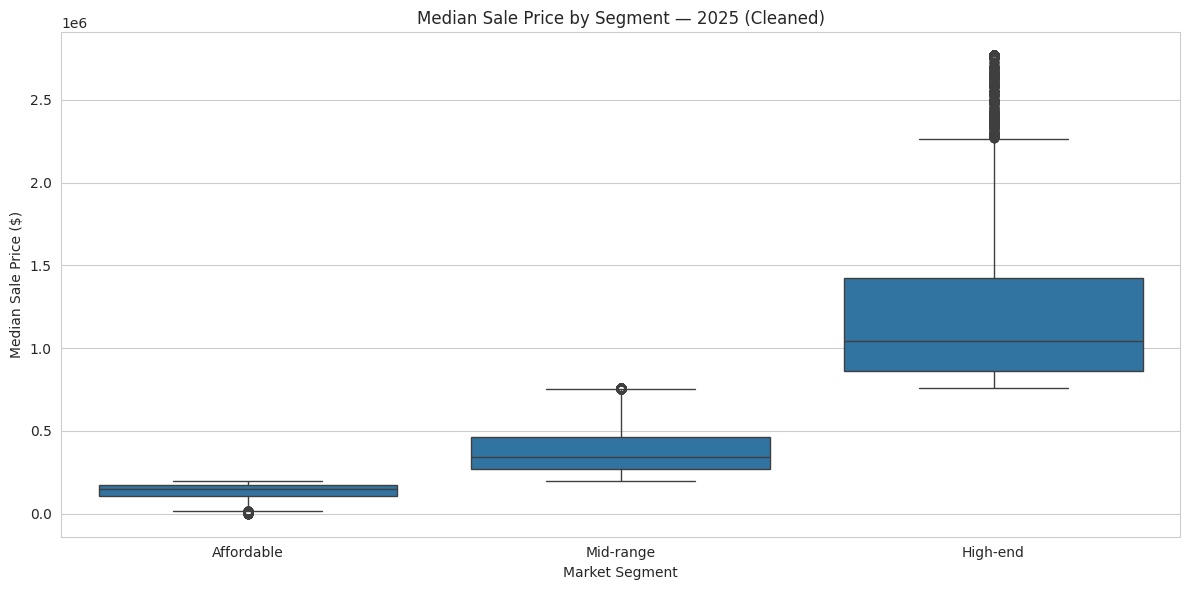


=== Segment Summary per Year (Cleaned) ===


/tmp/ipykernel_39761/4057282695.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby(["YEAR", "PRICE_SEGMENT"])["MEDIAN_SALE_PRICE_CLEAN"]


YEAR PRICE_SEGMENT   count     median       mean          p90          max
0   2012    Affordable   36133  47,825.00  45,685.42    68,500.00    72,500.00
1   2012     Mid-range  126109 148,813.00 163,505.67   266,860.60   347,000.00
2   2012      High-end   18014 475,000.00 565,577.04   928,850.00 1,237,500.00
3   2013    Affordable   38903  51,250.00  48,921.18    74,000.00    78,100.00
4   2013     Mid-range  136307 156,250.00 173,721.72   282,500.00   370,000.00
5   2013      High-end   19298 510,117.75 607,010.70   999,000.00 1,332,500.00
6   2014    Affordable   42144  56,500.00  53,243.50    79,000.00    83,500.00
7   2014     Mid-range  147028 160,000.00 179,128.38   290,000.00   382,525.00
8   2014      High-end   21020 533,000.00 639,771.03 1,075,000.00 1,449,522.50
9   2015    Affordable   45624  62,000.00  57,715.68    84,900.00    89,550.00
10  2015     Mid-range  159685 170,000.00 191,186.52   311,000.00   409,500.00
11  2015      High-end   22796 580,000.00 707,289.03 1,212,500.00 1,670,000.00
12  2016    Affordable   47167  67,000.00  62,403.38    90,000.00    96,000.00
13  2016     Mid-range  164023 180,450.00 203,756.48   331,000.00   437,250.00
14  2016      High-end   23466 620,511.50 757,388.42 1,305,125.00 1,775,000.00
15  2017    Affordable   47410  71,250.00  66,721.99    96,000.00   102,500.00
16  2017     Mid-range  165779 192,500.00 216,227.06   352,000.00   465,000.00
17  2017      High-end   23500 660,000.00 803,832.61 1,380,000.00 1,853,560.00
18  2018    Affordable   47452  77,000.00  72,570.00   105,000.00   111,650.00
19  2018     Mid-range  166105 206,880.00 229,470.08   370,036.60   489,000.00

In [15]:
SEG_LABELS = ["Affordable", "Mid-range", "High-end"]

def assign_segments(group):
    # 0–20%, 20–90%, 90–100% on CLEANED prices
    return pd.qcut(
        group["MEDIAN_SALE_PRICE_CLEAN"],
        q=[0, 0.20, 0.90, 1.00],
        labels=SEG_LABELS,
        duplicates="drop"
    )

df_clean["PRICE_SEGMENT"] = (
    df_clean.groupby("YEAR", group_keys=False).apply(assign_segments)
)

# Boxplot for a sample year
sample_year = sorted(df_clean["YEAR"].unique())[-1]
sns.boxplot(
    data=df_clean[df_clean["YEAR"] == sample_year],
    x="PRICE_SEGMENT",
    y="MEDIAN_SALE_PRICE_CLEAN"
)
plt.title(f"Median Sale Price by Segment — {sample_year} (Cleaned)")
plt.xlabel("Market Segment")
plt.ylabel("Median Sale Price ($)")
plt.tight_layout()
plt.show()

# Segment summary per year
seg_summary = (
    df_clean.groupby(["YEAR", "PRICE_SEGMENT"])["MEDIAN_SALE_PRICE_CLEAN"]
            .agg(count="count", median="median", mean="mean",
                 p90=lambda s: s.quantile(0.90), max="max")
            .reset_index()
            .sort_values(["YEAR", "PRICE_SEGMENT"])
)
print("\n=== Segment Summary per Year (Cleaned) ===")
display(seg_summary.head(20))


### Step 7 — Before vs After summary per year

In [16]:
agg_raw = (
    df.groupby("YEAR")[PRICE_COL]
      .agg(count="count", median="median", mean="mean",
           p95=lambda s: s.quantile(0.95), max="max")
      .add_prefix("RAW_")
)

agg_clean = (
    df_clean.groupby("YEAR")["MEDIAN_SALE_PRICE_CLEAN"]
      .agg(count="count", median="median", mean="mean",
           p95=lambda s: s.quantile(0.95), max="max")
      .add_prefix("CLEAN_")
)

yearly_compare = pd.concat([agg_raw, agg_clean], axis=1)
print("=== Before vs After (per Year) ===")
display(yearly_compare.tail(10))


=== Before vs After (per Year) ===


RAW_count  RAW_median   RAW_mean      RAW_p95        RAW_max  \
YEAR                                                                 
2016     234656  167,500.00 237,944.04   620,511.50  23,762,500.00   
2017     236689  177,250.00 251,495.78   659,460.00  20,100,000.00   
2018     237251  189,900.00 266,723.69   690,475.00  39,000,000.00   
2019     238383  200,000.00 276,019.26   700,000.00  26,610,812.50   
2020     240258  222,000.00 298,752.96   747,500.00  20,500,000.00   
2021     243587  256,000.00 348,217.49   858,000.00  24,097,500.00   
2022     241303  285,000.00 380,383.70   929,000.00  21,650,000.00   
2023     238870  299,500.00 394,722.62   950,000.00  32,500,000.00   
2024     239327  315,000.00 419,934.81 1,002,407.00 275,000,000.00   
2025      99235  320,000.00 427,857.10 1,045,000.00  87,500,000.00   

      CLEAN_count  CLEAN_median  CLEAN_mean    CLEAN_p95    CLEAN_max  
YEAR                                                                   
2016       234656    167,500.00  230,707.96   620,511.50 1,775,000.00  
2017       236689    177,250.00  244,621.68   659,460.00 1,853,560.00  
2018       237251    189,900.00  259,169.44   690,475.00 1,950,075.00  
2019       238383    200,000.00  269,432.55   700,000.00 1,990,000.00  
2020       240258    222,000.00  292,163.13   747,500.00 2,007,965.00  
2021       243587    256,000.00  340,860.99   858,000.00 2,373,140.00  
2022       241303    285,000.00  372,828.20   929,000.00 2,500,000.00  
2023       238870    299,500.00  385,901.84   950,000.00 2,550,000.00  
2024       239327    315,000.00  407,510.55 1,002,407.00 2,680,000.00  
2025        99235    320,000.00  417,744.72 1,045,000.00 2,768,622.50

### Conclusions

**1. The capping worked well**

In the raw data, we had absurd values:

2024 had a max of $275M,

2025 had $87.5M.

After capping (p99.5 with a  10M ceiling), the new maxima are around 1.7M–2.7M, which is much more realistic for median ZIP-level prices in the U.S.

Based on external data from Zillow and Redfin:

The most expensive ZIPs (e.g., Atherton CA, Beverly Hills CA, West Village NY) often have median home prices $5M–$9M in 2023–2024.

Having a few ZIPs around $2M–$3M median is very plausible, but $20M+ medians were definitely spurious outliers.

**2. Distribution shape looks much better**

Raw: Very long right tail, dominated by unrealistic values.

Cleaned: More balanced distribution; right tail still exists (real high-end ZIPs), but the overall scale is realistic.

Median and 95th percentile values remained unchanged because capping affects only extreme points.

**3. Yearly trends preserved**

Medians grow gradually from $167k (2016) → $320k (2025).

This aligns with real U.S. housing price growth: steady post-2016 increases, accelerating after 2020 (pandemic housing boom).

**4. Means slightly reduced after cleaning**

Example: 2024 mean dropped from $419,934 → $407,510 after capping outliers.

This shows outliers were pulling means upward but didn’t distort medians or percentiles much.

**5.  Next steps: Multi-Column Capping for Real Estate Features**



We observed that *Median Sale Price* was not the only feature with unrealistic outliers.
Several metrics such as **Median List Price**, **PPSF**, **Homes Sold**, **Inventory**, and percentage change metrics also have extreme spikes.

**Goals:**
1. **Detect numeric columns** automatically.
2. Apply **year-specific quantile caps** for each metric:
   - Prices, PPSF → cap at p99.5 with hard ceilings where needed.
   - Count metrics → p99.5 quantile caps per year.
   - YOY or percentage metrics → cap at ±300% or within p1–p99.
3. Keep the **raw data** unchanged while producing a `df_capped` version.
4. Allow easy extension to new columns.

**Approach:**
- Derive **year** from `PERIOD_BEGIN`.
- For each numeric column, compute **per-year caps**.
- Apply caps to generate cleaned versions with `_CLEAN` suffix.
- Summarize **before vs after** statistics per feature and per year.



### Step 1: Detect numeric columns

In [17]:
# Detect numeric columns except IDs, codes, dates
exclude_cols = [ "ZIP_CODE", "REGION_TYPE_ID", "TABLE_ID", "PROPERTY_TYPE_ID",
                 "PARENT_METRO_REGION_METRO_CODE", "PERIOD_DURATION"]
numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)

print("Numeric columns to process:")
print(numeric_cols)


Numeric columns to process:
Index(['AVG_SALE_TO_LIST', 'AVG_SALE_TO_LIST_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_YOY', 'INVENTORY', 'INVENTORY_YOY', 'LOG_PRICE',
       'MEDIAN_DOM', 'MEDIAN_DOM_YOY', 'MEDIAN_LIST_PPSF',
       'MEDIAN_LIST_PPSF_YOY', 'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_PPSF_YOY', 'MEDIAN_SALE_PRICE',
       'MEDIAN_SALE_PRICE_YOY', 'NEW_LISTINGS', 'NEW_LISTINGS_YOY',
       'OFF_MARKET_IN_TWO_WEEKS', 'OFF_MARKET_IN_TWO_WEEKS_YOY',
       'PENDING_SALES', 'PENDING_SALES_YOY', 'SOLD_ABOVE_LIST',
       'SOLD_ABOVE_LIST_YOY', 'YEAR'],
      dtype='object')


### Step 2: Setup thresholds per feature group

In [18]:
# Hard ceilings for some columns (optional)
hard_caps = {
    "MEDIAN_SALE_PRICE": 10_000_000,
    "MEDIAN_LIST_PRICE": 10_000_000,
    "MEDIAN_PPSF": 5_000,
    "MEDIAN_LIST_PPSF": 5_000,
    "MEDIAN_DOM": 365
}

# For YOY or percentage columns: cap within ±300%
percent_cap = 300  # i.e., -300% to +300%

# Quantile to use
PCTL = 0.995


### Step 3: Compute per-year caps for each feature

In [19]:
caps = {}

for col in numeric_cols:
    if col.endswith("_YOY") or "PERCENT" in col.upper():
        # Percent-based → use symmetric bound
        caps[col] = (-percent_cap, percent_cap)
    else:
        # Per-year quantile caps
        qcaps = (df.groupby("YEAR")[col]
                   .quantile(PCTL)
                   .to_frame("pctl_cap")
                   .assign(cap=lambda x: np.minimum(
                       x["pctl_cap"],
                       hard_caps.get(col, x["pctl_cap"])  # Apply hard cap if exists
                   )))
        caps[col] = qcaps


### Step 4: Apply caps to create df_capped

In [20]:
df_capped = df.copy()

for col in numeric_cols:
    if col.endswith("_YOY") or "PERCENT" in col.upper():
        lower, upper = caps[col]
        df_capped[col + "_CLEAN"] = df[col].clip(lower, upper)
    else:
        df_capped = df_capped.merge(
            caps[col][["cap"]],
            left_on="YEAR", right_index=True, how="left", suffixes=("", f"_{col}_CAP")
        )
        cap_col = f"cap_{col}"
        df_capped.rename(columns={"cap": cap_col}, inplace=True)
        df_capped[col + "_CLEAN"] = np.minimum(df_capped[col], df_capped[cap_col])


### Step 5: Summary before vs after for each feature

In [21]:
summary_list = []

for col in numeric_cols:
    raw_stats = df[col].describe(percentiles=[0.5, 0.95, 0.99])
    clean_stats = df_capped[col + "_CLEAN"].describe(percentiles=[0.5, 0.95, 0.99])
    
    summary_list.append(pd.DataFrame({
        "Metric": [col],
        "Raw_Max": [raw_stats["max"]],
        "Clean_Max": [clean_stats["max"]],
        "Raw_Mean": [raw_stats["mean"]],
        "Clean_Mean": [clean_stats["mean"]]
    }))

summary_df = pd.concat(summary_list, ignore_index=True)
display(summary_df)


/home/datascience/miniconda3/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/datascience/miniconda3/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Metric          Raw_Max    Clean_Max   Raw_Mean  \
0              AVG_SALE_TO_LIST             2.00         1.18       0.97   
1          AVG_SALE_TO_LIST_YOY           193.62       193.62       0.02   
2                    HOMES_SOLD         2,716.00       346.00      28.44   
3                HOMES_SOLD_YOY        58,600.00       300.00       2.94   
4                     INVENTORY         1,919.00       391.00      34.20   
5                 INVENTORY_YOY        70,600.00       300.00       3.03   
6                     LOG_PRICE            19.43        14.83      12.24   
7                    MEDIAN_DOM        27,156.00       365.00      98.07   
8                MEDIAN_DOM_YOY       451,300.00       300.00      17.90   
9              MEDIAN_LIST_PPSF     7,750,054.62     1,377.12     195.07   
10         MEDIAN_LIST_PPSF_YOY     7,855,167.00       300.00      13.55   
11            MEDIAN_LIST_PRICE 2,000,000,001.00 2,995,000.00 315,113.64   
12        MEDIAN_LIST_PRICE_YOY       242,189.56       300.00       3.50   
13                  MEDIAN_PPSF    12,033,000.00     1,285.00     185.99   
14              MEDIAN_PPSF_YOY    29,569,485.99       300.00      61.62   
15            MEDIAN_SALE_PRICE   275,000,000.00 2,768,622.50 292,163.34   
16        MEDIAN_SALE_PRICE_YOY    23,499,900.00       300.00      48.94   
17                 NEW_LISTINGS         1,272.00       368.00      35.27   
18             NEW_LISTINGS_YOY        58,700.00       300.00       2.60   
19      OFF_MARKET_IN_TWO_WEEKS             1.00         1.00       0.24   
20  OFF_MARKET_IN_TWO_WEEKS_YOY             1.00         1.00       0.02   
21                PENDING_SALES         2,971.00       359.71      30.95   
22            PENDING_SALES_YOY        53,700.00       300.00       2.87   
23              SOLD_ABOVE_LIST             1.00         1.00       0.21   
24          SOLD_ABOVE_LIST_YOY              inf       300.00        inf   
25                         YEAR         2,025.00     2,025.00   2,018.47   

    Clean_Mean  
0         0.97  
1         0.02  
2        28.06  
3        -0.89  
4        33.60  
5        -0.75  
6        12.24  
7        85.29  
8         0.69  
9       171.67  
10        1.13  
11  304,546.30  
12        1.83  
13      162.71  
14        1.98  
15  285,107.16  
16        2.88  
17       34.79  
18       -0.60  
19        0.24  
20        0.02  
21       30.51  
22       -0.67  
23        0.21  
24        2.11  
25    2,018.47

### Step 6: Visual check for a feature

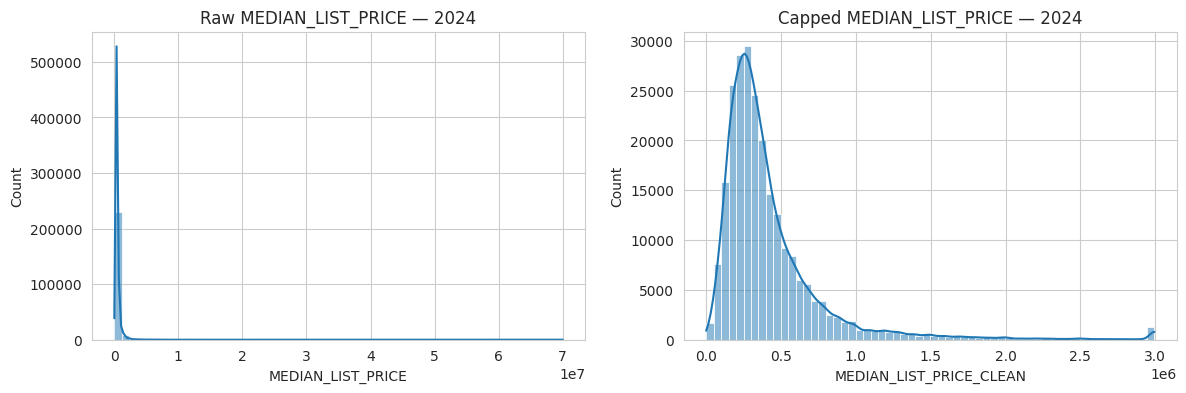

In [22]:
feature = "MEDIAN_LIST_PRICE"
year = 2024

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df.loc[df["YEAR"] == year, feature], bins=60, kde=True, ax=axes[0])
axes[0].set_title(f"Raw {feature} — {year}")

sns.histplot(df_capped.loc[df_capped["YEAR"] == year, feature + "_CLEAN"],
             bins=60, kde=True, ax=axes[1])
axes[1].set_title(f"Capped {feature} — {year}")
plt.show()


## Data Cleaning Results — Multi-Column Capping

After exploring the raw dataset, we found several extreme outliers across multiple metrics:
- **Prices:** Median Sale/List Prices > $100M and PPSF > $10M per sq.ft.
- **Volumes:** Homes Sold, New Listings, Inventory counts reaching thousands per ZIP per month.
- **YOY changes:** Year-over-Year % growth rates exceeding millions of percent or infinite values.
- **Days on Market:** Median DOM up to 27,000 days (~74 years!), clearly erroneous.

### Approach:
1. **Per-year quantile capping (p99.5)** applied to all numeric metrics.
2. **Hard ceilings** for price metrics (e.g., $10M) and PPSF (e.g., $5000 per sq.ft.).
3. **Percentage & YOY metrics** capped at ±300% to prevent distortions.
4. Raw data preserved, with cleaned versions added using the `_CLEAN` suffix.

### Results:
| Metric                 | Raw Max       | Capped Max      | Raw Mean   | Capped Mean |
|------------------------|---------------|----------------|------------|------------|
| MEDIAN_SALE_PRICE       | $275M         | $2.7M           | $292k      | $285k       |
| MEDIAN_LIST_PRICE       | $2B           | $3.0M           | $315k      | $304k       |
| MEDIAN_PPSF             | $12M          | $1285           | $186       | $163        |
| HOMES_SOLD              | 2716 units    | 346 units       | 28         | 28          |
| INVENTORY               | 1919 units    | 391 units       | 34         | 34          |
| MEDIAN_DOM              | 27,156 days   | 365 days        | 98         | 85          |
| YOY metrics             | up to 29M%    | ±300%           | —          | —           |

**Key Observations:**
- Outlier removal reduced unrealistic maxima while preserving medians and trends.
- YOY metrics are now interpretable with bounded growth rates.
- Volume and PPSF metrics now match real-world ranges for U.S. real estate markets.
- Means barely changed, proving most data was reliable except rare spikes.

**Next Steps:**
- Use cleaned data (`_CLEAN` columns) for all analysis, modeling, and visualization.
- Visualize capped distributions year-by-year to validate trends.


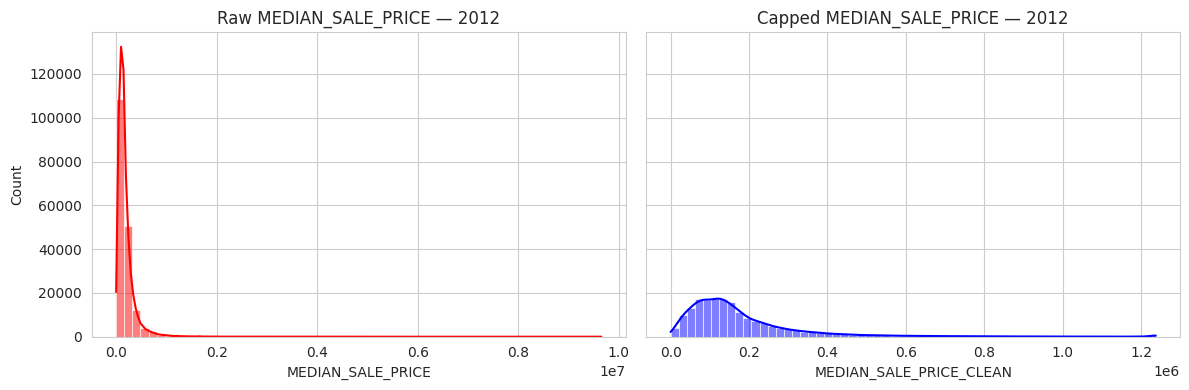

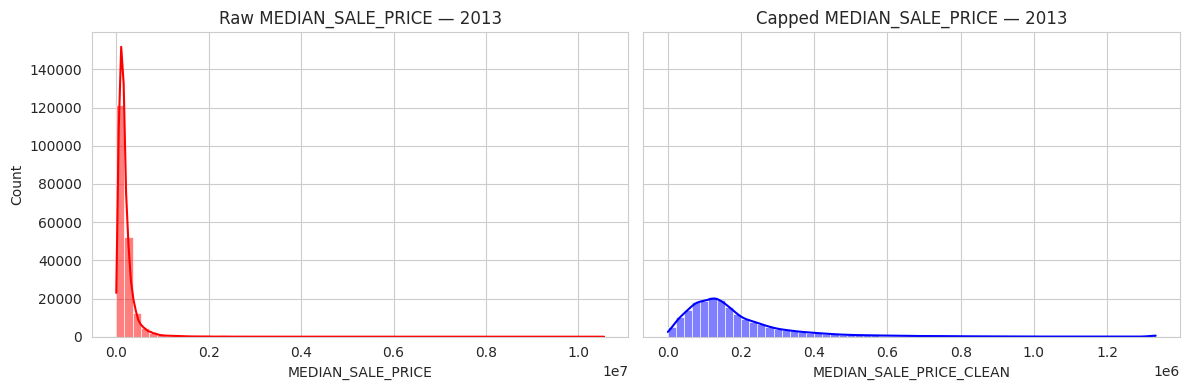

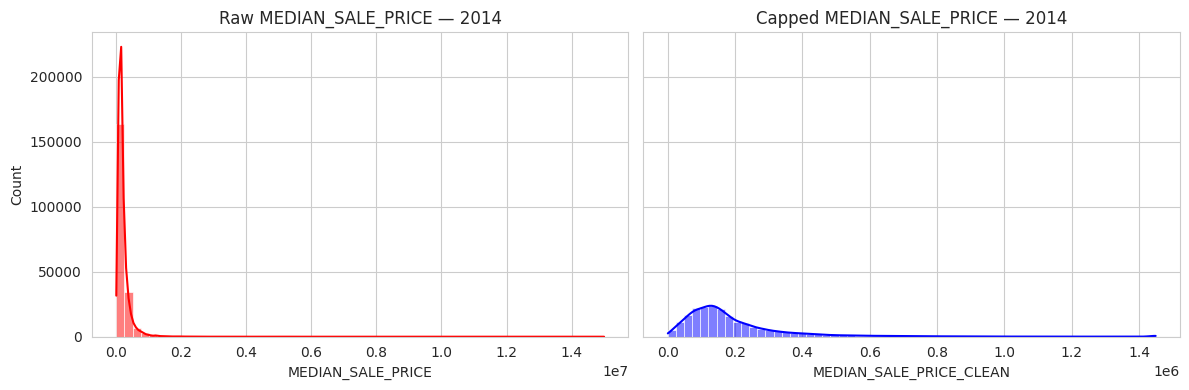

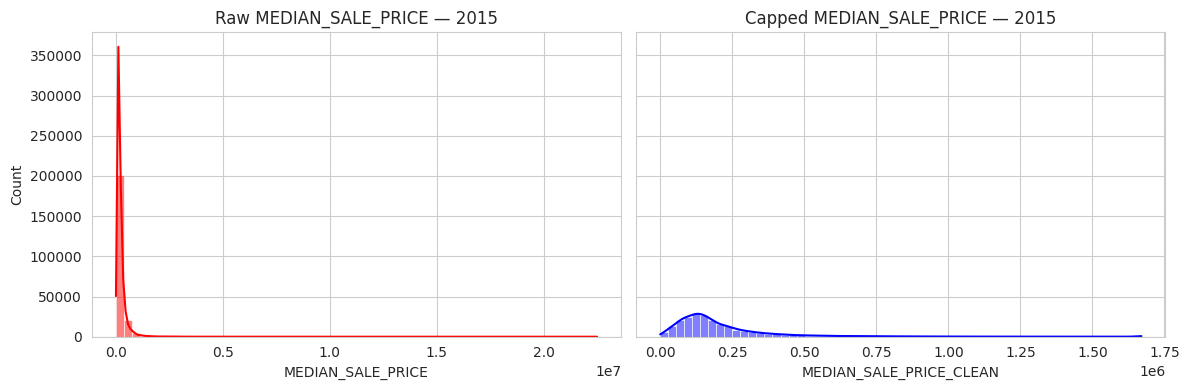

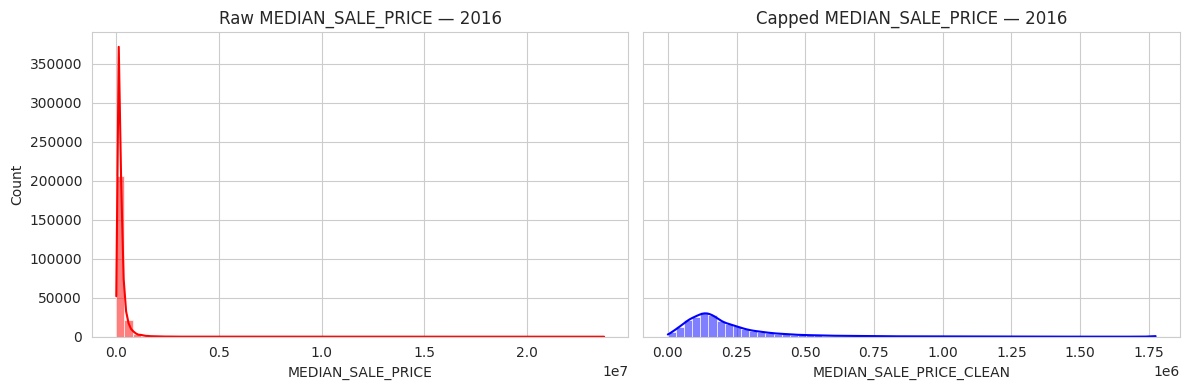

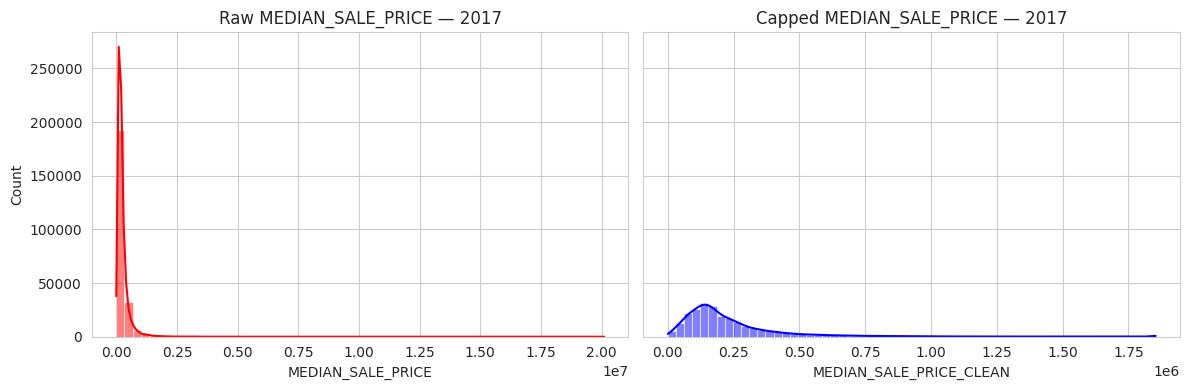

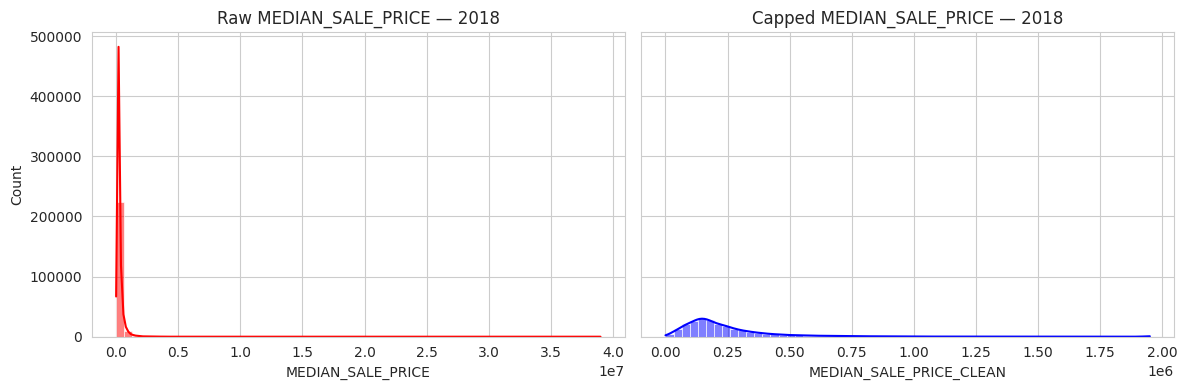

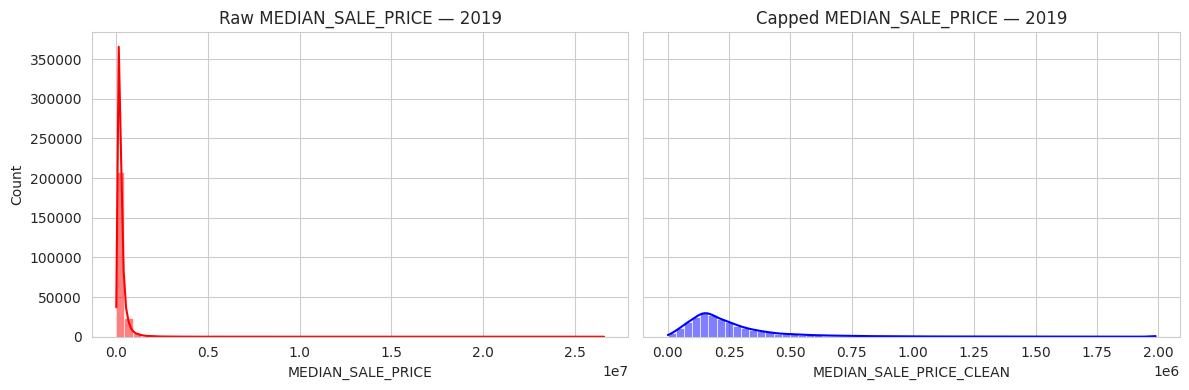

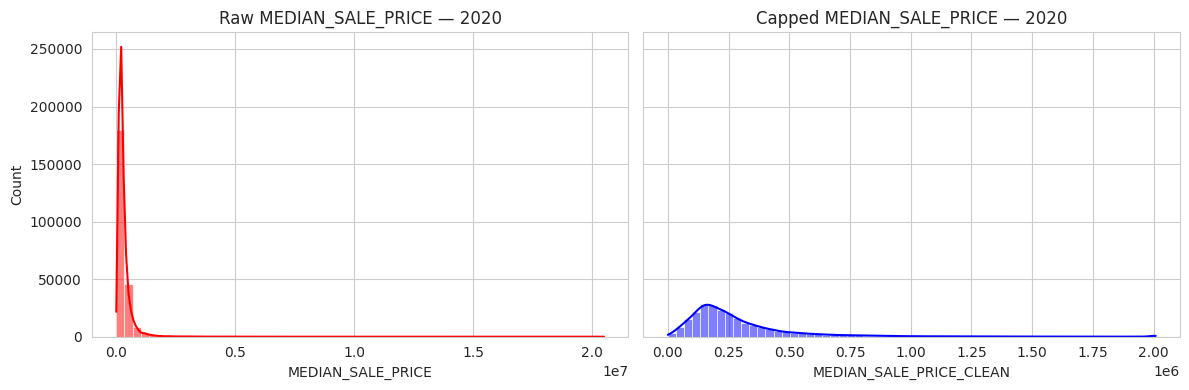

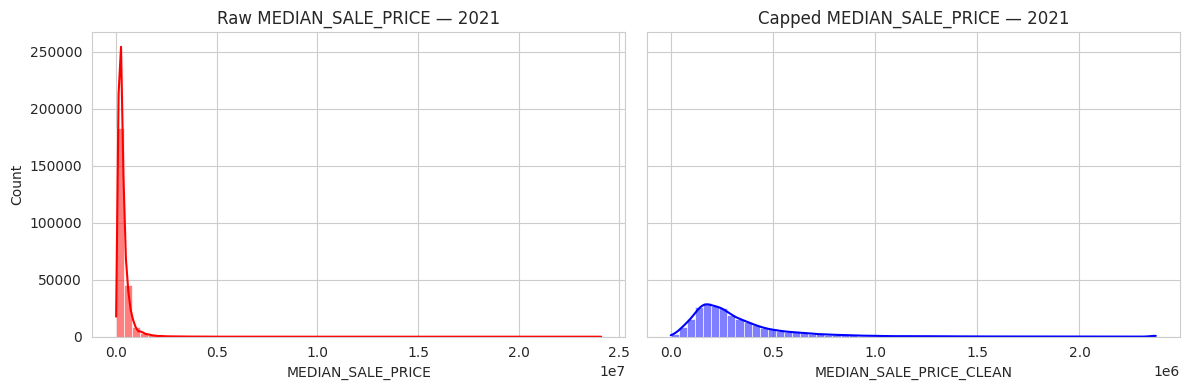

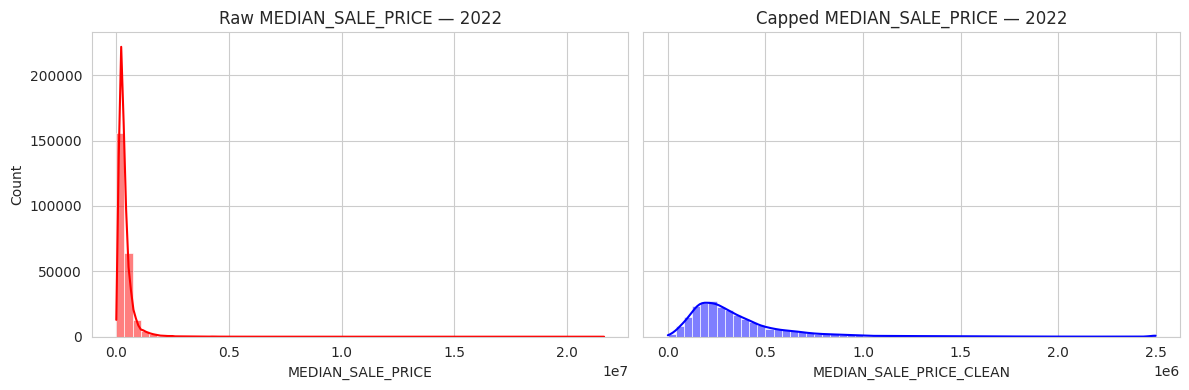

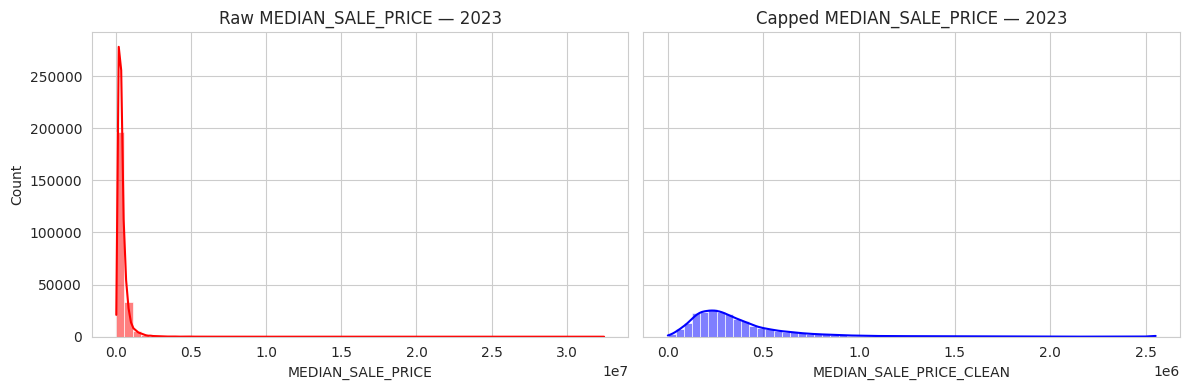

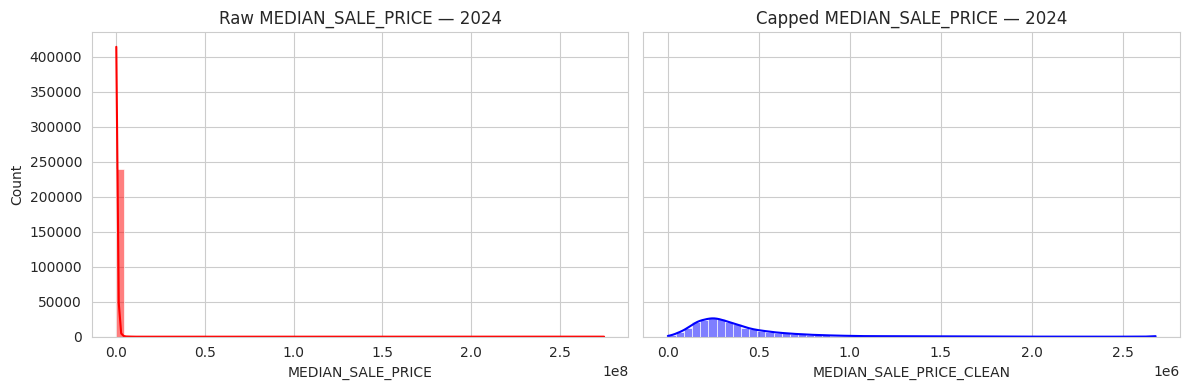

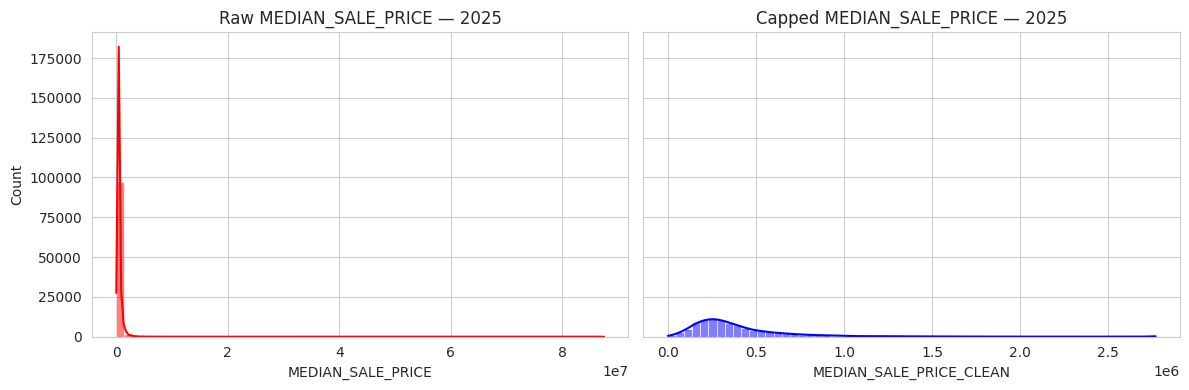

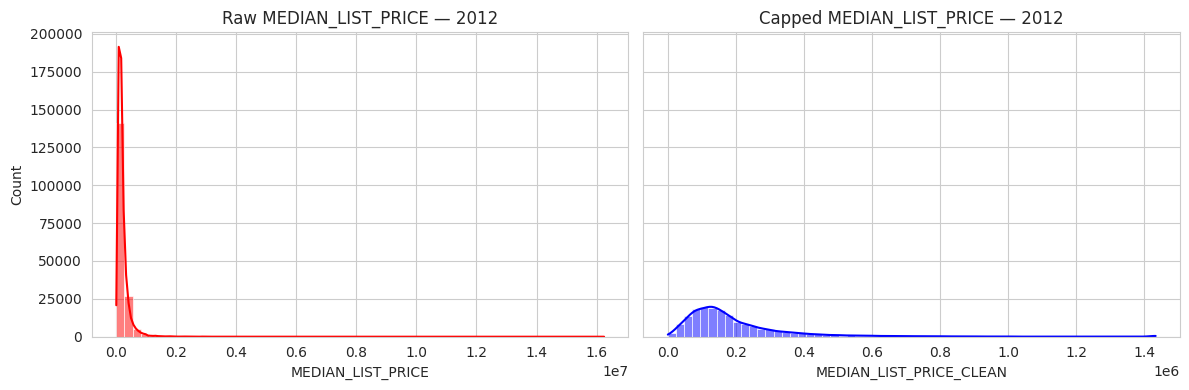

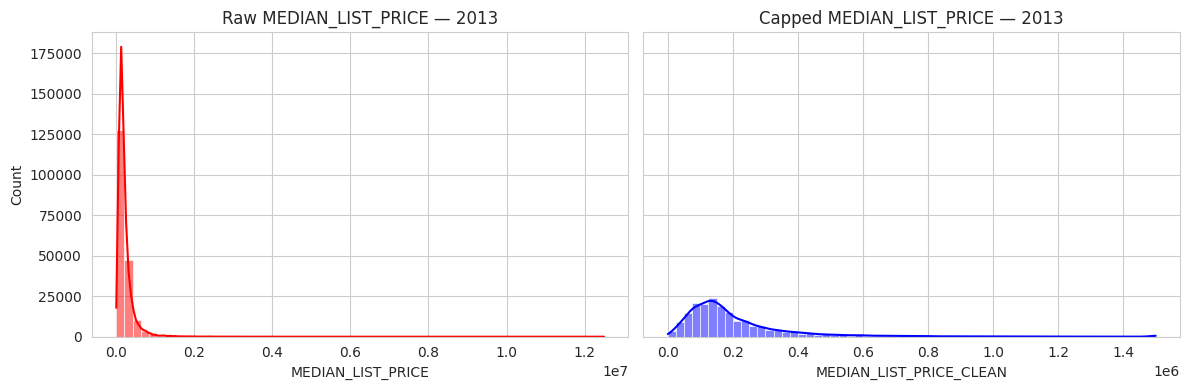

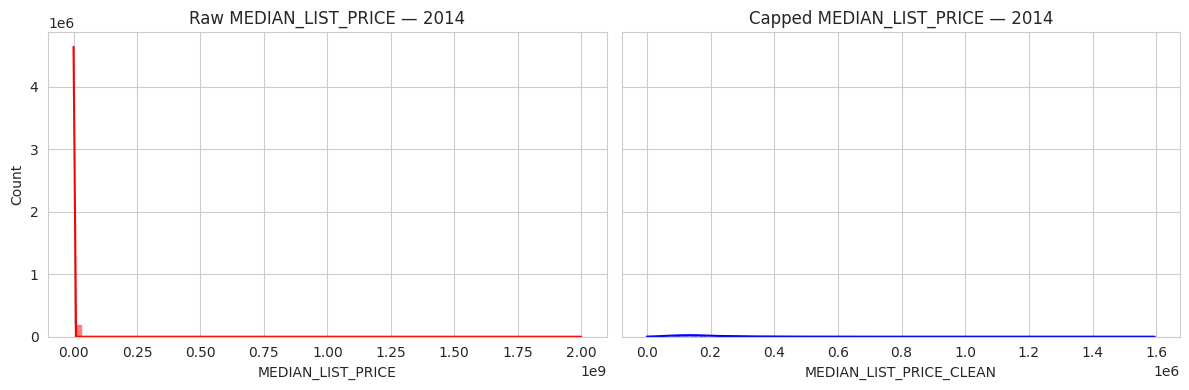

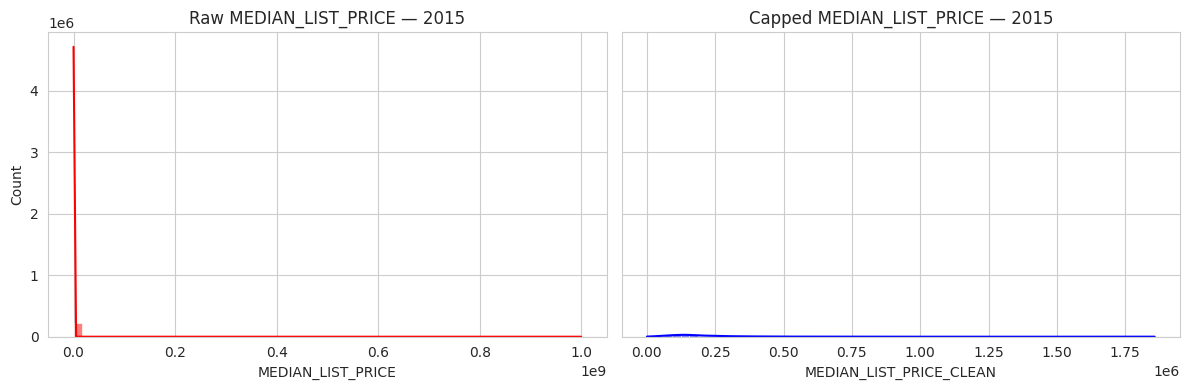

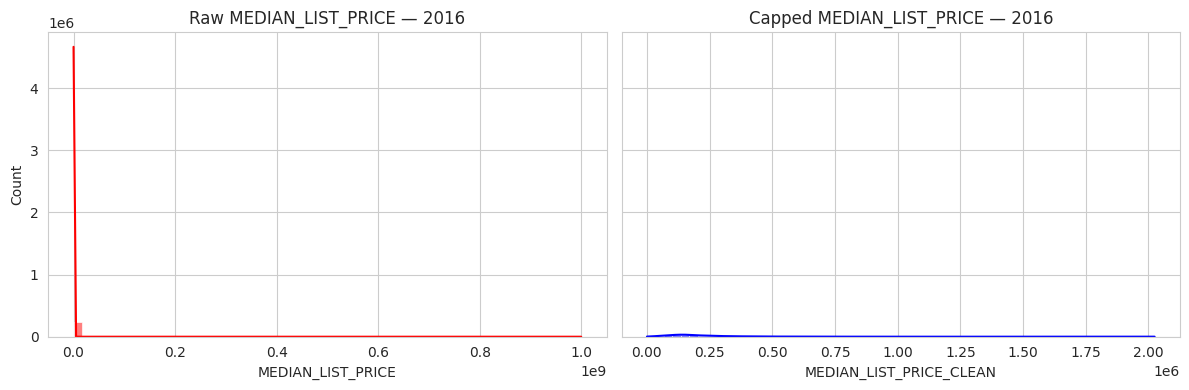

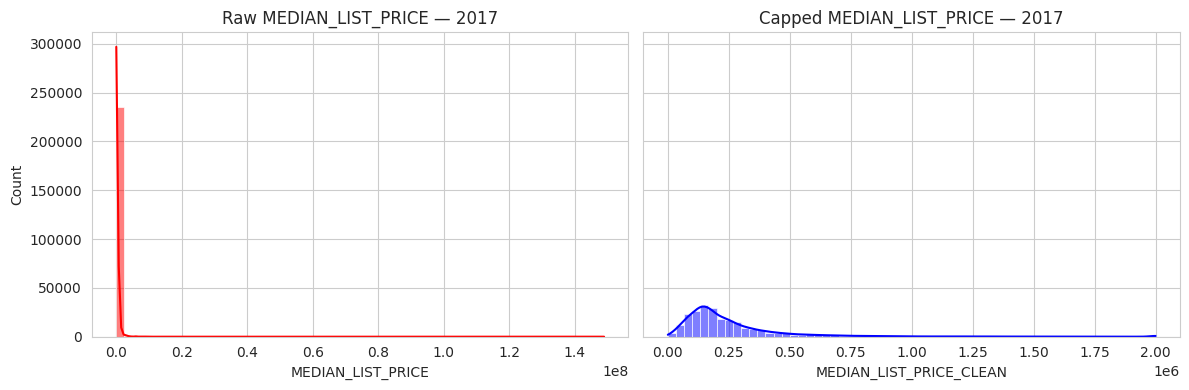

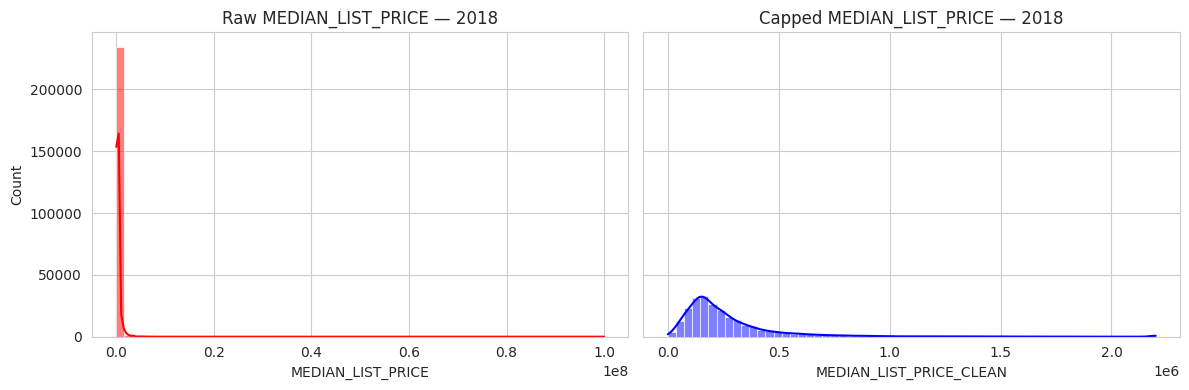

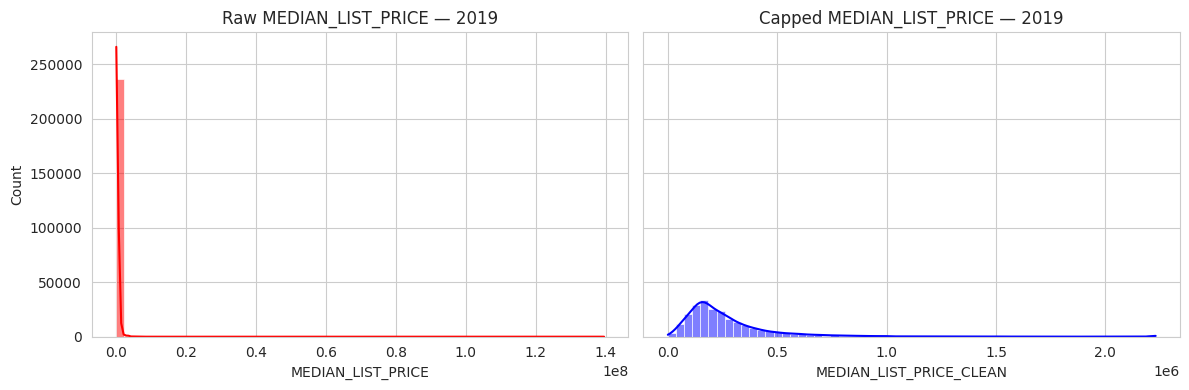

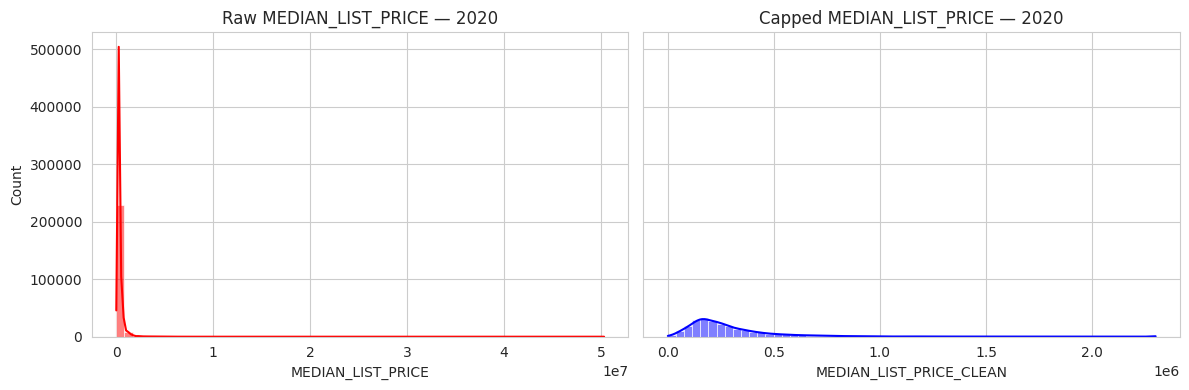

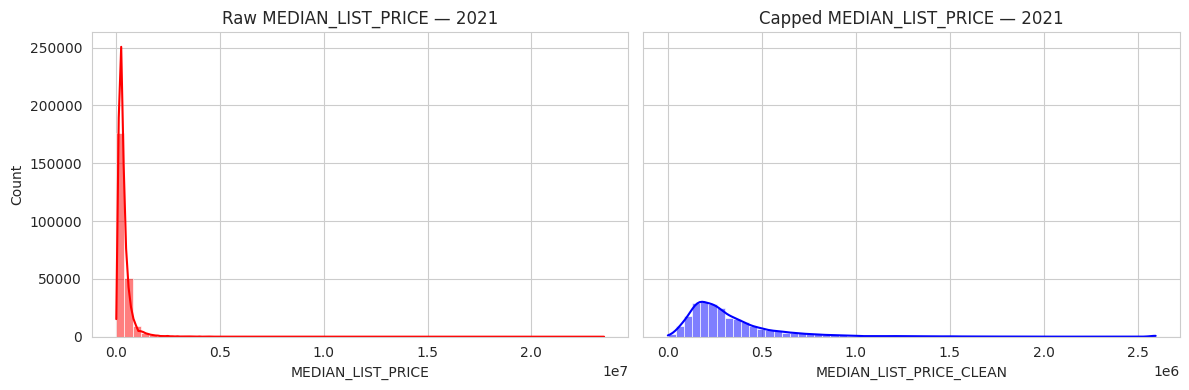

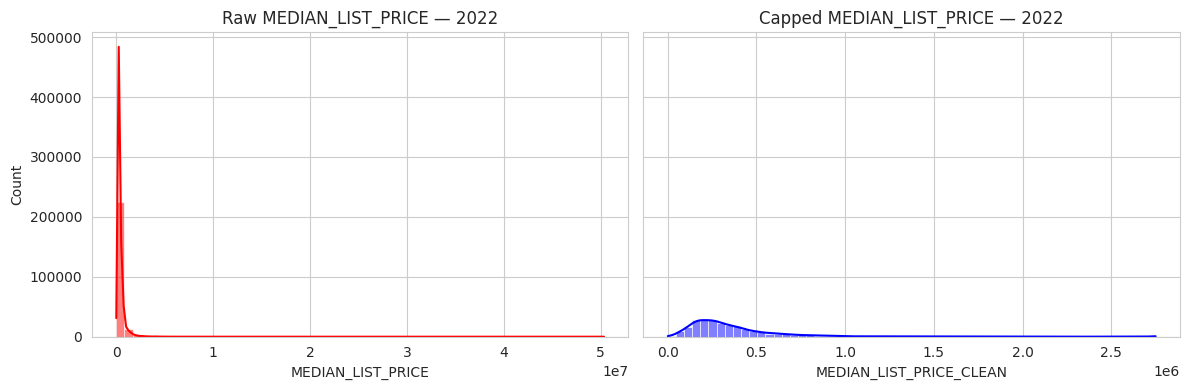

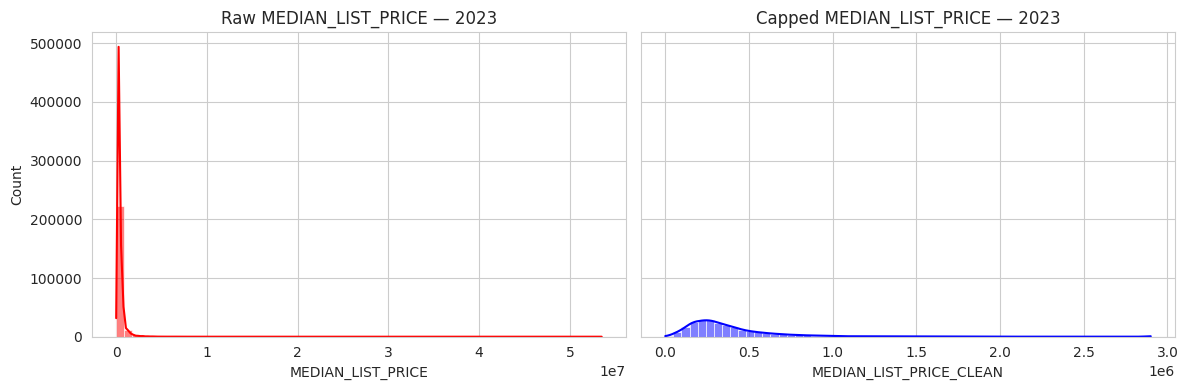

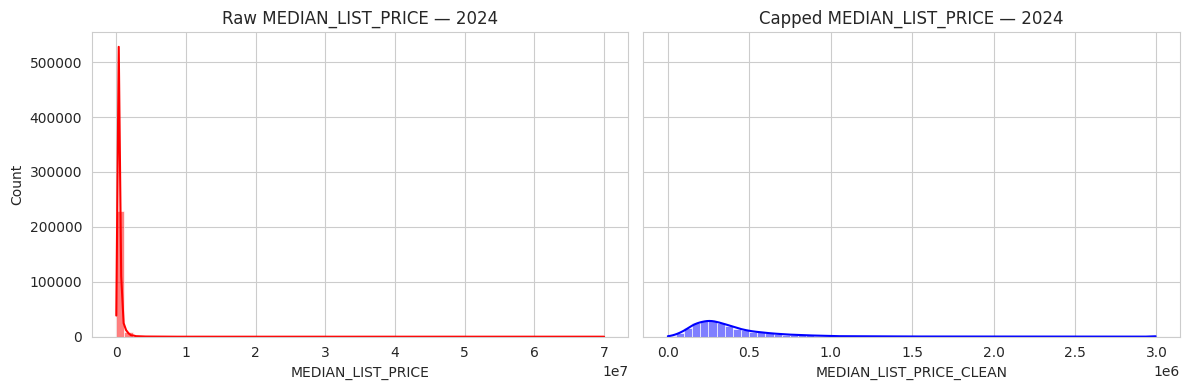

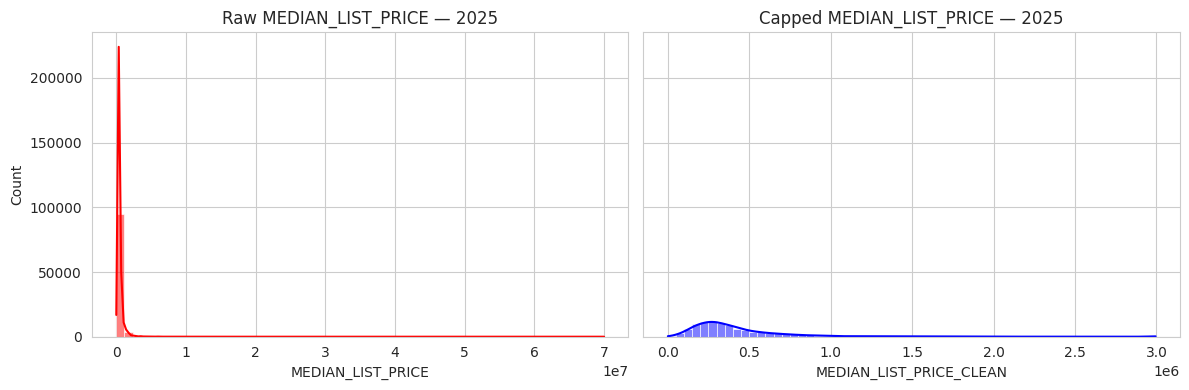

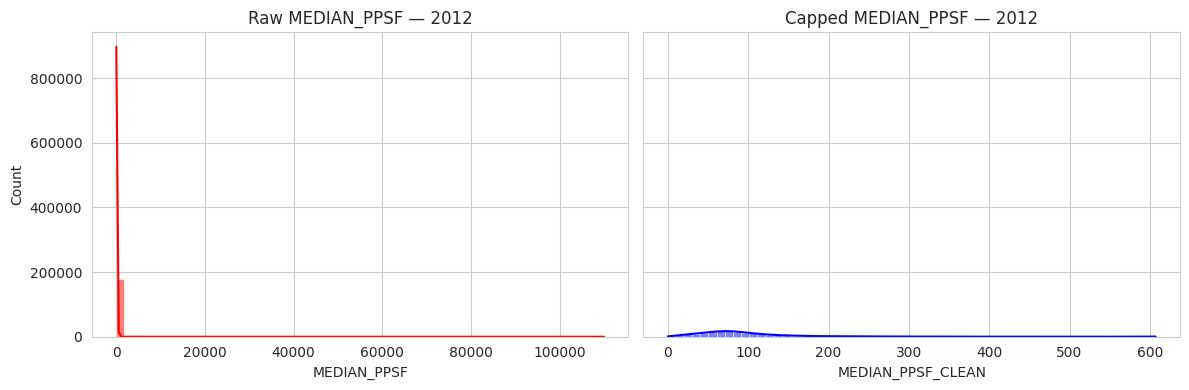

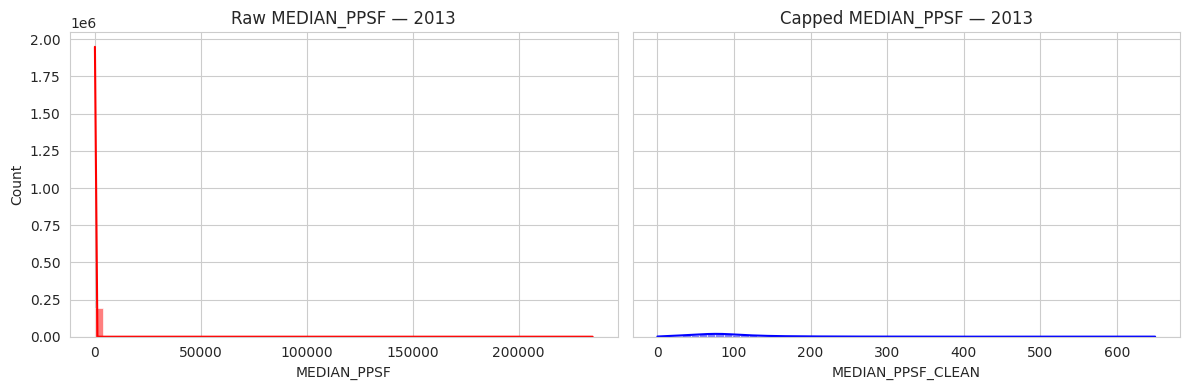

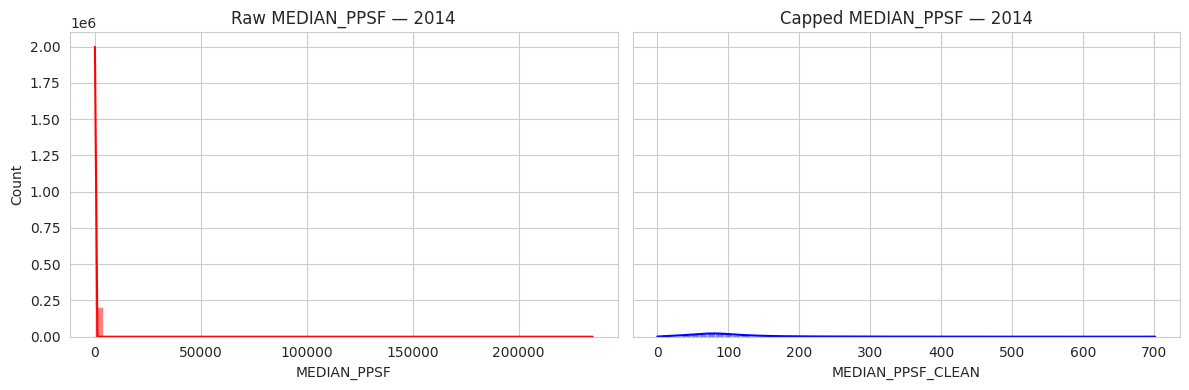

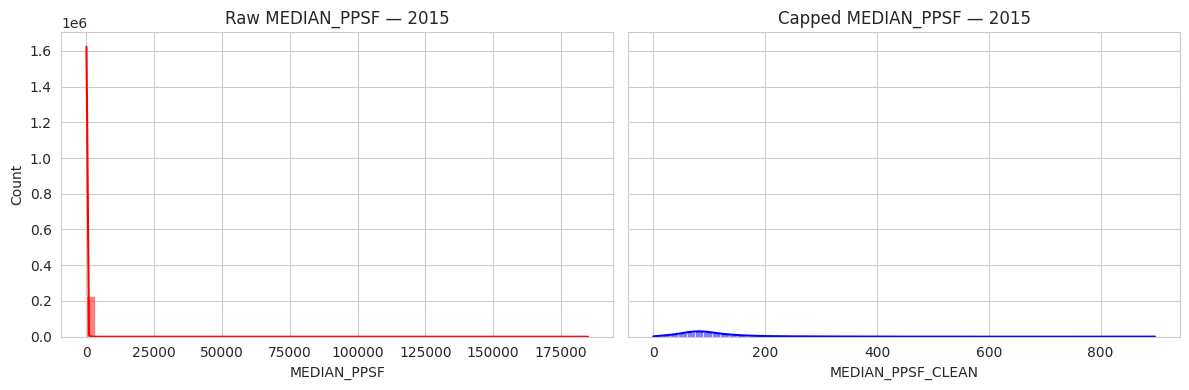

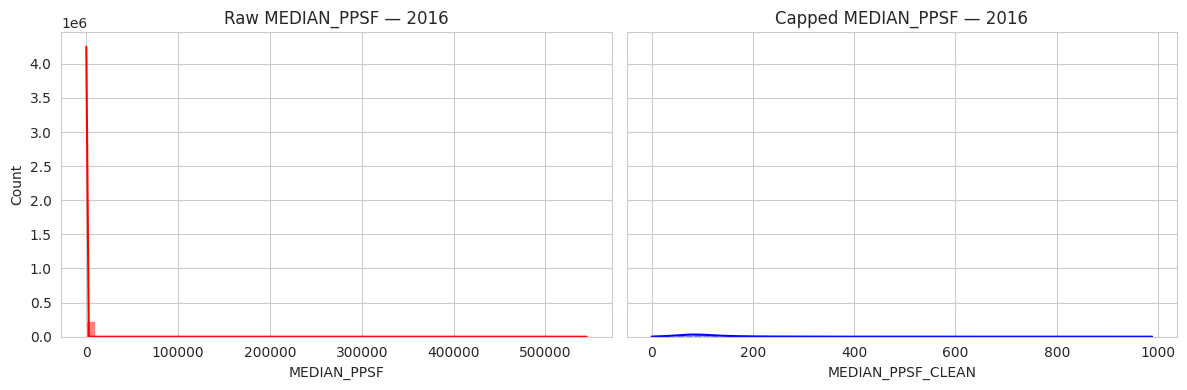

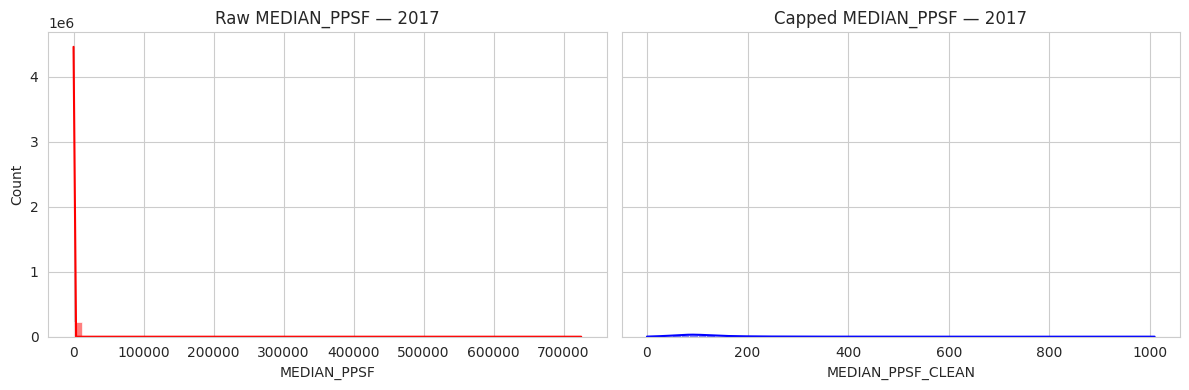

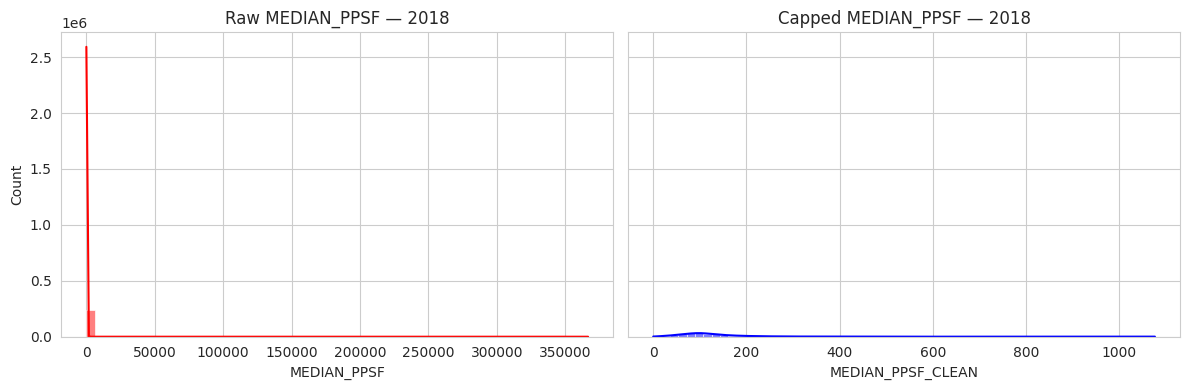

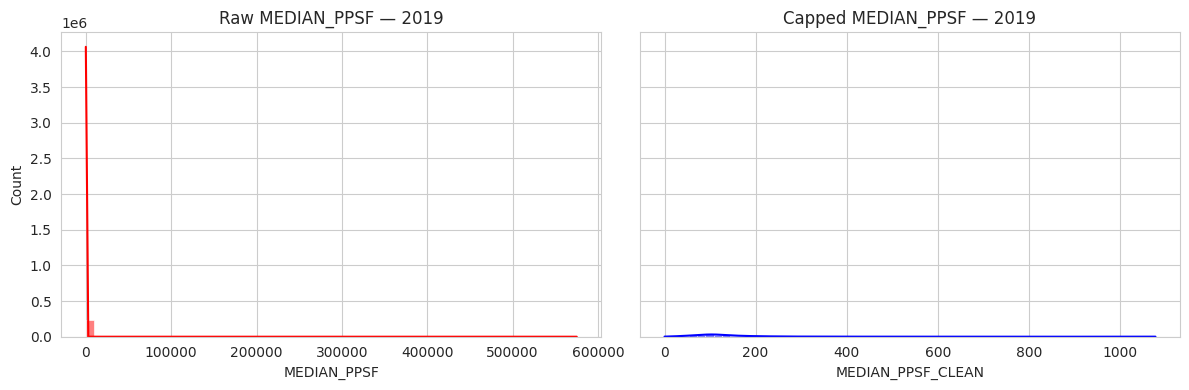

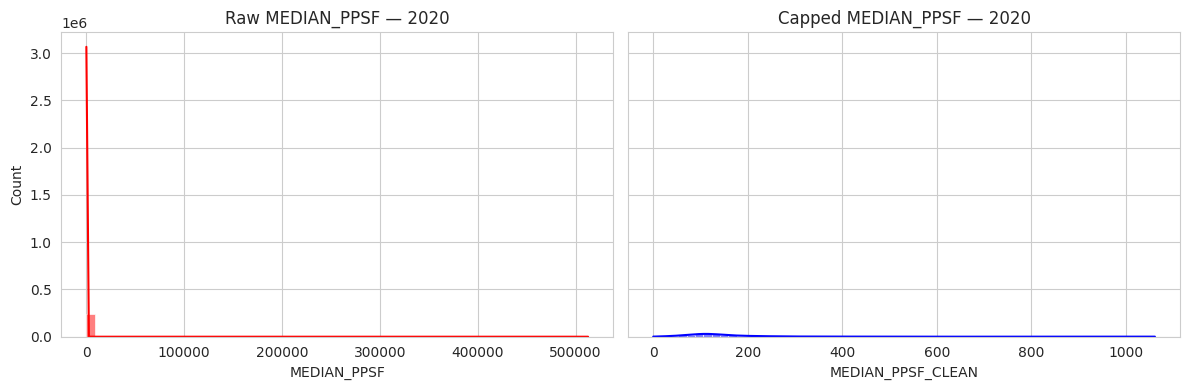

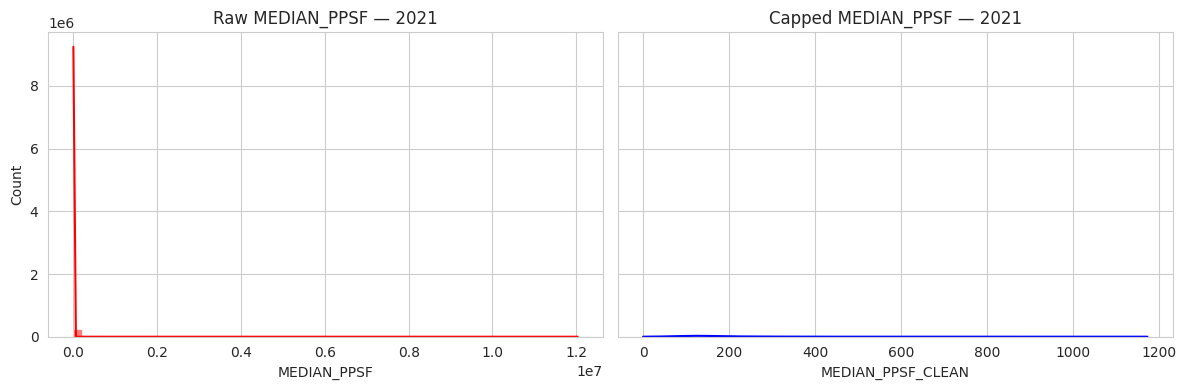

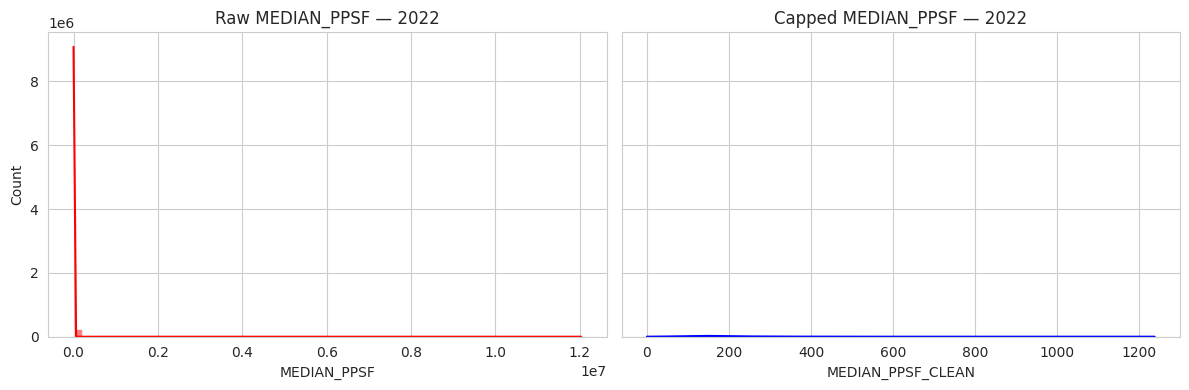

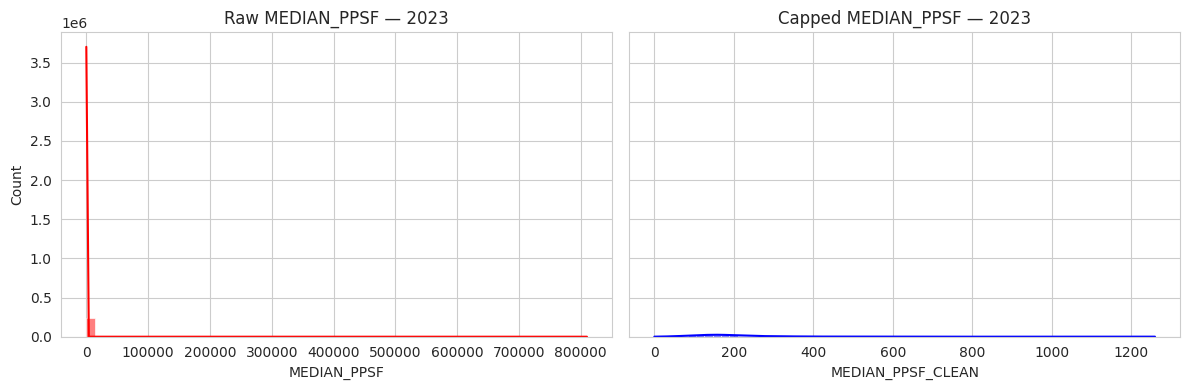

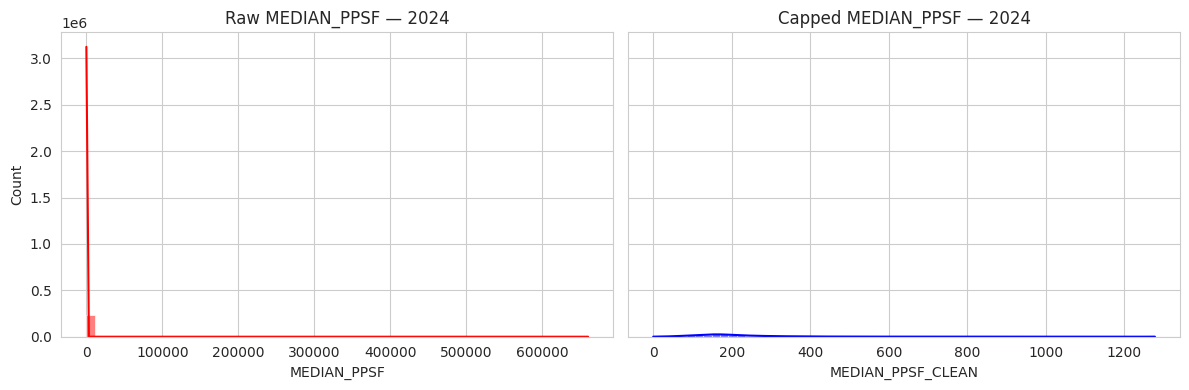

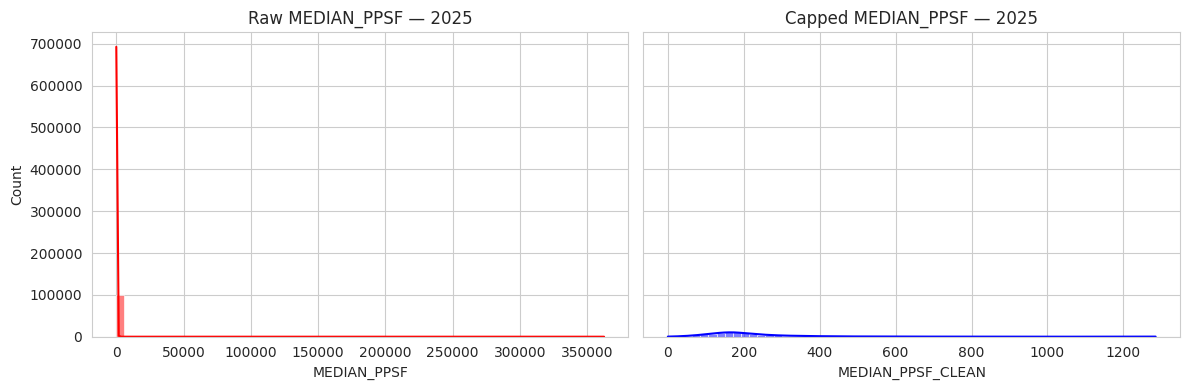

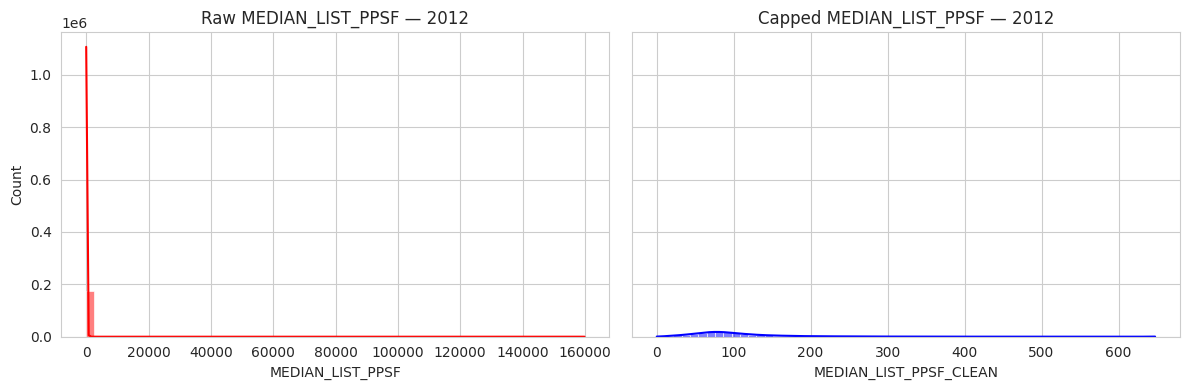

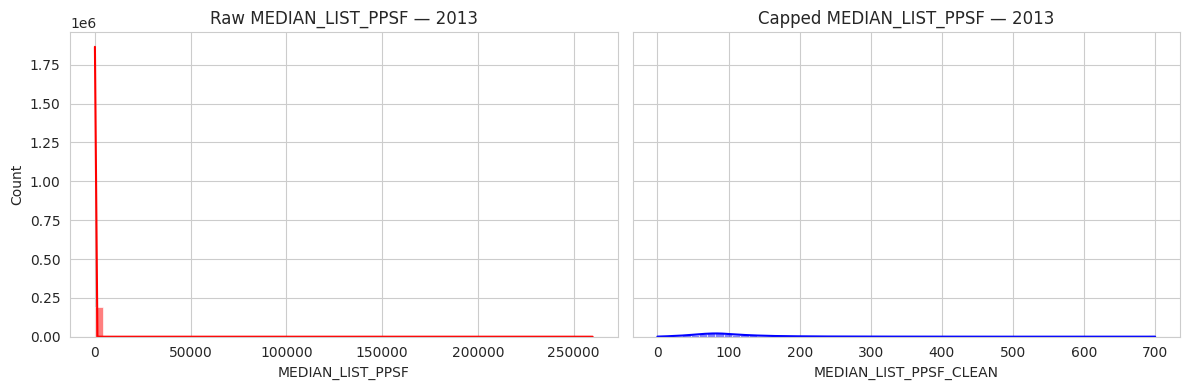

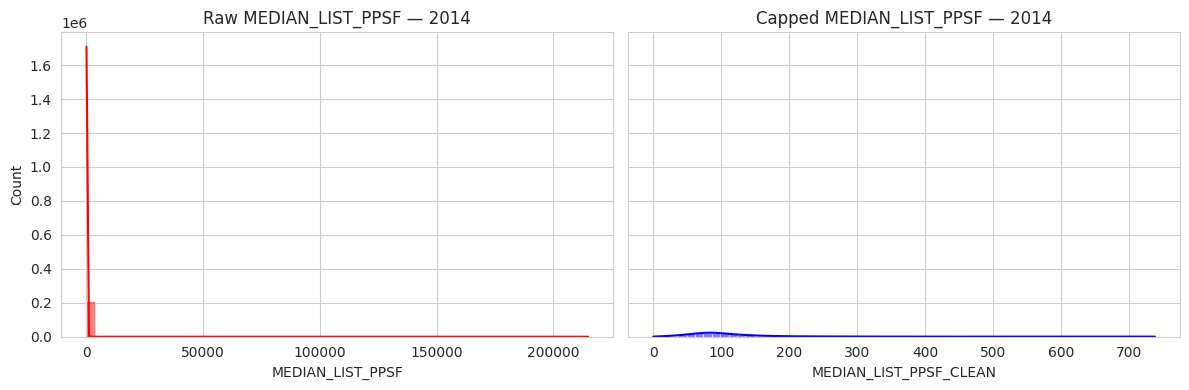

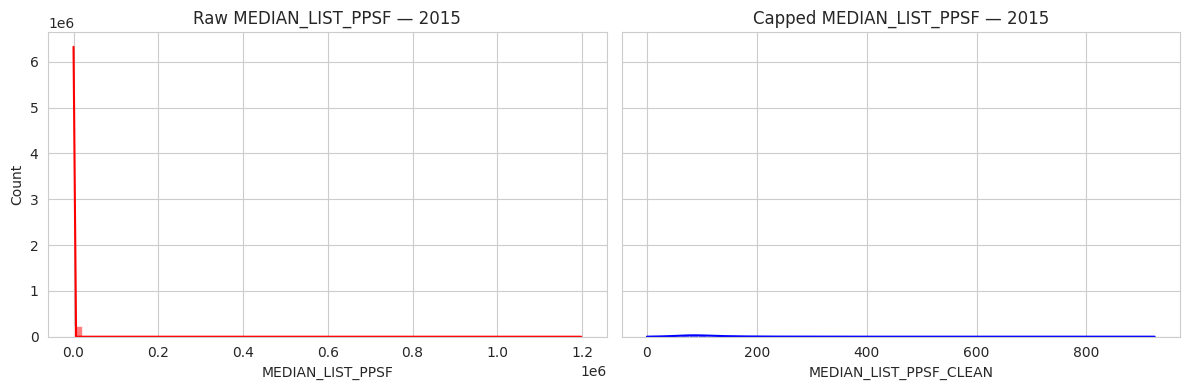

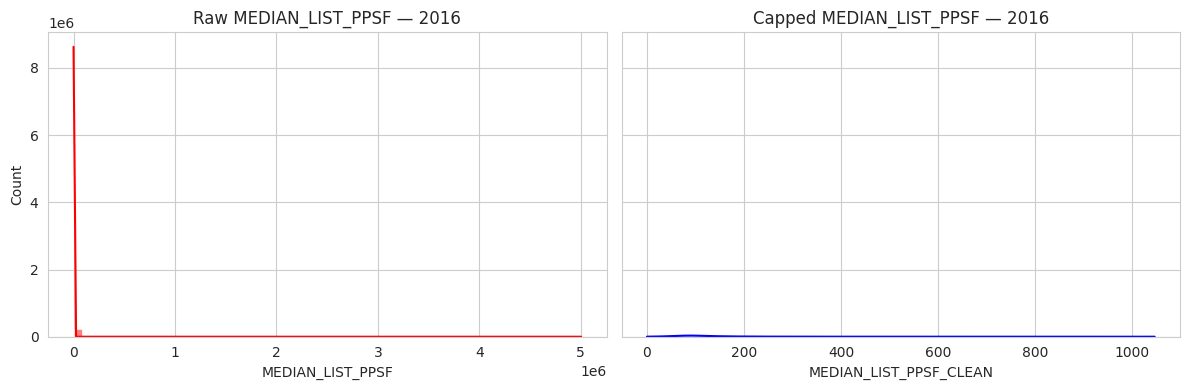

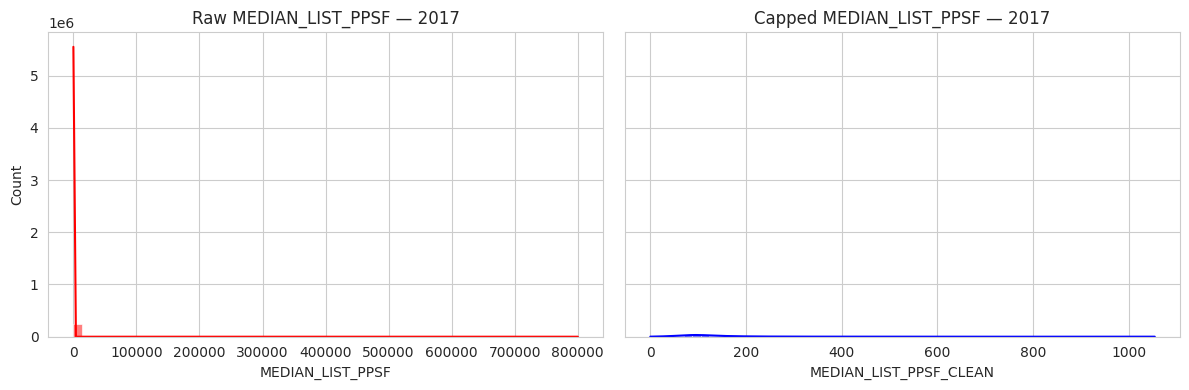

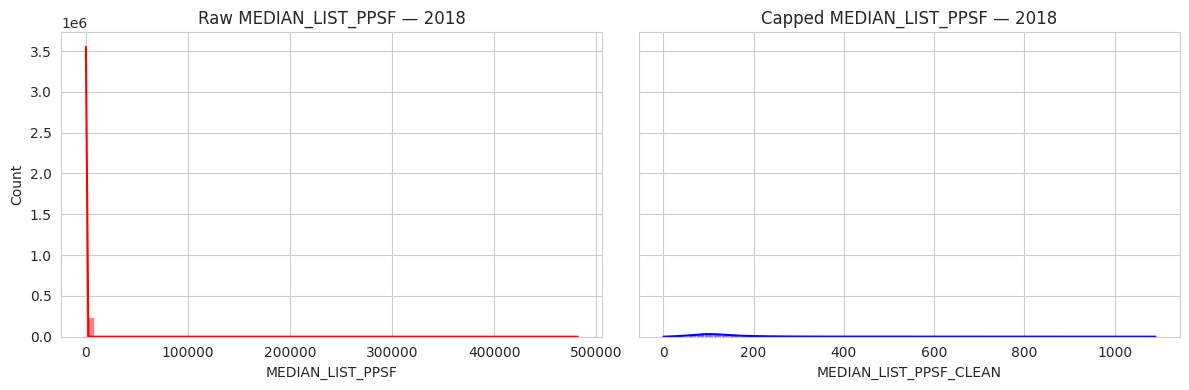

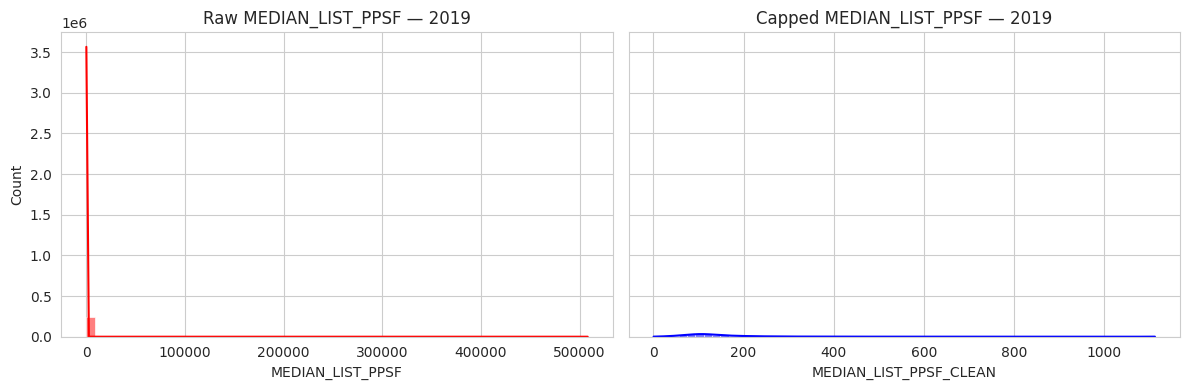

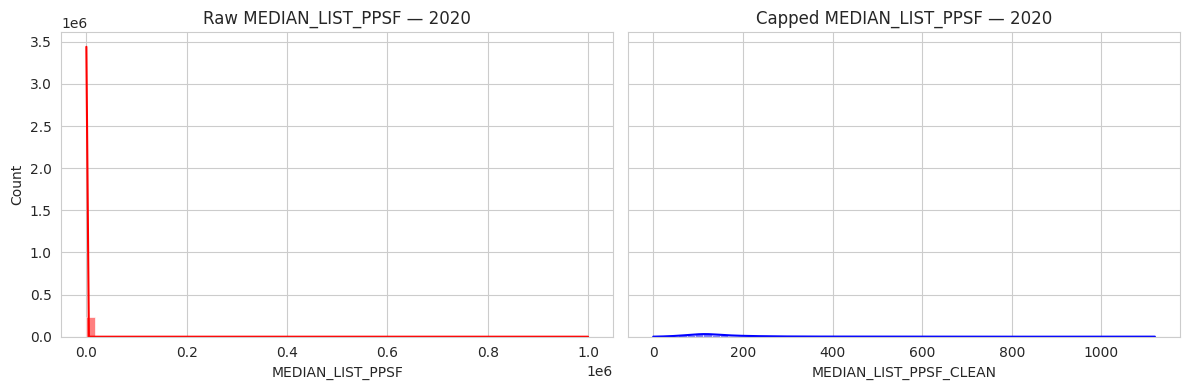

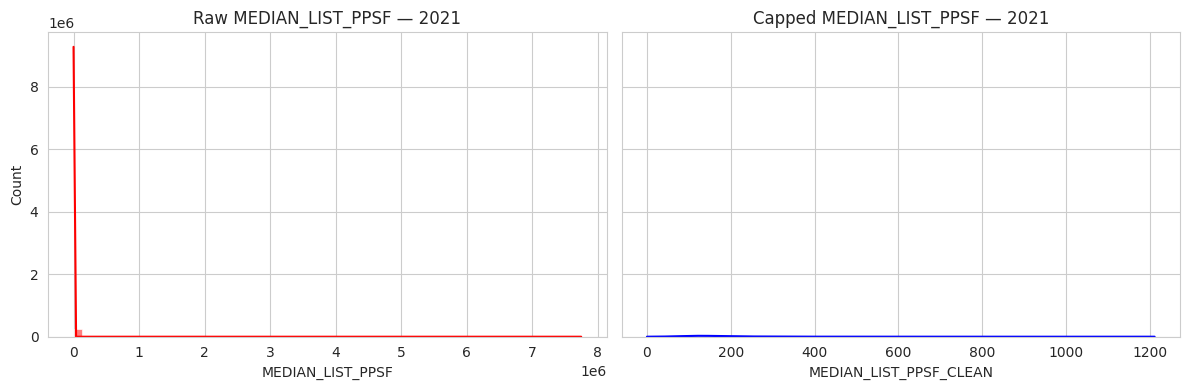

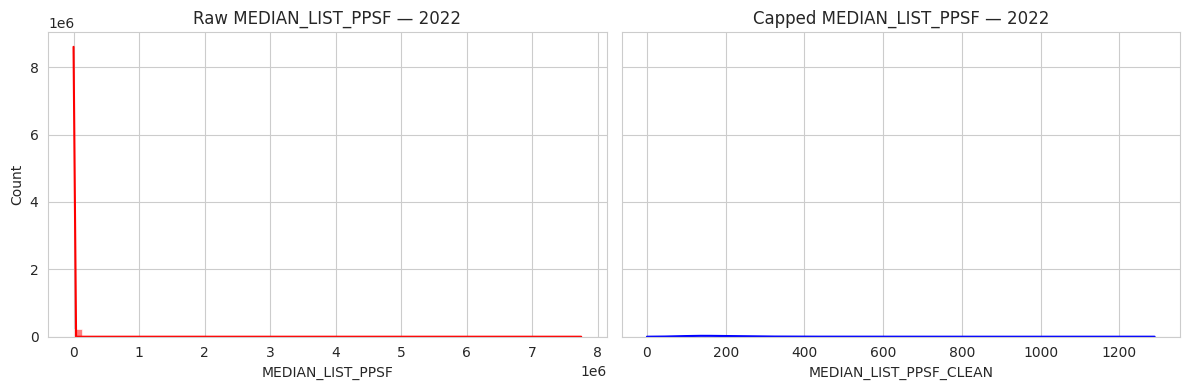

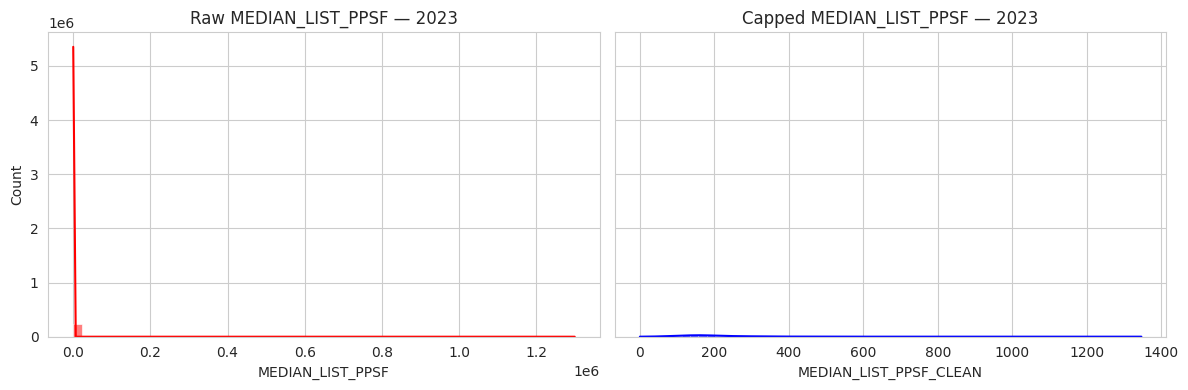

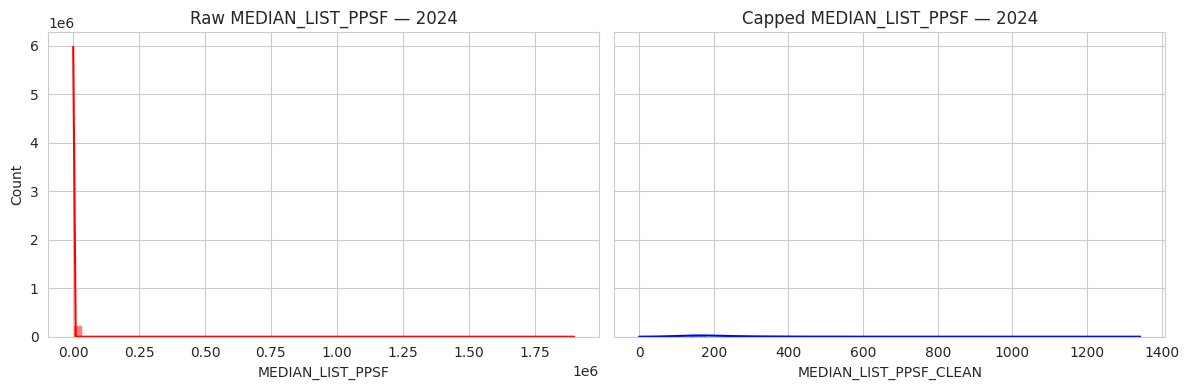

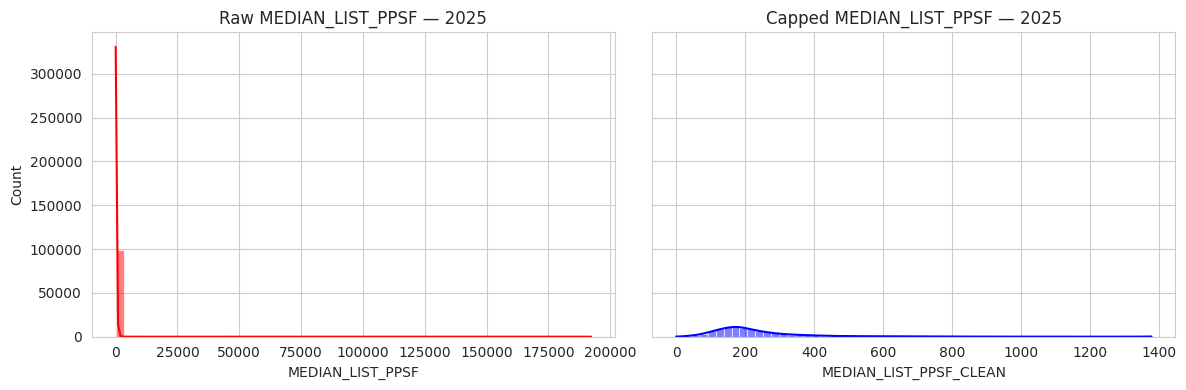

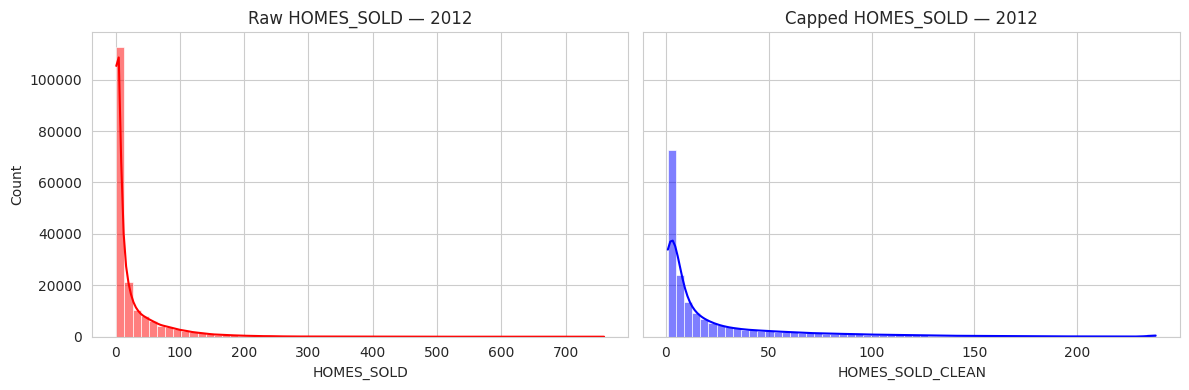

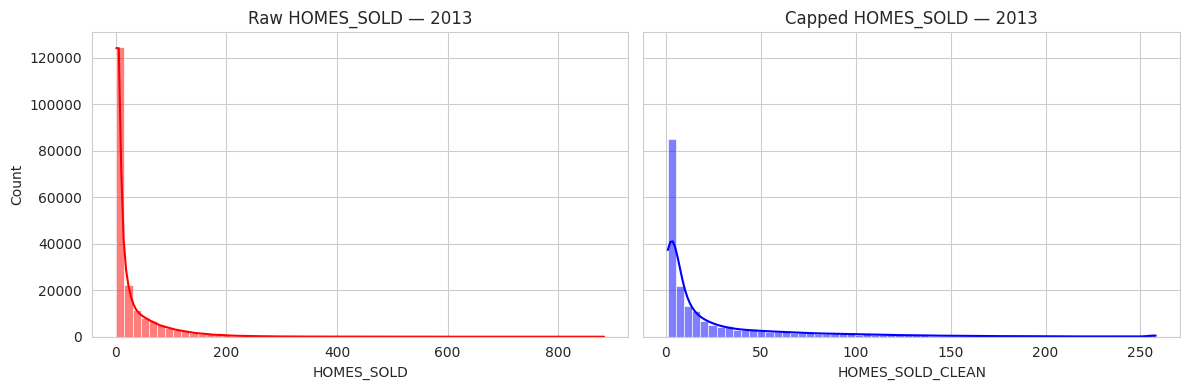

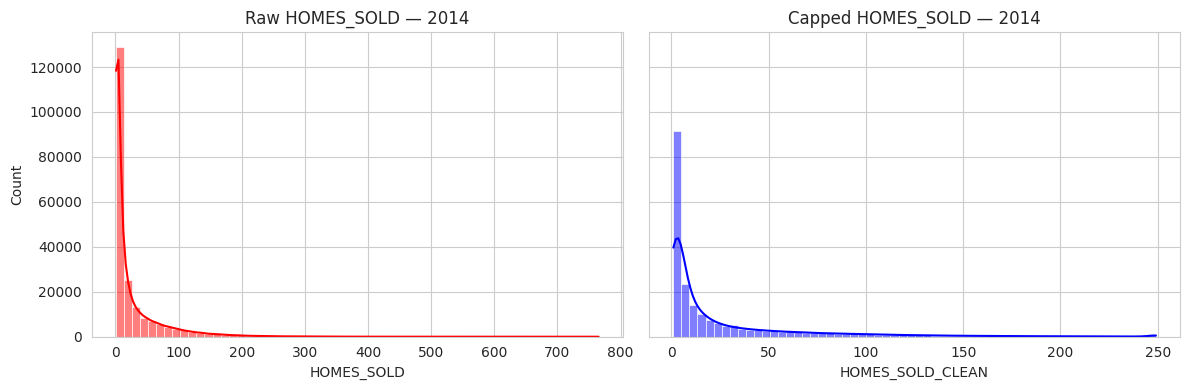

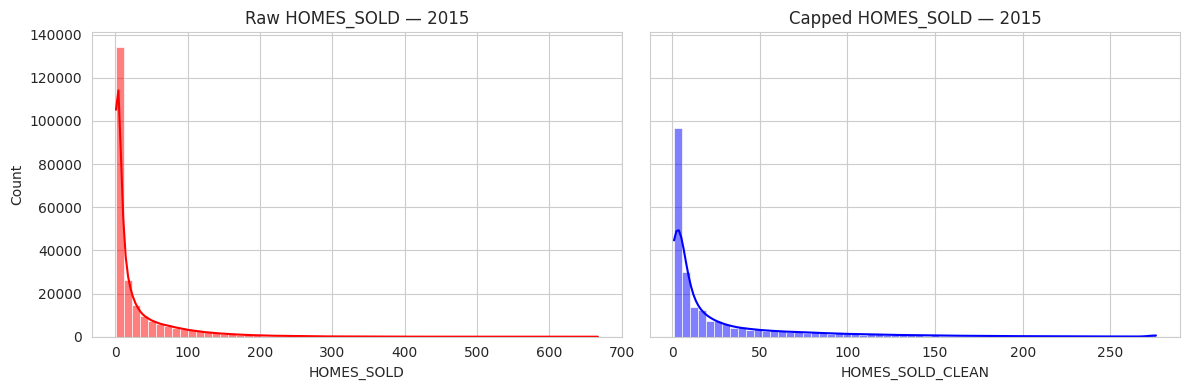

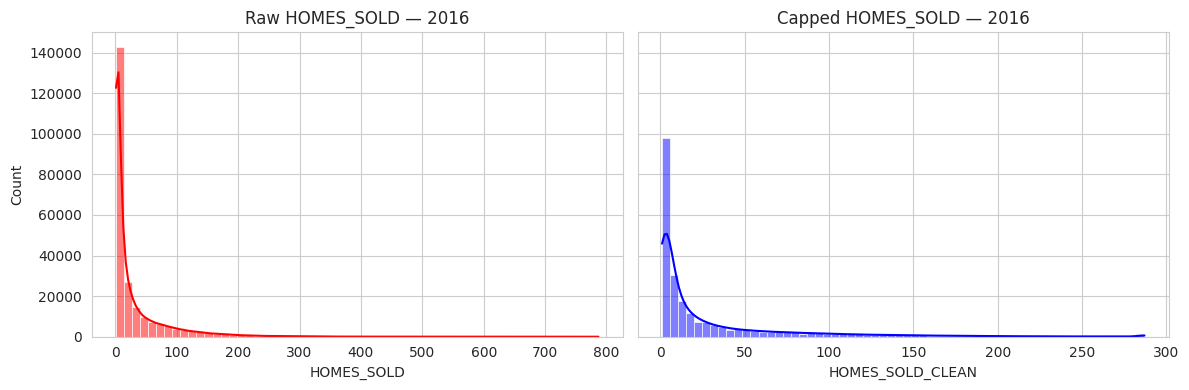

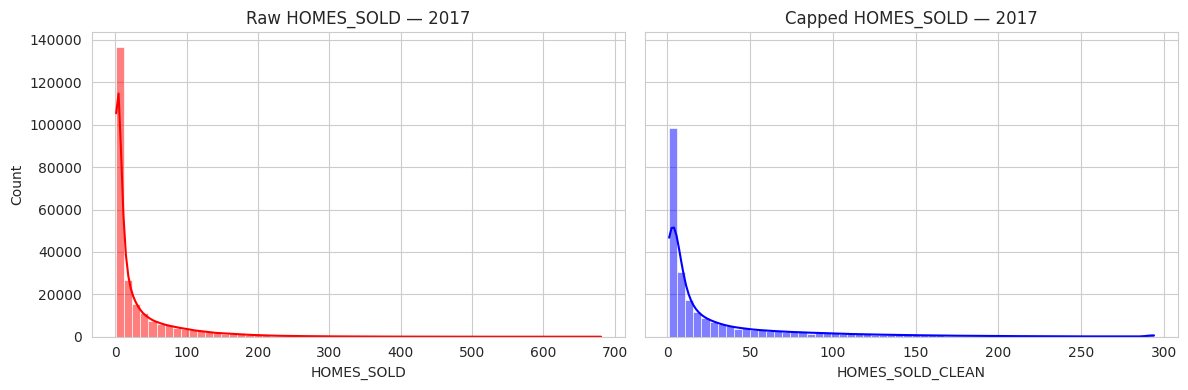

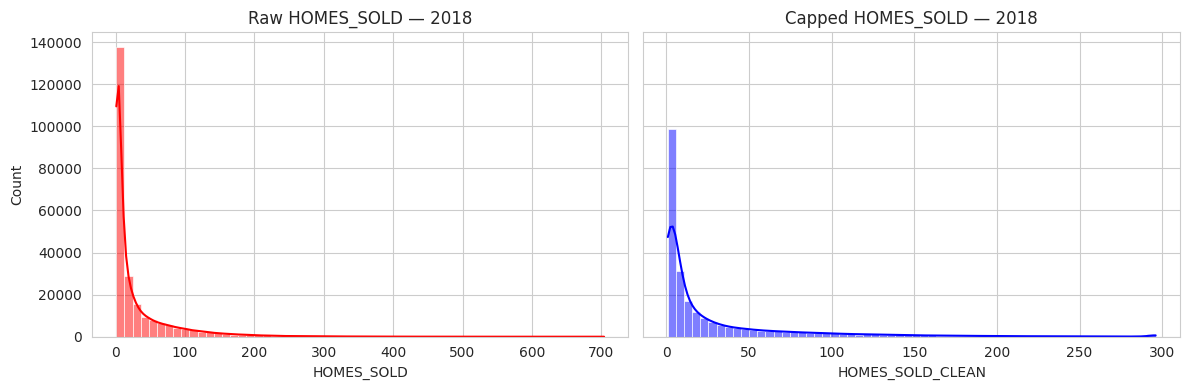

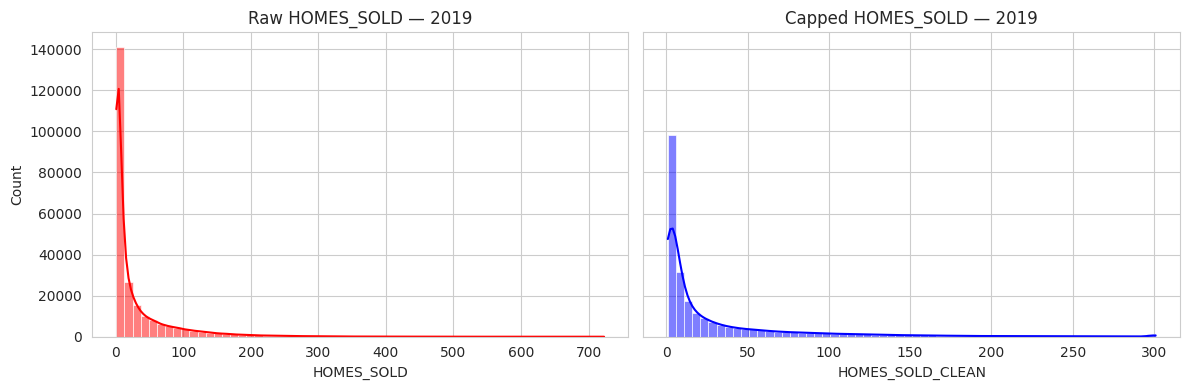

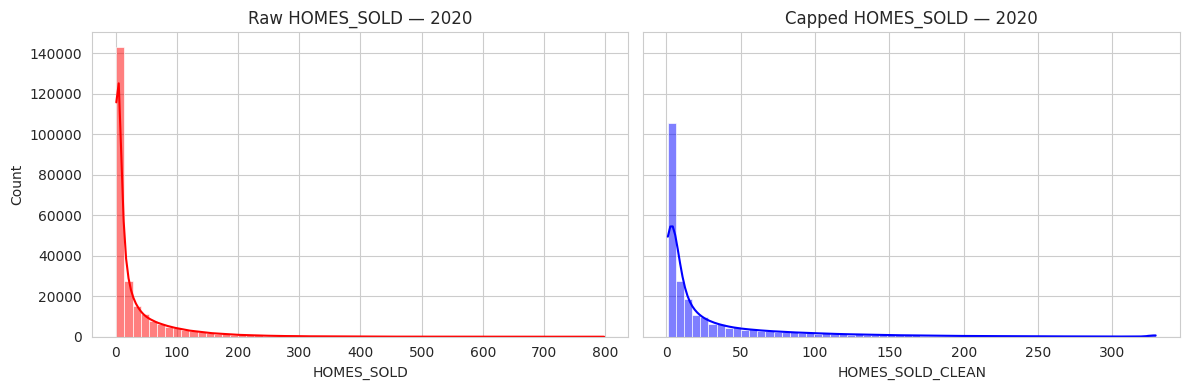

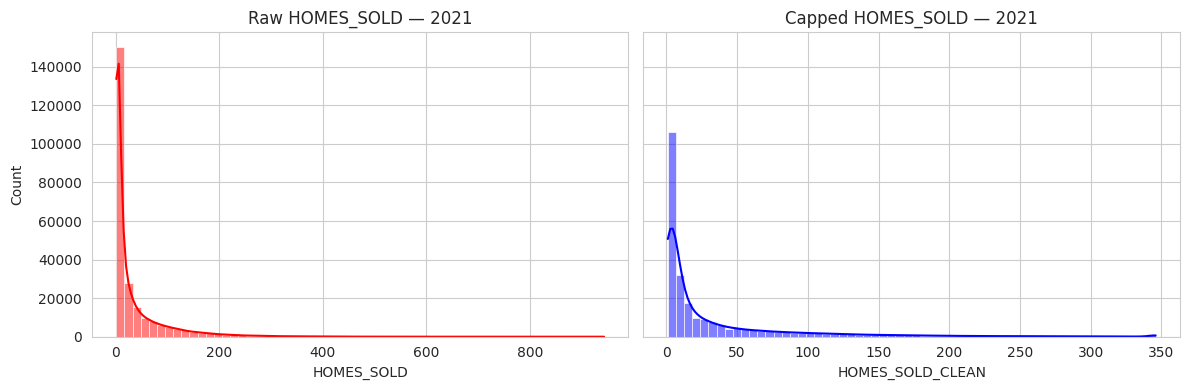

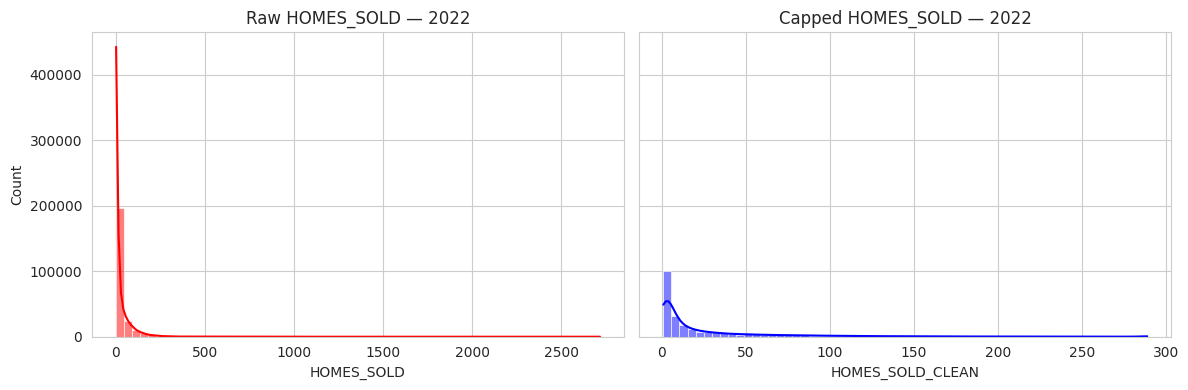

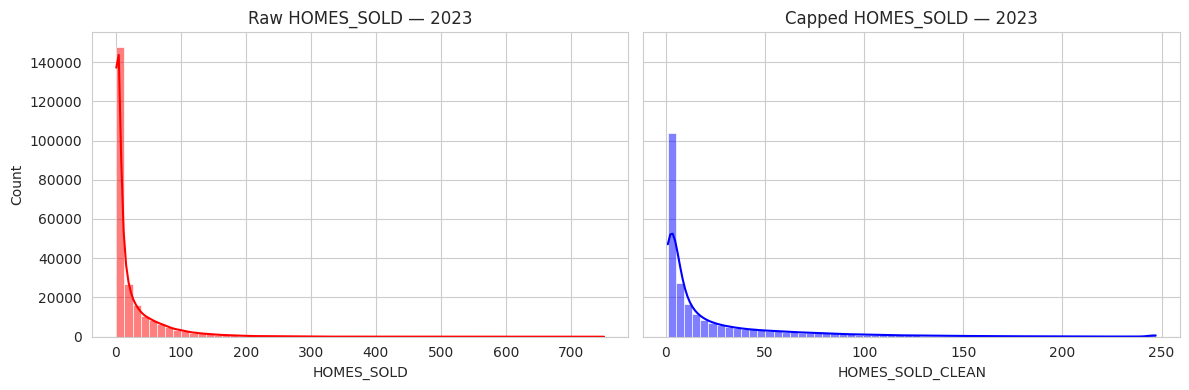

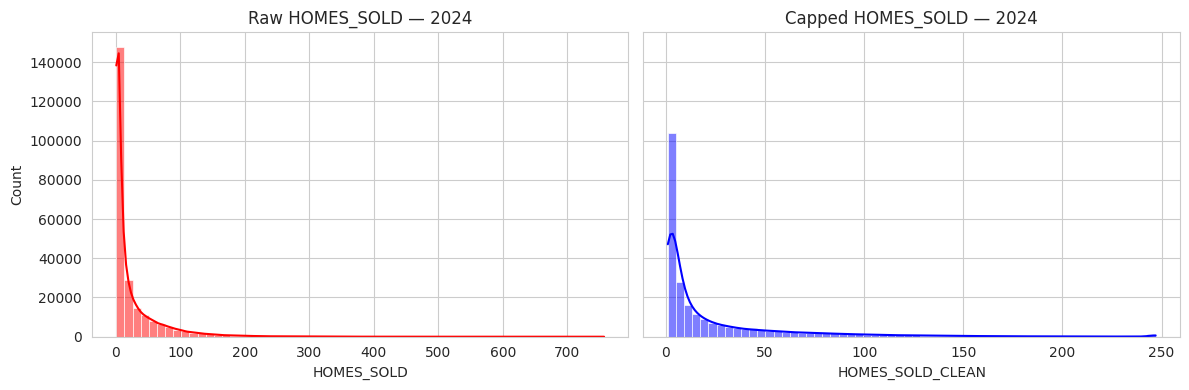

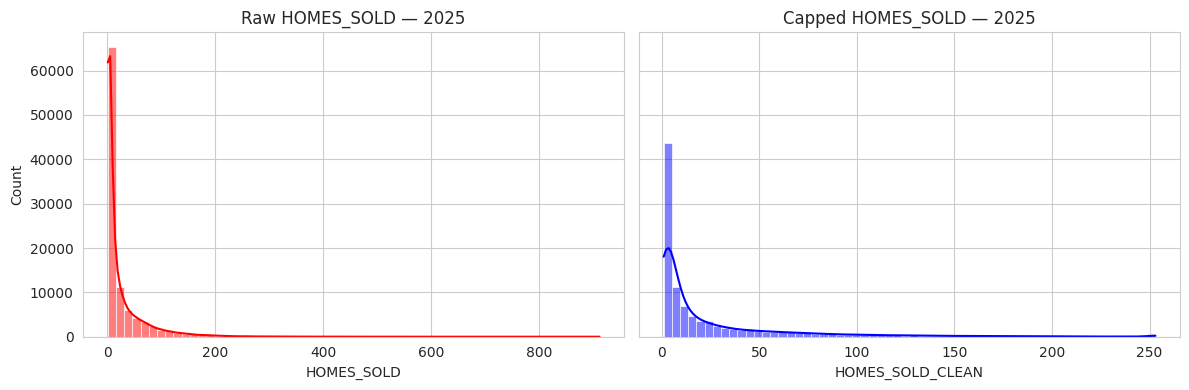

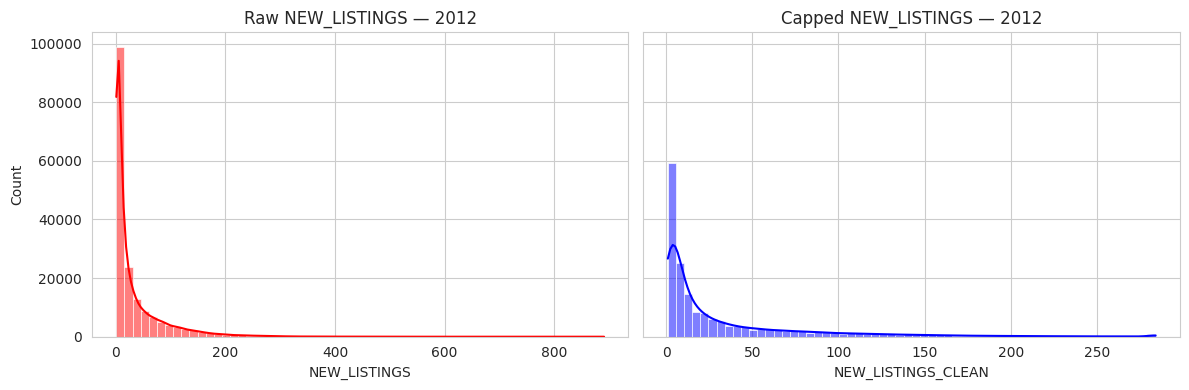

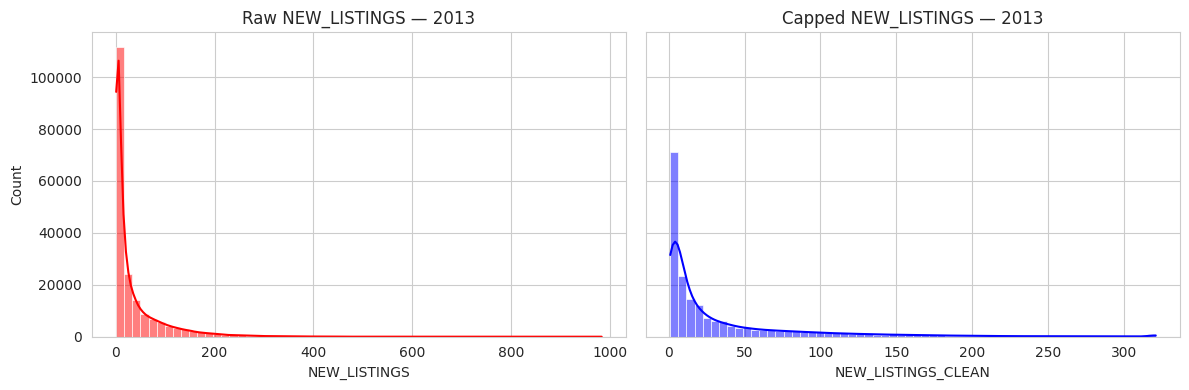

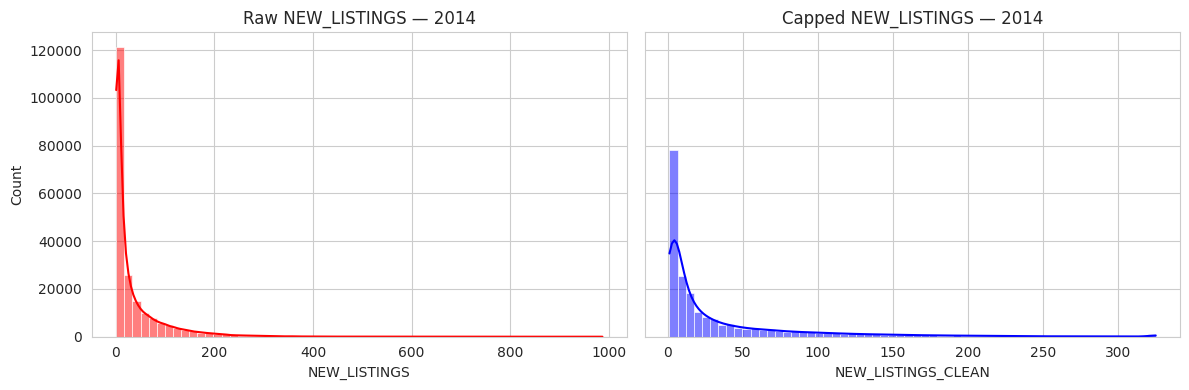

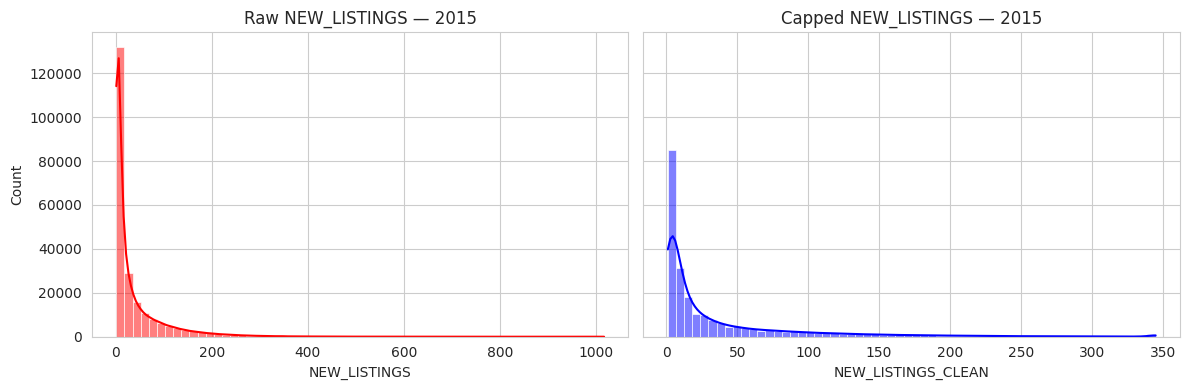

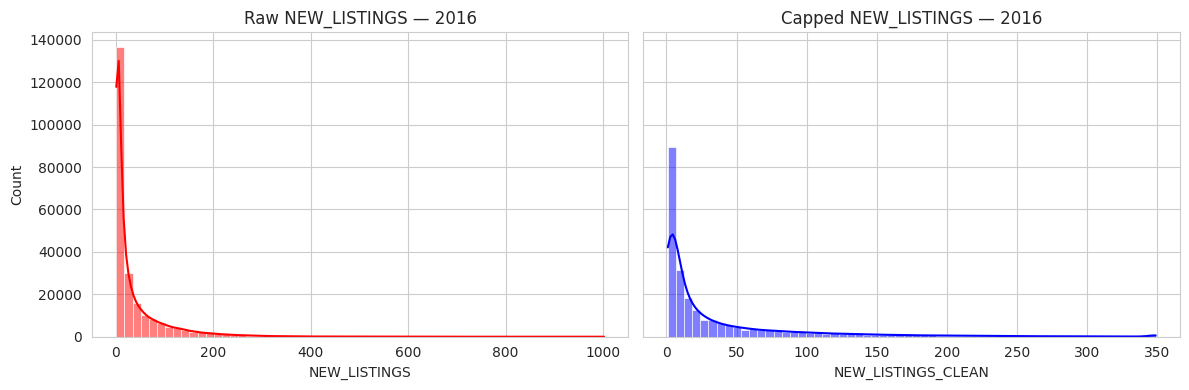

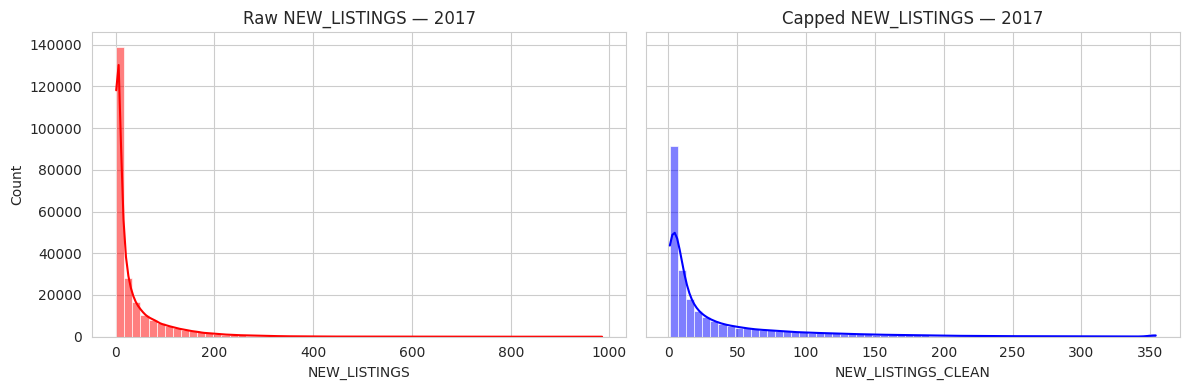

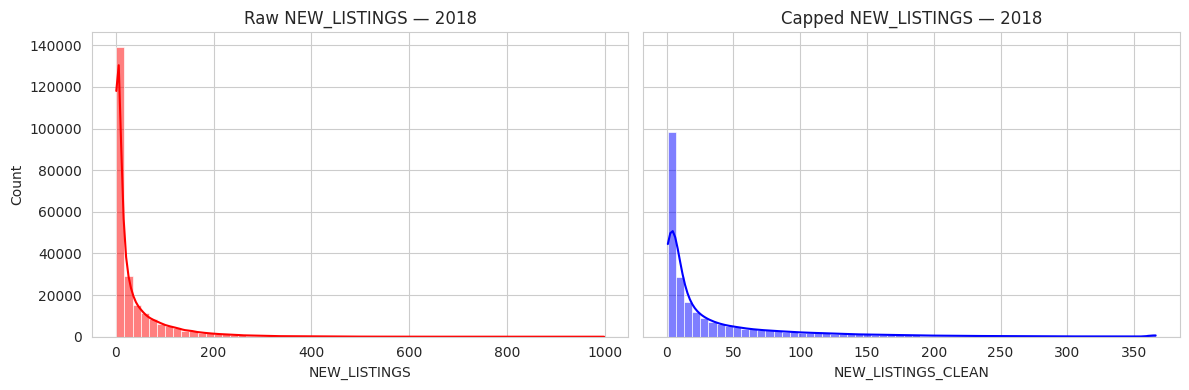

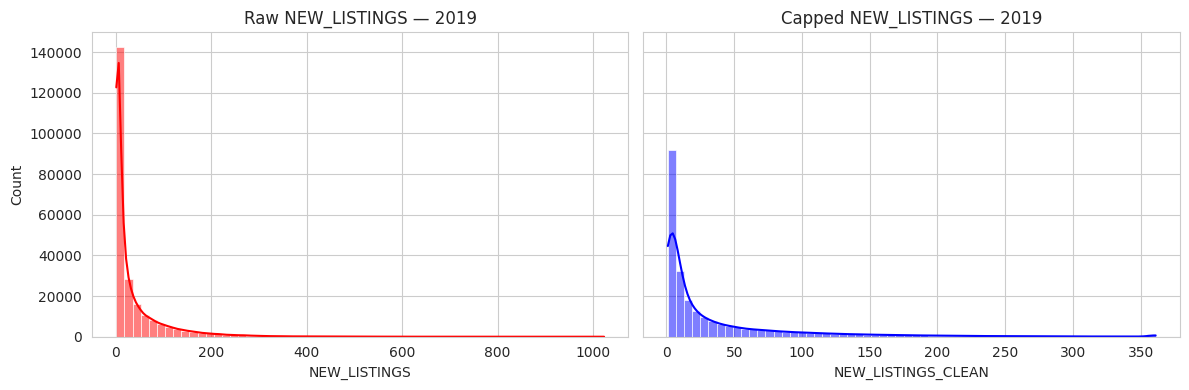

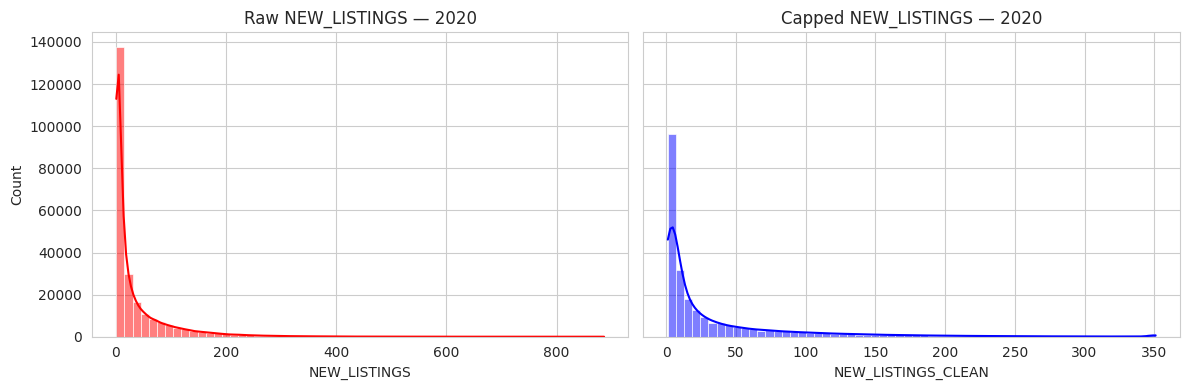

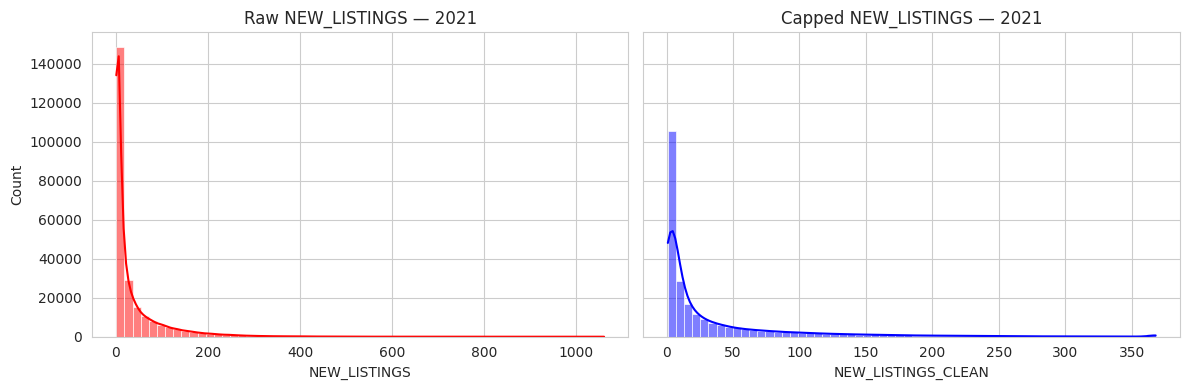

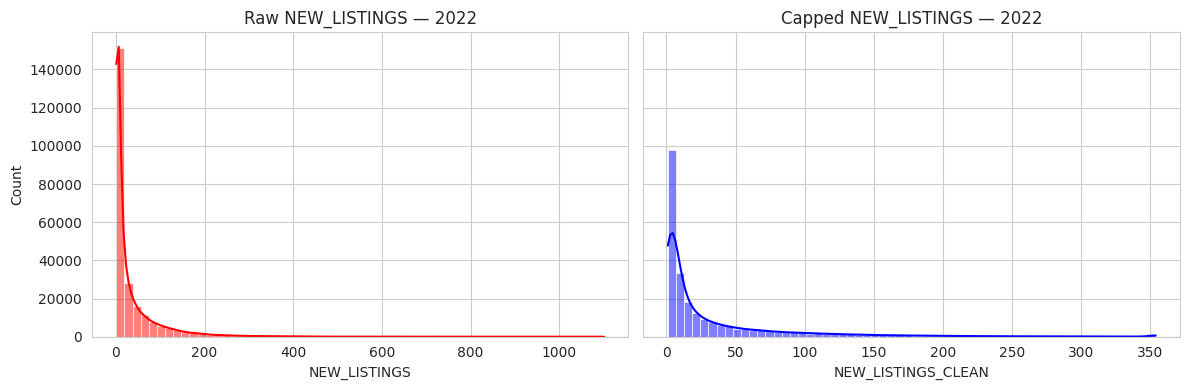

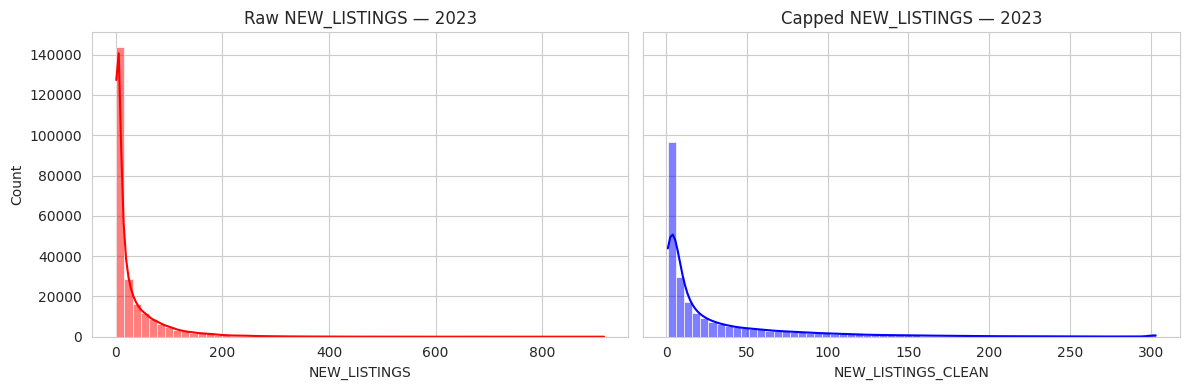

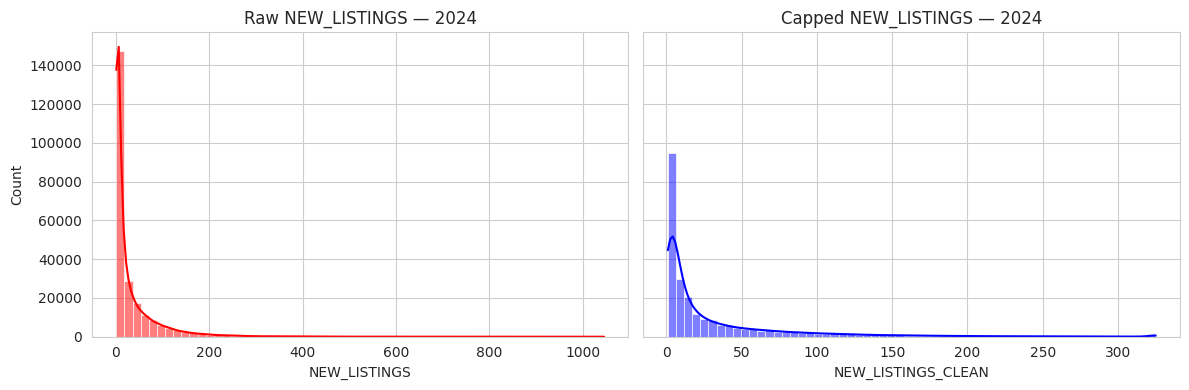

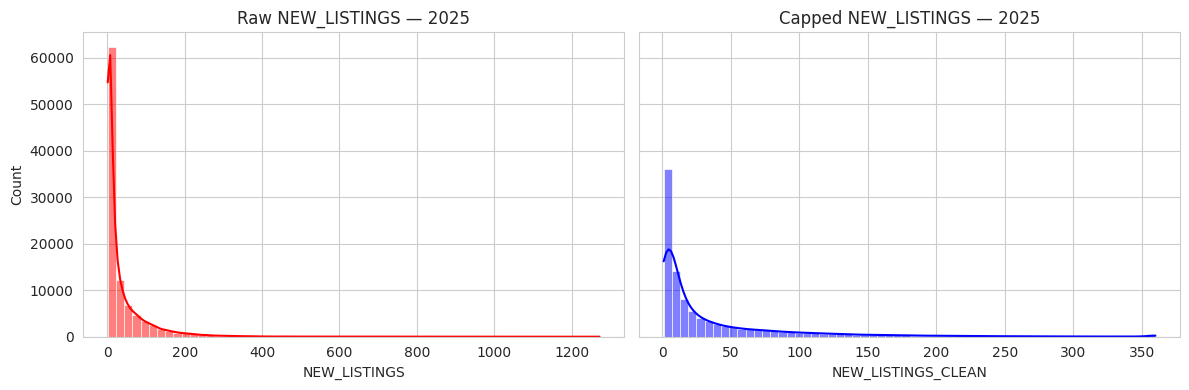

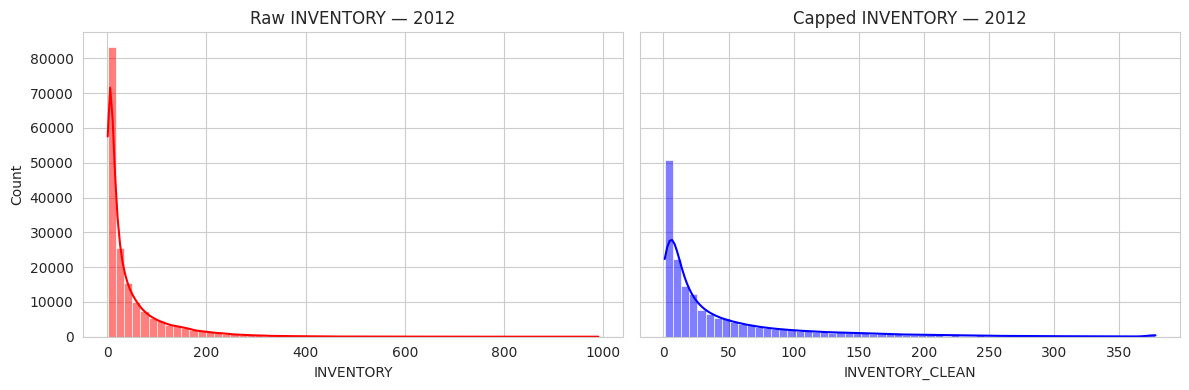

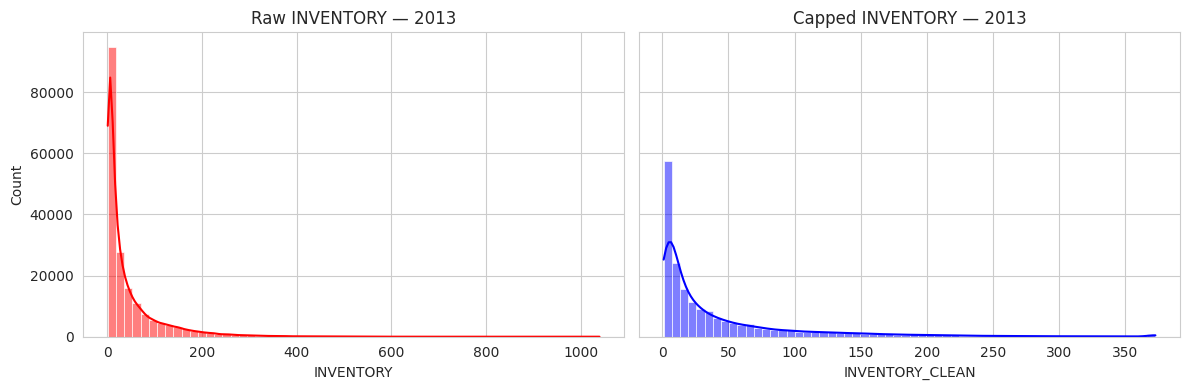

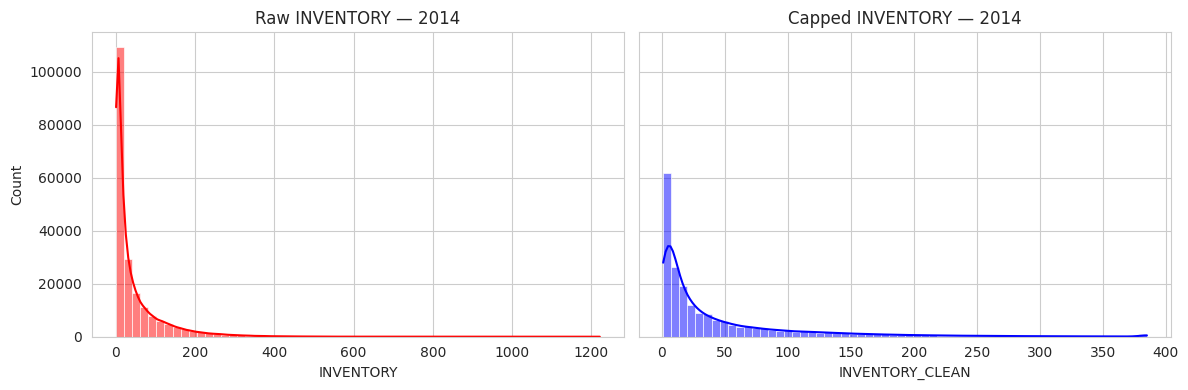

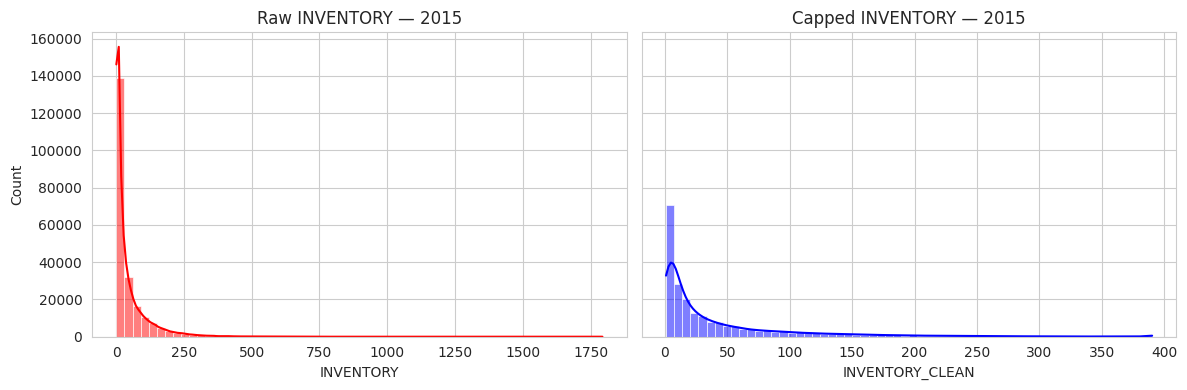

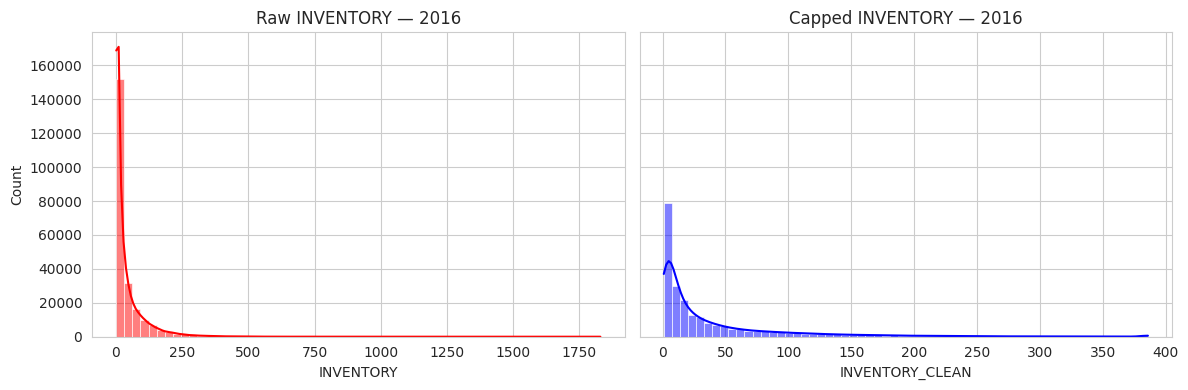

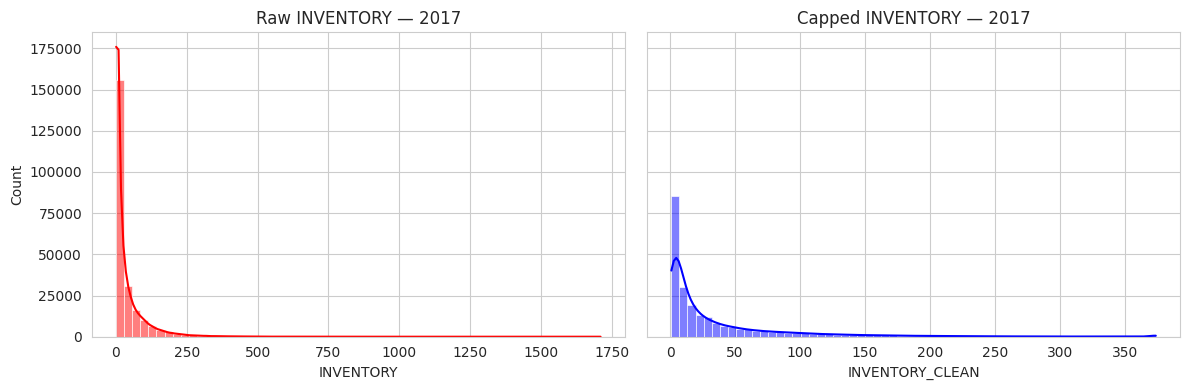

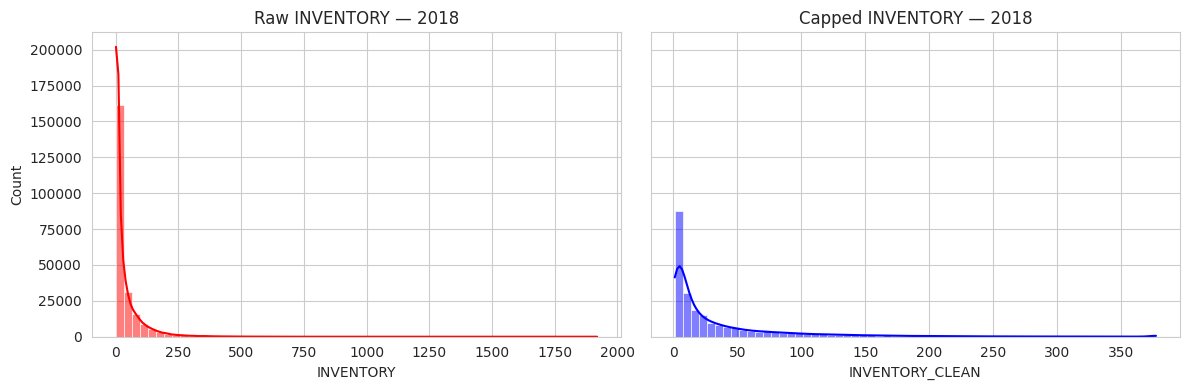

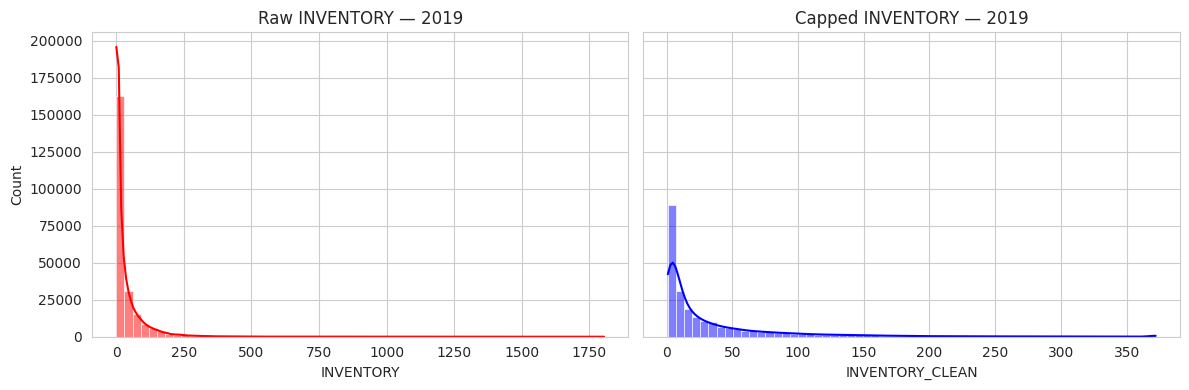

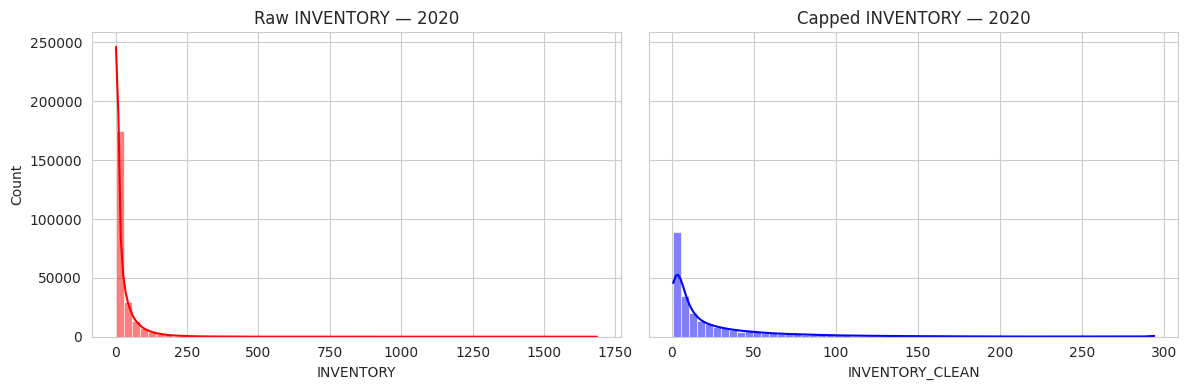

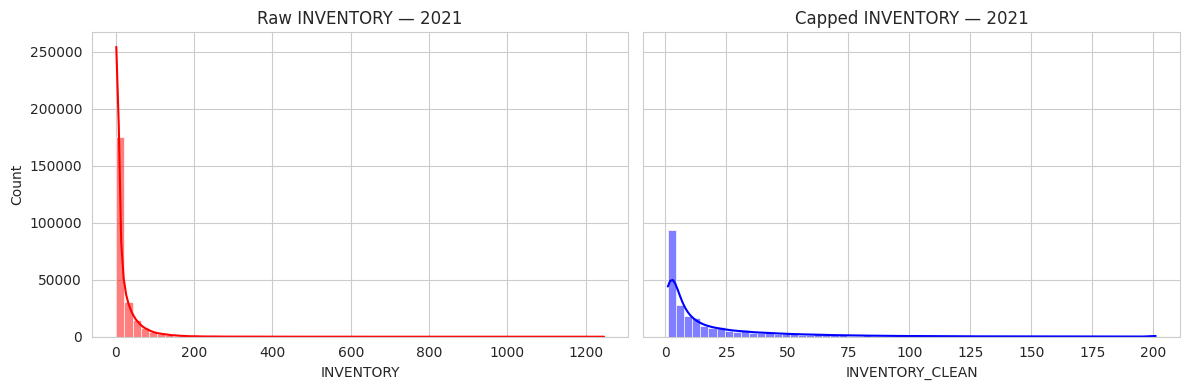

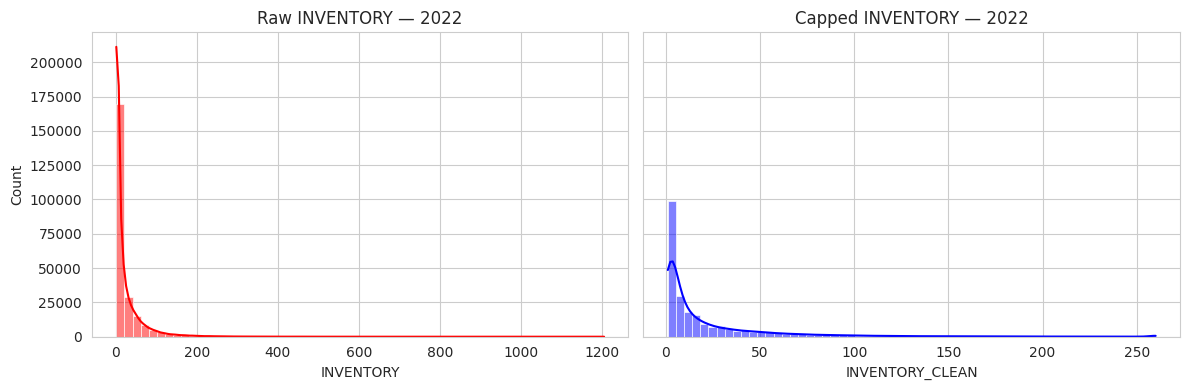

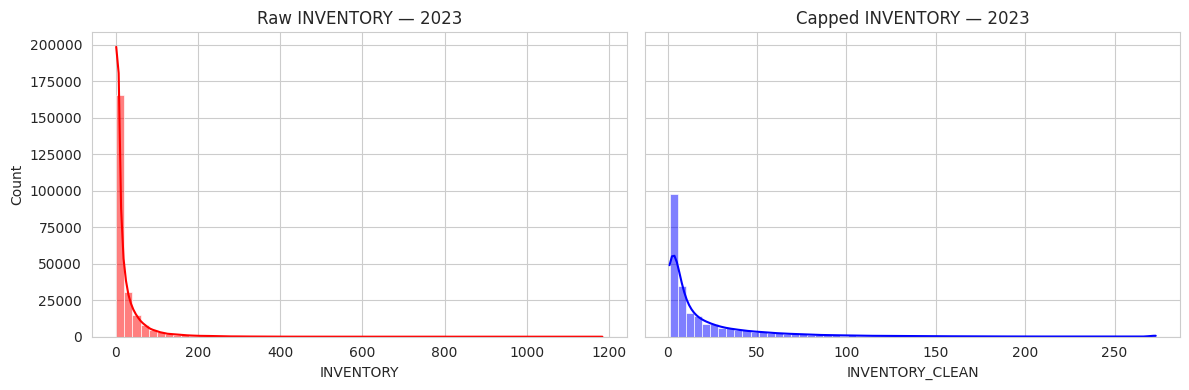

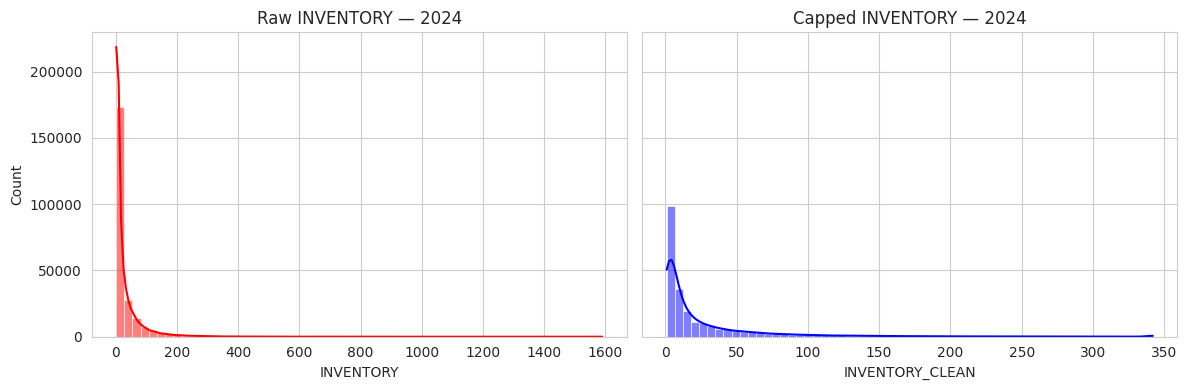

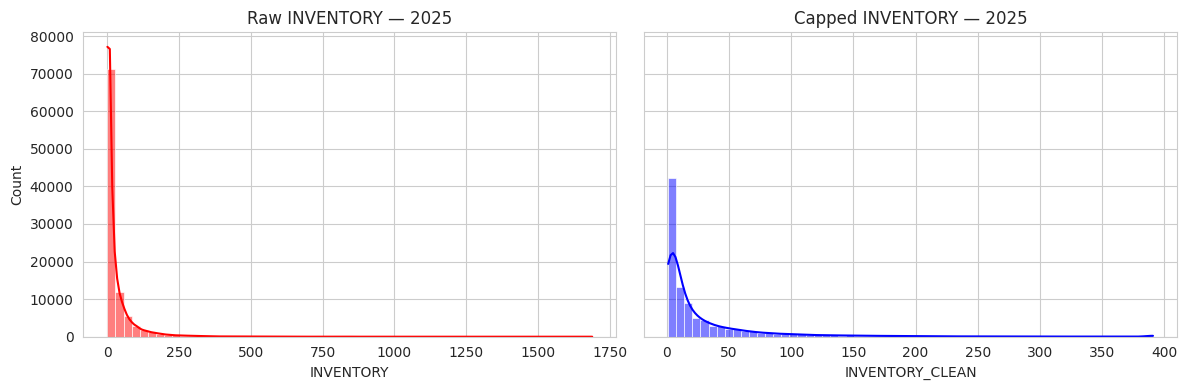

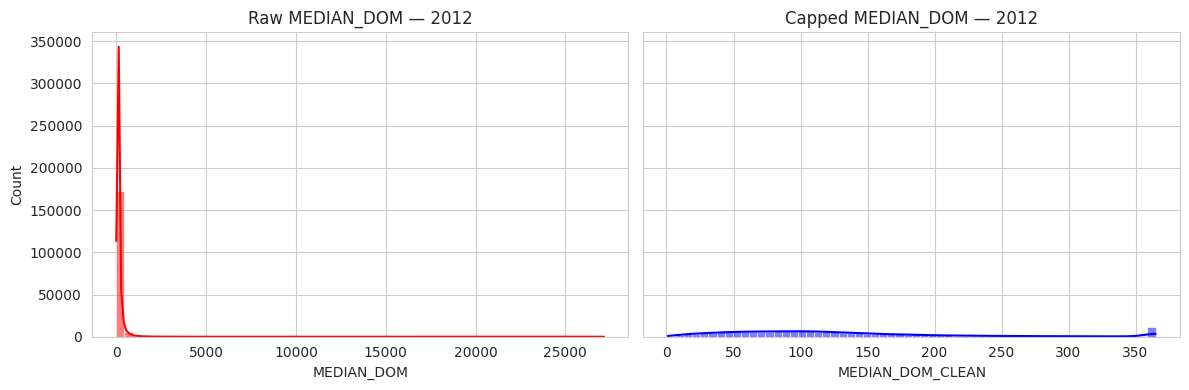

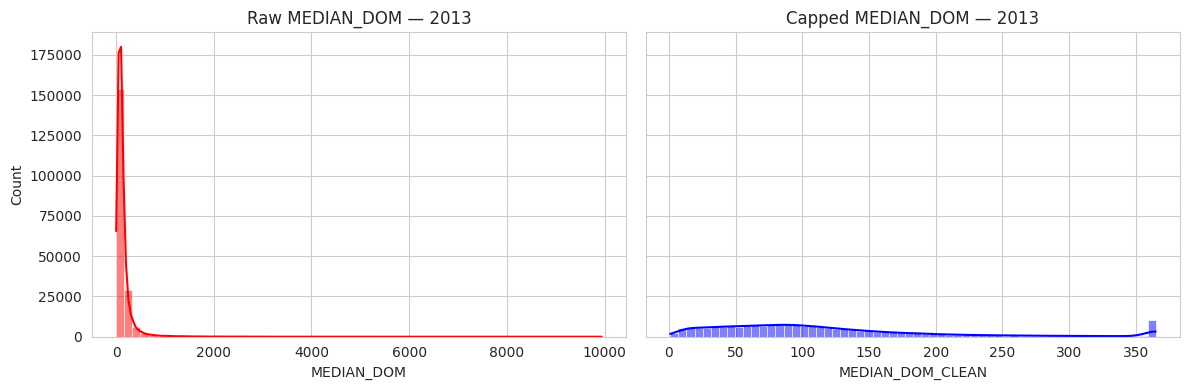

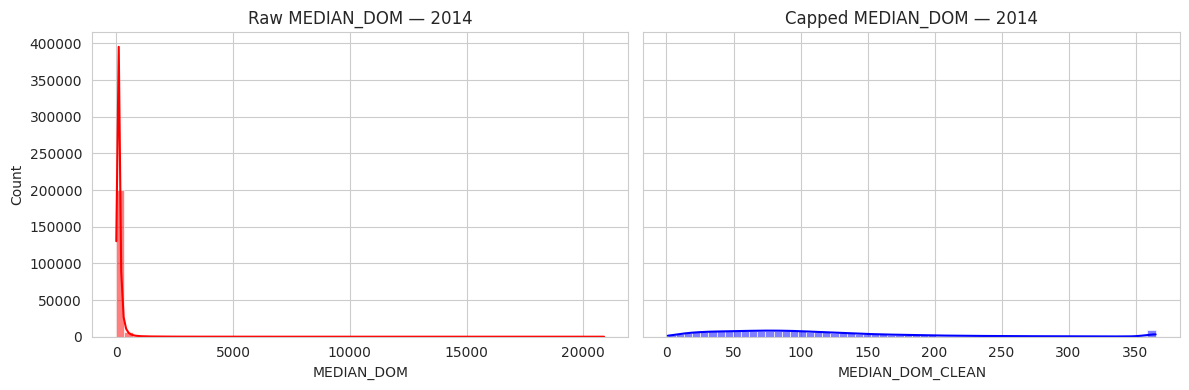

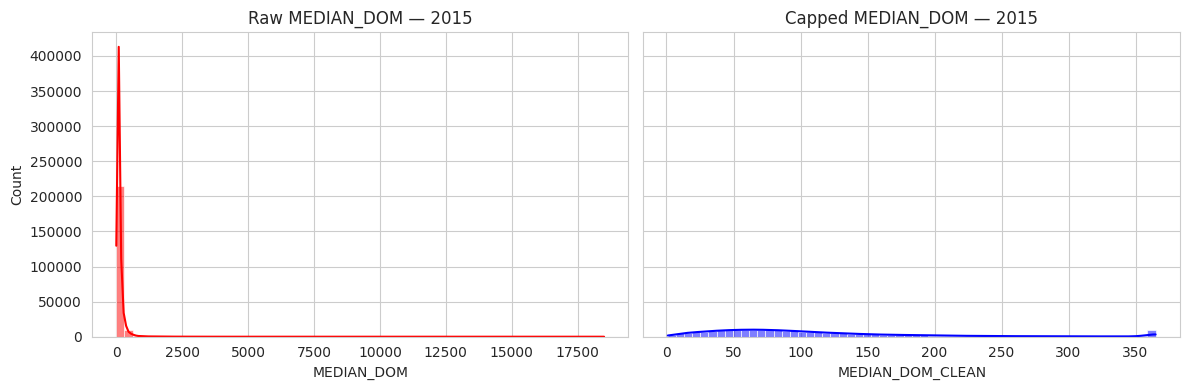

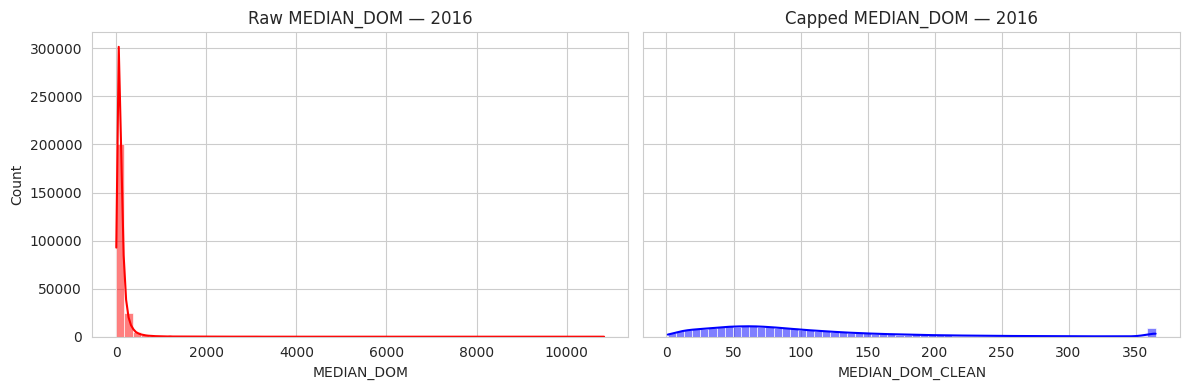

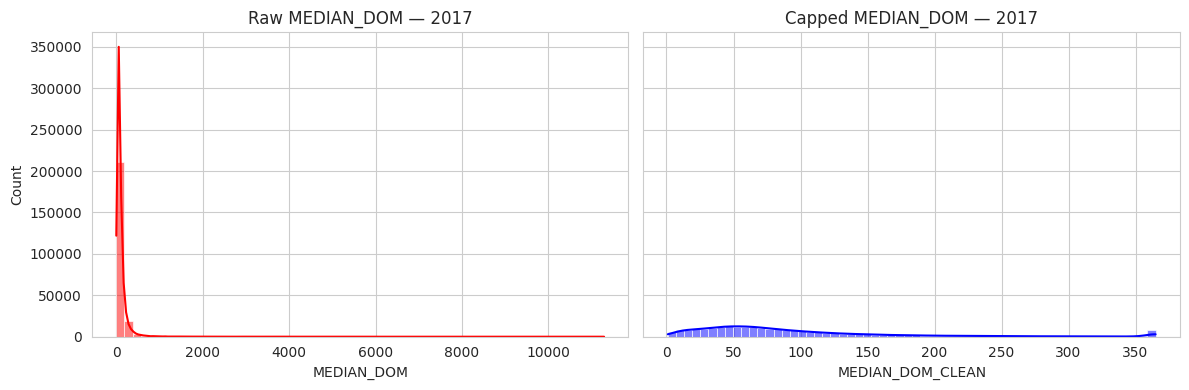

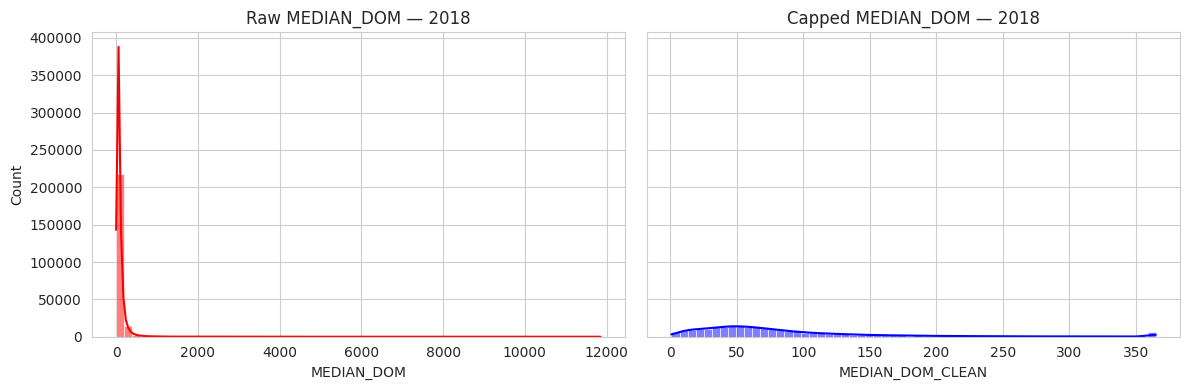

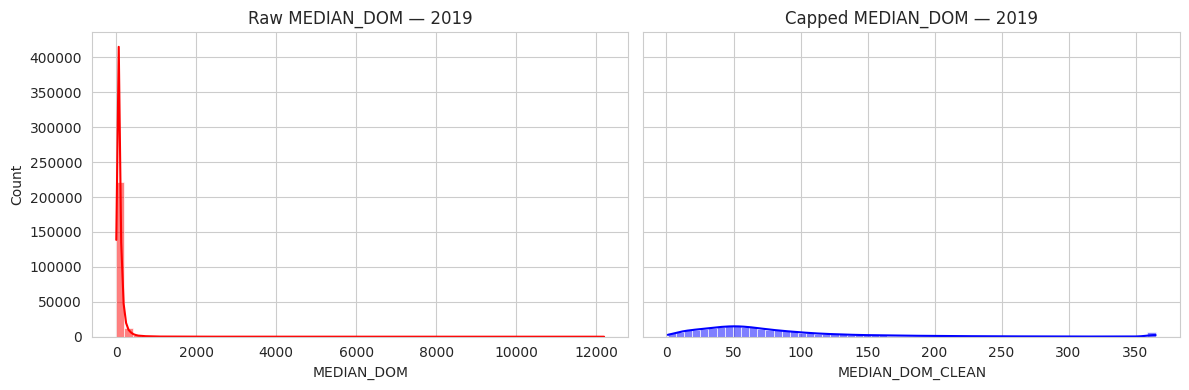

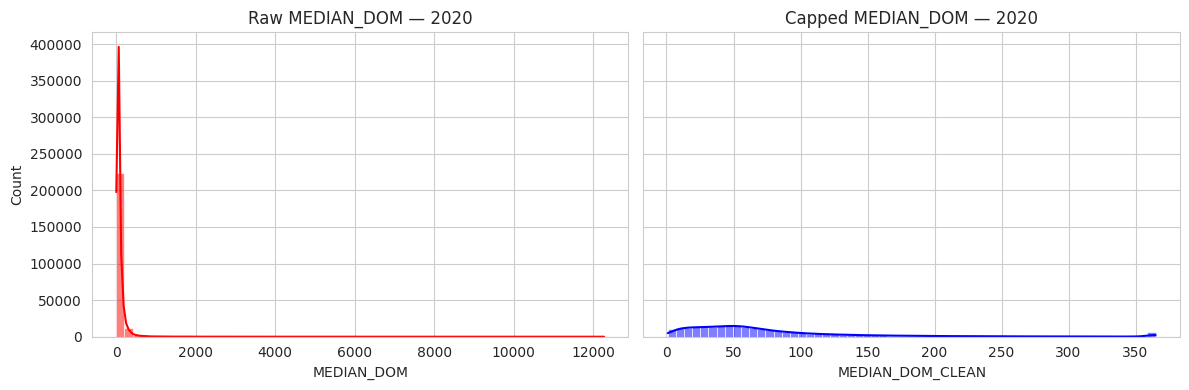

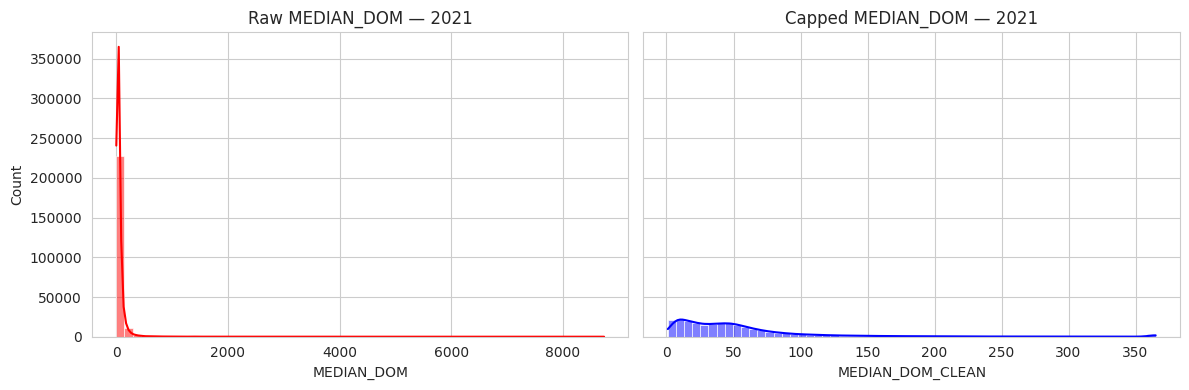

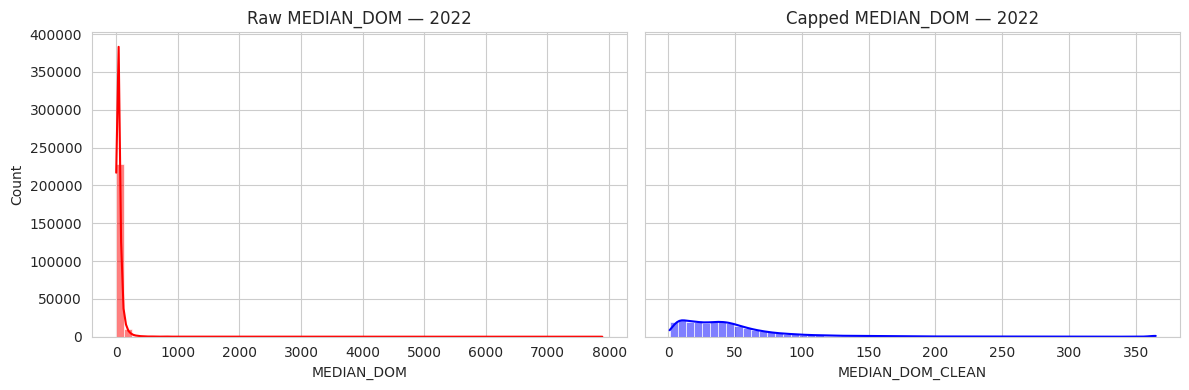

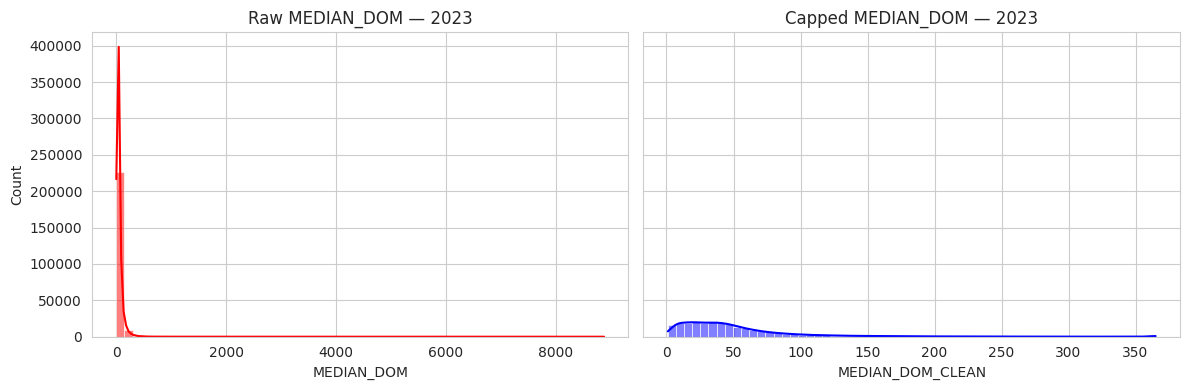

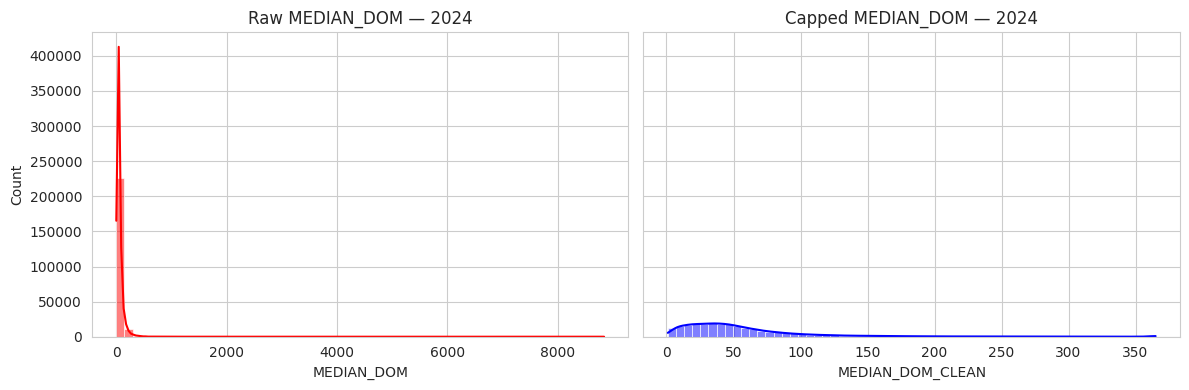

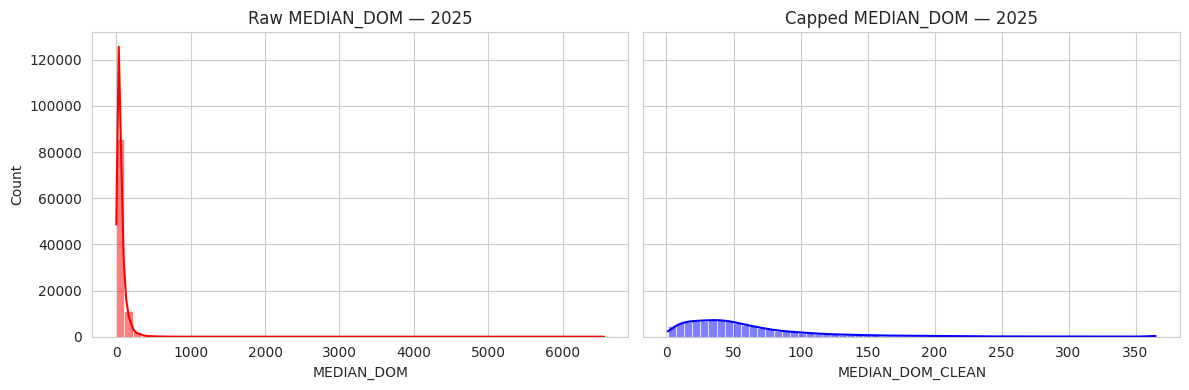

In [23]:
# List of metrics for visualization
metrics_to_plot = [
    "MEDIAN_SALE_PRICE",
    "MEDIAN_LIST_PRICE",
    "MEDIAN_PPSF",
    "MEDIAN_LIST_PPSF",
    "HOMES_SOLD",
    "NEW_LISTINGS",
    "INVENTORY",
    "MEDIAN_DOM"
]

# Function to plot raw vs capped per year
def plot_raw_vs_capped(df, metric, years):
    for year in years:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
        raw_data = df.loc[df["YEAR"] == year, metric]
        capped_data = df.loc[df["YEAR"] == year, metric + "_CLEAN"]

        sns.histplot(raw_data, bins=60, kde=True, ax=axes[0], color="red")
        axes[0].set_title(f"Raw {metric} — {year}")
        axes[0].set_xlabel(metric)

        sns.histplot(capped_data, bins=60, kde=True, ax=axes[1], color="blue")
        axes[1].set_title(f"Capped {metric} — {year}")
        axes[1].set_xlabel(metric + "_CLEAN")

        plt.tight_layout()
        plt.show()

# Get unique years
years = sorted(df["YEAR"].unique())

# Loop through metrics
for metric in metrics_to_plot:
    plot_raw_vs_capped(df_capped, metric, years)


### Depending on the budget

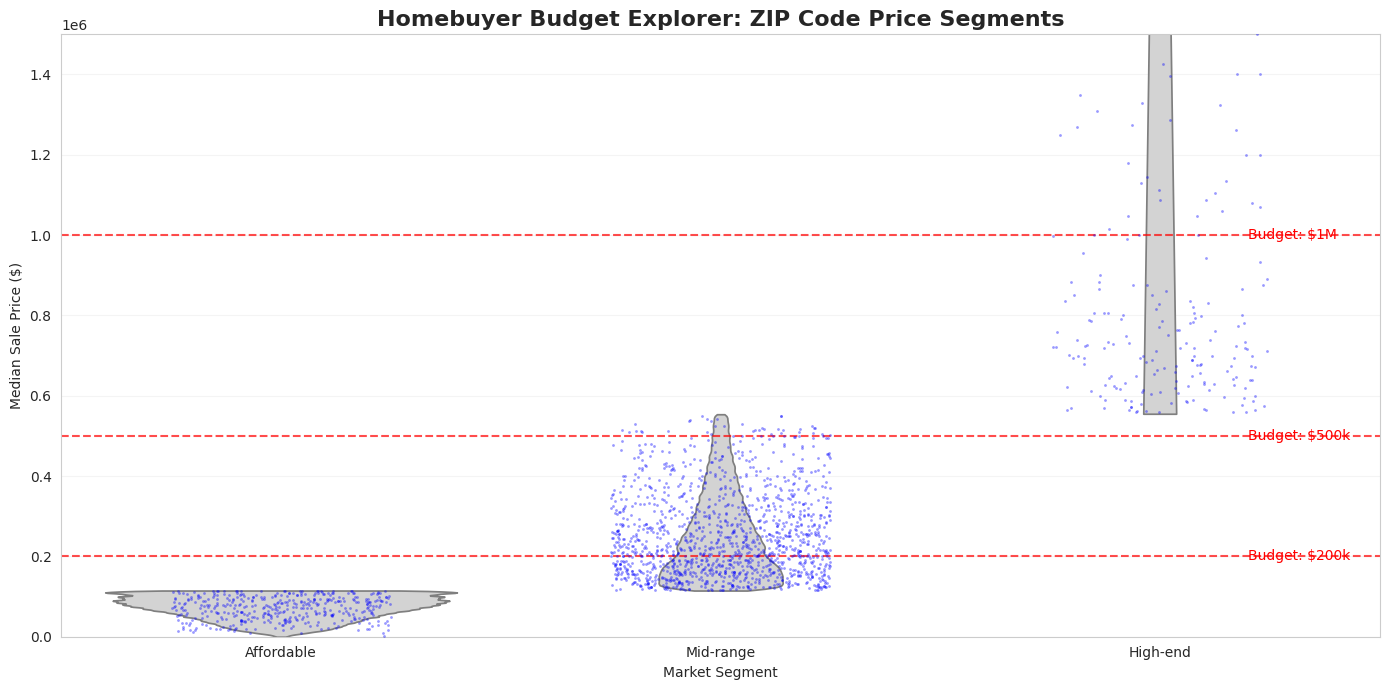

In [24]:
# Assume df already has MEDIAN_SALE_PRICE and PRICE_SEGMENT
# If not, create price segments by quantiles
df['PRICE_SEGMENT'] = pd.qcut(
    df['MEDIAN_SALE_PRICE'],
    q=[0, 0.2, 0.9, 1.0],
    labels=['Affordable', 'Mid-range', 'High-end'],
    duplicates='drop'
)

# --- Create budget bands
budget_bands = [200_000, 500_000, 1_000_000]  # sample budgets: 200k, 500k, 1M
band_labels = ['Budget: $200k', 'Budget: $500k', 'Budget: $1M']

# --- Plot
plt.figure(figsize=(14, 7))
sns.violinplot(
    x="PRICE_SEGMENT", y="MEDIAN_SALE_PRICE", data=df,
    inner=None, color="lightgray", cut=0
)
sns.stripplot(
    x="PRICE_SEGMENT", y="MEDIAN_SALE_PRICE", data=df.sample(2000),  # sample for readability
    jitter=0.25, alpha=0.4, size=2, color="blue"
)

# --- Add horizontal budget lines
for b, label in zip(budget_bands, band_labels):
    plt.axhline(b, color='red', linestyle='--', alpha=0.7)
    plt.text(2.2, b, label, color='red', va='center', fontsize=10)

# --- Titles & Labels
plt.title("Homebuyer Budget Explorer: ZIP Code Price Segments", fontsize=16, weight='bold')
plt.xlabel("Market Segment")
plt.ylabel("Median Sale Price ($)")
plt.ylim(0, 1_500_000)  # cap for main view
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


## 🏠 Homebuyer Budget Explorer – Conclusions

### 1. Market Segmentation Insights
- **Affordable Segment**  
  - Most ZIPs have prices **well below $200k**.  
  - Budgets between **$200k–$500k** cover **nearly the entire segment** easily.

- **Mid-range Segment**  
  - Concentrated roughly in the **$200k–$500k** range, peaking around **$300–$350k**.  
  - Budgets under **$200k** access very few ZIPs here, while **$500k covers nearly all** mid-range areas.

- **High-end Segment**  
  - Starts **around $500k** and rises toward **$1M+**.  
  - Only a **small fraction** of ZIPs in this segment fall below the $500k mark.

---

### 2. Budget-Based Takeaways
- **Budget ≤ $200k**  
  - Limited to Affordable ZIPs.  
  - Almost **no access** to Mid-range or High-end markets.

- **Budget ≈ $500k**  
  - Opens up **the entire Affordable + Mid-range segments**.  
  - Only a **few lower-end High-end ZIPs** become possible.

- **Budget ≥ $1M**  
  - Covers **nearly all ZIPs**, including the **luxury markets**.

---

### 3. Market Structure Summary
- The **Affordable + Mid-range ZIPs** form the **bulk of the housing market**.  
- **High-end ZIPs** represent a **small but very expensive tail**.  
- The **$500k mark** acts as a **tipping point**:  
  - Below it → mostly regular housing markets.  
  - Above it → entry into premium areas.

---

### Next Step
**Affordability Curve** to quantify:  
> *“What % of ZIPs can a buyer afford at each budget level?”*  

This would turn the visualization into **actionable numbers** for customers.


## Affordability Curve

In [25]:
# Minimal cleaning if you have raw df
df_cleaned = df.copy()

# Drop NaNs and nonpositive prices
df_cleaned = df_cleaned[pd.to_numeric(df_cleaned["MEDIAN_SALE_PRICE"], errors="coerce").notna()]
df_cleaned = df_cleaned[df_cleaned["MEDIAN_SALE_PRICE"] > 0]


## Affordability by year at key budgets (% of ZIPs ≤ budget)

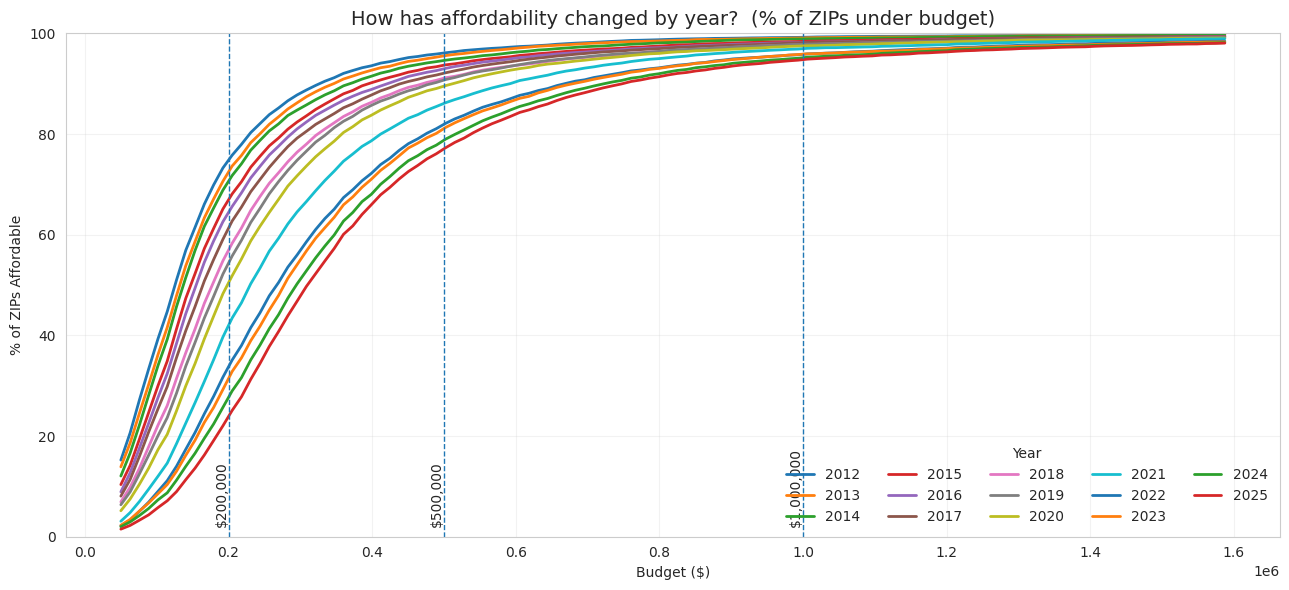

Affordability by year at key budgets (% of ZIPs ≤ budget):


Year  ≤ $200,000  ≤ $500,000  ≤ $1,000,000
0   2012       75.10       96.10         99.20
1   2013       72.70       95.60         99.10
2   2014       70.80       94.60         98.90
3   2015       67.20       93.70         98.40
4   2016       64.80       93.00         98.20
5   2017       61.60       92.10         98.20
6   2018       57.20       91.20         97.80
7   2019       54.60       90.80         97.90
8   2020       50.70       89.60         97.50
9   2021       42.30       86.20         97.00
10  2022       34.10       82.00         95.90
11  2023       31.70       81.20         95.90
12  2024       28.00       78.90         95.20
13  2025       24.20       77.20         94.80

In [26]:
# === Multi-Year Affordability Curves: "% of ZIPs under budget" ===
# Title: "How has affordability changed by year?"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- CONFIG ----
PRICE_COL   = "MEDIAN_SALE_PRICE"
YEAR_CANDS  = ["YEAR", "year", "Year", "DATE_YEAR", "date_year"]
ZIP_CANDS   = ["ZIP", "ZIP_CODE", "zip", "zipcode", "ZipCode", "postal_code"]

BUDGETS     = [200_000, 500_000, 1_000_000]   # annotate these on each plot
GRID_START  = 50_000                           # grid starts here
GRID_PCTL   = 0.99                             # go up to 99th pct to avoid extreme tails
MIN_YEARS   = 3                                # if too many years, we’ll still plot them all but warn

# ---- INPUT: use your cleaned dataframe (required) ----
# Expect df_cleaned in session. If you only have df, swap df_cleaned = df.copy()
try:
    _ = df_cleaned
except NameError:
    df_cleaned = df.copy()

if PRICE_COL not in df_cleaned.columns:
    raise ValueError(f"Expected '{PRICE_COL}' in df_cleaned")

# Detect year column
YEAR_COL = next((c for c in YEAR_CANDS if c in df_cleaned.columns), None)
if YEAR_COL is None:
    raise ValueError(f"Couldn't find a year column. Looked for: {YEAR_CANDS}. "
                     "Add a year column or update YEAR_CANDS.")

# Optional: coerce non-numeric prices and ensure positive
df_cleaned = df_cleaned.copy()
df_cleaned[PRICE_COL] = pd.to_numeric(df_cleaned[PRICE_COL], errors="coerce")
df_cleaned = df_cleaned[df_cleaned[PRICE_COL] > 0]
df_cleaned = df_cleaned[df_cleaned[YEAR_COL].notna()]

# If multiple rows per ZIP per year, dedupe so each ZIP counts once per year
ZIP_COL = next((c for c in ZIP_CANDS if c in df_cleaned.columns), None)
if ZIP_COL is not None:
    base = (df_cleaned[[YEAR_COL, ZIP_COL, PRICE_COL]]
            .dropna(subset=[PRICE_COL])
            .drop_duplicates(subset=[YEAR_COL, ZIP_COL]))
else:
    base = df_cleaned[[YEAR_COL, PRICE_COL]].dropna()

years = sorted(base[YEAR_COL].unique())
if len(years) < MIN_YEARS:
    print(f"Note: Only {len(years)} distinct year(s) found: {years}")

# Build a budget grid (same across years for comparability)
p99_overall = base[PRICE_COL].quantile(GRID_PCTL)
x_grid = np.linspace(GRID_START, p99_overall, 120)

# Compute affordability curves per year
curves = {}
for y in years:
    sub = base.loc[base[YEAR_COL] == y, PRICE_COL].values
    if len(sub) == 0:
        continue
    curves[y] = (sub.reshape(1, -1) <= x_grid.reshape(-1, 1)).mean(axis=1) * 100

# ---- Plot
plt.figure(figsize=(13, 6))
for y in years:
    if y in curves:
        plt.plot(x_grid, curves[y], label=str(int(y)) if isinstance(y, (int, np.integer)) else str(y), linewidth=2)

# Annotations for key budgets (draw once, values differ per year—so we just mark the x)
for b in BUDGETS:
    plt.axvline(b, linestyle="--", linewidth=1)
    plt.text(b, 2, f"${b:,.0f}", rotation=90, va="bottom", ha="right")

plt.title("How has affordability changed by year?  (% of ZIPs under budget)", fontsize=14)
plt.xlabel("Budget ($)")
plt.ylabel("% of ZIPs Affordable")
plt.ylim(0, 100)
plt.grid(True, alpha=0.25)
plt.legend(title="Year", ncol=min(5, len(years)), loc="lower right", frameon=False)
plt.tight_layout()
plt.show()

# ---- Summary table: % of ZIPs affordable at key budgets by year
summary_rows = []
for y in years:
    sub = base.loc[base[YEAR_COL] == y, PRICE_COL]
    if len(sub) == 0:
        continue
    row = {"Year": y}
    for b in BUDGETS:
        row[f"≤ ${b:,.0f}"] = round((sub <= b).mean() * 100, 1)
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows).sort_values("Year")
print("Affordability by year at key budgets (% of ZIPs ≤ budget):")
summary_df


## How Has Affordability Changed by Year?

The chart shows **what percentage of ZIP codes are affordable** at different budget levels across years (2012–2025).  
The table below summarizes key points for three budget thresholds: **200k, 500k, and 1M**.

---

### 1. Key Observations from the Chart
- **Affordability Decline Over Time**  
  - In 2012, **75% of ZIPs** were affordable under **200k**.  
  - By 2025, only **24%** were under the same budget.  
  - Similar downward trends exist for **500k** and **1M**, though less steep.

- **200k Buyers Hit Hardest**  
  - 75% → 24% (2012–2025): a **two-thirds drop** in affordability.  
  - By 2025, $200k buyers have access to **less than one-quarter of ZIPs**.

- **500k Still a Middle Ground**  
  - 96% → 77% (2012–2025): noticeable drop but still **3 out of 4 ZIPs** are accessible at $500k.

- **1M Remains High Access**  
  - 99% → 95% (2012–2025):  
  - Even with rising prices, **1M buyers** can still access nearly the **entire market**.

---

### 2. Conclusions
1. **Housing is getting less affordable**:  
   - The steepest decline is for **lower budgets** (≤ $200k).  
   - The curve shifts **upward** as budgets rise, showing affordability disparity.

2. **500k is a critical threshold**:  
   - Despite declines, it still covers **over 75% of ZIPs** in 2025.  
   - Useful benchmark for *middle-class* buyers.

3. **High-end budgets ($1M)**:  
   - Remain largely unaffected, keeping **95%+ access** even in 2025.

4. **Policy & Planning Insight**:  
   - Affordability crisis concentrated among **lower-income buyers**.  
   - Year-over-year declines highlight the **need for affordable housing initiatives**.


## Entry-Level Investment Hotspots
- Question: Where can first-time buyers find affordable homes with good appreciation AND low volatility?
  
- Why it matters: Combines price, growth, and stability into one ranking for safer investments.
  
- How: Create a composite score balancing affordability, growth, and volatility.

/tmp/ipykernel_39761/954921678.py:100: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_zip_features)



=== Entry-Level Investment Hotspots — Budget $200,000 ===


ZIP_CODE  latest_year  latest_price  cagr  volatility  afford_score  \
0      18230     2,023.00         94000 21.24        9.10          1.00   
1      46806     2,025.00        130000 20.48        5.76          0.85   
2      17934     2,025.00         65000 25.74       17.04          1.00   
3      44507     2,025.00         70000 21.03       14.17          1.00   
4      44506     2,025.00         79000 22.57       15.18          1.00   
5      26750     2,025.00         45000 51.69       20.66          1.00   
6      63876     2,025.00         92000 32.33       20.94          1.00   
7      17884     2,024.00        100000 41.42       18.97          1.00   
8      67640     2,025.00         91000 27.21       20.53          1.00   
9      63345     2,023.00         37000 27.62       19.63          1.00   
10     17948     2,025.00         78000 21.22       15.57          1.00   
11     17952     2,025.00         72500 28.01       20.33          1.00   
12     85605     2,025.00         43000 57.43       19.92          1.00   
13     61442     2,024.00         72500 35.51       19.99          1.00   
14     51033     2,025.00         64000 43.72       21.38          1.00   
15     75157     2,024.00         76500 24.34       19.68          1.00   
16     50565     2,025.00         82000 21.40       17.79          1.00   
17     61416     2,024.00         45500 23.36       20.01          1.00   
18     64457     2,024.00         85000 28.67       21.91          1.00   
19     25635     2,025.00         87500 25.74       20.50          1.00   
20     63147     2,025.00        100000 22.99       11.91          1.00   
21     25649     2,024.00        100000 21.43       21.91          1.00   
22     48557     2,024.00         89500 30.79       17.38          1.00   
23     16619     2,024.00         91500 54.64       20.01          1.00   
24     31519     2,024.00         96300 20.91       17.89          1.00   

    growth_score  stability_score  ELIS  years_covered  
0           1.00             0.09  0.82           6.00  
1           1.00             0.42  0.81          13.00  
2           1.00             0.00  0.80           9.00  
3           1.00             0.00  0.80          14.00  
4           1.00             0.00  0.80          14.00  
5           1.00             0.00  0.80          14.00  
6           1.00             0.00  0.80           6.00  
7           1.00             0.00  0.80          11.00  
8           1.00             0.00  0.80          13.00  
9           1.00             0.00  0.80           7.00  
10          1.00             0.00  0.80          14.00  
11          1.00             0.00  0.80          12.00  
12          1.00             0.00  0.80          13.00  
13          1.00             0.00  0.80          13.00  
14          1.00             0.00  0.80           8.00  
15          1.00             0.00  0.80          10.00  
16          1.00             0.00  0.80           9.00  
17          1.00             0.00  0.80           6.00  
18          1.00             0.00  0.80           6.00  
19          1.00             0.00  0.80          12.00  
20          1.00             0.00  0.80          13.00  
21          1.00             0.00  0.80           6.00  
22          1.00             0.00  0.80           6.00  
23          1.00             0.00  0.80           8.00  
24          1.00             0.00  0.80           6.00


=== Entry-Level Investment Hotspots — Budget $350,000 ===


ZIP_CODE  latest_year  latest_price   cagr  volatility  afford_score  \
0      46806     2,025.00        130000  20.48        5.76          1.00   
1      48210     2,025.00        128500  19.63        7.53          1.00   
2      46803     2,025.00        144500  24.63        8.95          1.00   
3      18230     2,023.00         94000  21.24        9.10          1.00   
4      28309     2,023.00        204000  24.10        7.13          0.92   
5      46016     2,025.00        110000  16.85        7.68          1.00   
6      70355     2,025.00        144500  24.63       19.12          1.00   
7      61812     2,024.00        171000  74.49       20.08          1.00   
8      48238     2,025.00        103000  23.00       13.47          1.00   
9      35442     2,025.00        165850  26.34       18.71          1.00   
10     74026     2,025.00        145000  20.18       18.24          1.00   
11     14732     2,023.00        130000 113.99       19.20          1.00   
12     13364     2,023.00        170000  75.30       19.94          1.00   
13     13475     2,024.00        155000  25.49       19.73          1.00   
14     25607     2,024.00        147250 107.13       18.23          1.00   
15     25649     2,024.00        100000  21.43       21.91          1.00   
16     25635     2,025.00         87500  25.74       20.50          1.00   
17     16729     2,024.00        153000  26.37       18.22          1.00   
18     61315     2,024.00         29000  36.51       21.38          1.00   
19     61606     2,025.00        147500  20.70       14.40          1.00   
20     85605     2,025.00         43000  57.43       19.92          1.00   
21     35060     2,024.00         36000  29.00       18.89          1.00   
22     61369     2,025.00        136250  20.32       16.61          1.00   
23     61363     2,025.00        155000  21.99       17.49          1.00   
24     70753     2,025.00        105000  27.29       18.96          1.00   

    growth_score  stability_score  ELIS  years_covered  
0           1.00             0.42  0.89          13.00  
1           0.99             0.25  0.84          13.00  
2           1.00             0.10  0.82          12.00  
3           1.00             0.09  0.82           6.00  
4           1.00             0.29  0.82           7.00  
5           0.87             0.23  0.81          14.00  
6           1.00             0.00  0.80          10.00  
7           1.00             0.00  0.80           6.00  
8           1.00             0.00  0.80          13.00  
9           1.00             0.00  0.80          13.00  
10          1.00             0.00  0.80          11.00  
11          1.00             0.00  0.80           8.00  
12          1.00             0.00  0.80          11.00  
13          1.00             0.00  0.80           6.00  
14          1.00             0.00  0.80           7.00  
15          1.00             0.00  0.80           6.00  
16          1.00             0.00  0.80          12.00  
17          1.00             0.00  0.80          10.00  
18          1.00             0.00  0.80           9.00  
19          1.00             0.00  0.80          14.00  
20          1.00             0.00  0.80          13.00  
21          1.00             0.00  0.80          12.00  
22          1.00             0.00  0.80          14.00  
23          1.00             0.00  0.80          13.00  
24          1.00             0.00  0.80          11.00


=== Entry-Level Investment Hotspots — Budget $500,000 ===


ZIP_CODE  latest_year  latest_price  cagr  volatility  afford_score  \
0      46806     2,025.00        130000 20.48        5.76          1.00   
1      75342     2,023.00        260000 52.56        5.55          0.98   
2      28309     2,023.00        204000 24.10        7.13          1.00   
3      48210     2,025.00        128500 19.63        7.53          1.00   
4      83302     2,024.00        225000 42.22        8.09          1.00   
5      43832     2,025.00        203691 20.23        8.62          1.00   
6      46803     2,025.00        144500 24.63        8.95          1.00   
7      70401     2,025.00        221750 25.99        9.05          1.00   
8      18230     2,023.00         94000 21.24        9.10          1.00   
9      60064     2,025.00        260600 23.16        8.58          0.98   
10     46016     2,025.00        110000 16.85        7.68          1.00   
11     39363     2,024.00        125500 27.49       15.81          1.00   
12     39358     2,022.00        197950 28.77       17.89          1.00   
13     39354     2,024.00        186000 81.87       17.77          1.00   
14     45328     2,024.00        107410 40.58       20.89          1.00   
15     39773     2,025.00        215000 41.01       19.79          1.00   
16     70802     2,025.00        147500 22.04       19.37          1.00   
17     62628     2,025.00        135500 23.63       18.07          1.00   
18     45310     2,025.00        235000 20.90       18.85          1.00   
19     71071     2,025.00        155000 22.99       17.91          1.00   
20     43735     2,024.00        200000 73.23       17.62          1.00   
21     26559     2,025.00        206225 24.26       17.54          1.00   
22     79839     2,025.00        235000 36.60       18.09          1.00   
23     49262     2,025.00        235000 22.34       15.99          1.00   
24     15724     2,025.00        170213 32.48       16.87          1.00   

    growth_score  stability_score  ELIS  years_covered  
0           1.00             0.42  0.89          13.00  
1           1.00             0.44  0.88           6.00  
2           1.00             0.29  0.86           7.00  
3           0.99             0.25  0.84          13.00  
4           1.00             0.19  0.84           7.00  
5           1.00             0.14  0.83          14.00  
6           1.00             0.10  0.82          12.00  
7           1.00             0.09  0.82          14.00  
8           1.00             0.09  0.82           6.00  
9           1.00             0.14  0.82          14.00  
10          0.87             0.23  0.81          14.00  
11          1.00             0.00  0.80          12.00  
12          1.00             0.00  0.80           6.00  
13          1.00             0.00  0.80          10.00  
14          1.00             0.00  0.80          12.00  
15          1.00             0.00  0.80          12.00  
16          1.00             0.00  0.80          14.00  
17          1.00             0.00  0.80          14.00  
18          1.00             0.00  0.80           8.00  
19          1.00             0.00  0.80           9.00  
20          1.00             0.00  0.80          13.00  
21          1.00             0.00  0.80          11.00  
22          1.00             0.00  0.80           7.00  
23          1.00             0.00  0.80          14.00  
24          1.00             0.00  0.80          14.00

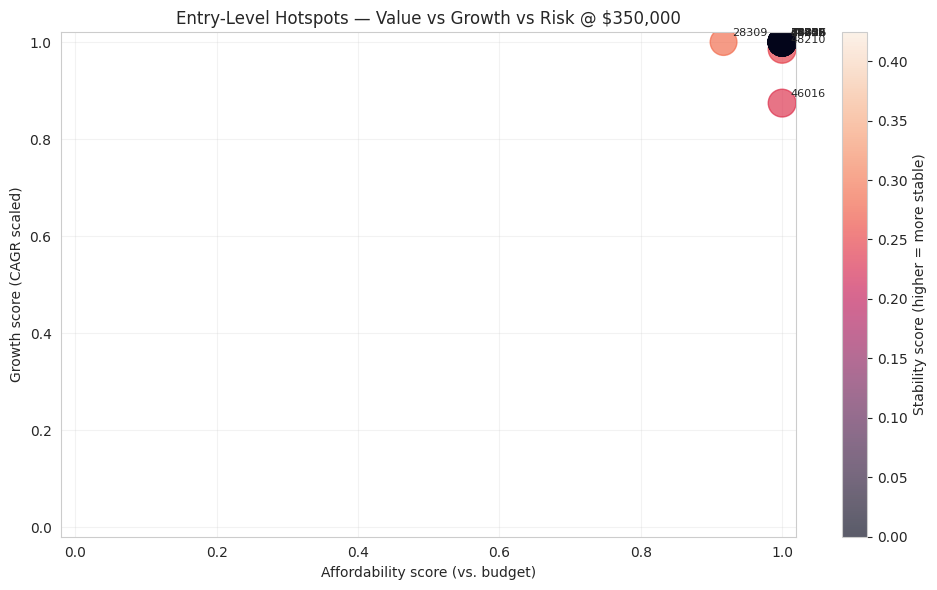

In [27]:
# =========================
# Entry-Level Investment Hotspots (Discriminative Scoring)
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
# CONFIG (tune as needed)
# -------------------------
PRICE_COL      = "MEDIAN_SALE_PRICE"
YEAR_COL_CANDS = ["YEAR", "year", "Year", "DATE_YEAR", "date_year"]
ZIP_COL_CANDS  = ["ZIP", "ZIP_CODE", "zip", "zipcode", "ZipCode", "postal_code"]

# Robustness / features
MIN_YEARS    = 6          # need longer history to avoid zero-vol artifacts
CAGR_WINDOW  = 5          # up to last 5 years
RET_WINSOR   = 0.20       # winsorize YoY returns for stability calc
VOL_CAP      = 0.10       # 10% stdev -> stability score ~ 0
CAGR_MIN     = -0.05      # winsor CAGR to [-5%, 20%]
CAGR_MAX     =  0.20

# Weights for Entry-Level Investment Score (ELIS)
W_AFF, W_GROW, W_STAB = 0.50, 0.30, 0.20

# Budgets to evaluate + how many to list
BUDGETS = [200_000, 350_000, 500_000]
TOP_N   = 25

# Plot sizing
BUBBLE_MIN, BUBBLE_MAX = 40, 400

# -------------------------
# INPUT HANDLING
# -------------------------
try:
    _ = df_cleaned
except NameError:
    df_cleaned = df.copy()

if PRICE_COL not in df_cleaned.columns:
    raise ValueError(f"Expected '{PRICE_COL}' in dataframe.")
YEAR_COL = next((c for c in YEAR_COL_CANDS if c in df_cleaned.columns), None)
ZIP_COL  = next((c for c in ZIP_COL_CANDS  if c in df_cleaned.columns), None)
if YEAR_COL is None or ZIP_COL is None:
    raise ValueError(
        "Need YEAR and ZIP columns.\n"
        f"Looked for YEAR in {YEAR_COL_CANDS} and ZIP in {ZIP_COL_CANDS}."
    )

dfp = df_cleaned[[ZIP_COL, YEAR_COL, PRICE_COL]].copy()
dfp[PRICE_COL] = pd.to_numeric(dfp[PRICE_COL], errors="coerce")
dfp[YEAR_COL]  = pd.to_numeric(dfp[YEAR_COL],  errors="coerce").astype("Int64")
dfp = dfp.dropna(subset=[ZIP_COL, YEAR_COL, PRICE_COL])
dfp = dfp[dfp[PRICE_COL] > 0]

# One record per ZIP/year
dfp = dfp.groupby([ZIP_COL, YEAR_COL], as_index=False, dropna=True)[PRICE_COL].median()

# -------------------------
# FEATURE ENGINEERING
# -------------------------
def _safe_std(x):
    x = pd.Series(x).dropna()
    return float(x.std()) if len(x) else 0.0

def compute_zip_features(g: pd.DataFrame):
    g = g.dropna(subset=[YEAR_COL, PRICE_COL]).sort_values(YEAR_COL).reset_index(drop=True)
    if len(g) < MIN_YEARS:
        return None

    # YoY returns (winsorized for stability)
    g["ret"] = g[PRICE_COL].pct_change().clip(-RET_WINSOR, RET_WINSOR)
    vol = _safe_std(g["ret"])

    latest_price = float(g[PRICE_COL].iloc[-1])
    latest_year  = int(g[YEAR_COL].iloc[-1])

    # Robust CAGR (use earliest year within window, else earliest)
    target_start = latest_year - (CAGR_WINDOW - 1)
    g_in_win = g[g[YEAR_COL] >= target_start]
    if len(g_in_win) == 0:
        g_in_win = g.copy()
    start_row   = g_in_win.iloc[0]
    start_price = float(start_row[PRICE_COL])
    start_year  = int(start_row[YEAR_COL])
    years       = max(1, latest_year - start_year)
    cagr        = (latest_price / start_price)**(1/years) - 1 if start_price > 0 else 0.0

    return {
        "latest_year": latest_year,
        "latest_price": latest_price,
        "cagr": float(cagr),
        "volatility": float(vol),
        "years_covered": int(len(g))
    }

feat = (
    dfp.groupby(ZIP_COL, group_keys=False)
       .apply(compute_zip_features)
       .dropna()
       .apply(pd.Series)
       .reset_index()
       .rename(columns={"index": ZIP_COL})
)

# -------------------------
# SCORING HELPERS (spread out values)
# -------------------------
def score_affordability(price: float, budget: float) -> float:
    """
    1.0 at half budget, 0.5 at budget, 0 at 1.5x budget.
    Gives nuance among 'under budget' ZIPs.
    """
    if price <= 0.5 * budget:
        return 1.0
    if price <= budget:
        # map [0.5*B .. B] -> [1 .. 0.5]
        return 1.0 - 0.5 * (price - 0.5*budget) / (0.5*budget)
    # map [B .. 1.5*B] -> [0.5 .. 0]
    return float(np.clip(0.5 - 0.5 * (price - budget) / (0.5 * budget), 0, 1))

def score_growth(cagr: float) -> float:
    """Winsor to [CAGR_MIN, CAGR_MAX], then scale to 0..1."""
    c = float(np.clip(cagr, CAGR_MIN, CAGR_MAX))
    return (c - CAGR_MIN) / (CAGR_MAX - CAGR_MIN)

def score_stability(vol: float) -> float:
    """Lower volatility is better. 0 at >= VOL_CAP."""
    return float(np.clip(1 - vol / VOL_CAP, 0, 1))

def compute_elis_row(row: pd.Series, budget: float):
    a = score_affordability(row["latest_price"], budget)
    g = score_growth(row["cagr"])
    s = score_stability(row["volatility"])
    elis = float(W_AFF*a + W_GROW*g + W_STAB*s)
    return elis, a, g, s

def rank_for_budget(feat_df: pd.DataFrame, budget: float, top_n: int = TOP_N) -> pd.DataFrame:
    out = feat_df.copy()
    scores = out.apply(lambda r: compute_elis_row(r, budget), axis=1, result_type="expand")
    out["ELIS"], out["afford_score"], out["growth_score"], out["stability_score"] = scores[0], scores[1], scores[2], scores[3]

    cols = [ZIP_COL, "latest_year", "latest_price", "cagr", "volatility",
            "afford_score", "growth_score", "stability_score", "ELIS", "years_covered"]
    ranked = (out[cols]
              .sort_values("ELIS", ascending=False)
              .head(top_n)
              .reset_index(drop=True))

    # Human-friendly columns
    ranked["latest_price"] = ranked["latest_price"].round(0).astype(int)
    ranked["cagr"]       = (ranked["cagr"]*100).round(2)
    ranked["volatility"] = (ranked["volatility"]*100).round(2)
    ranked["ELIS"]       = ranked["ELIS"].round(3)
    return ranked

# -------------------------
# RUN RANKINGS
# -------------------------
rankings_by_budget = {}
for b in BUDGETS:
    print(f"\n=== Entry-Level Investment Hotspots — Budget ${b:,.0f} ===")
    rankings_by_budget[b] = rank_for_budget(feat, b, top_n=TOP_N)
    display(rankings_by_budget[b])

# -------------------------
# VISUAL: Value (Afford) vs Growth, size = Afford, color = Stability
# -------------------------
def plot_value_growth_scatter(ranked_df: pd.DataFrame, budget: float, label_top: int = 12):
    x = ranked_df["afford_score"].values
    y = ranked_df["growth_score"].values
    size = BUBBLE_MIN + (BUBBLE_MAX - BUBBLE_MIN) * ranked_df["afford_score"].clip(0,1).values
    color = ranked_df["stability_score"].clip(0,1).values  # darker = more stable

    labels = ranked_df[ZIP_COL].astype(str).values

    plt.figure(figsize=(10,6))
    sc = plt.scatter(x, y, s=size, c=color, alpha=0.65)
    for i in range(min(label_top, len(ranked_df))):
        plt.text(x[i]+0.012, y[i]+0.012, labels[i], fontsize=8)

    cbar = plt.colorbar(sc)
    cbar.set_label("Stability score (higher = more stable)")

    plt.xlabel("Affordability score (vs. budget)")
    plt.ylabel("Growth score (CAGR scaled)")
    plt.title(f"Entry-Level Hotspots — Value vs Growth vs Risk @ ${budget:,.0f}")
    plt.grid(True, alpha=0.25)
    plt.xlim(-0.02, 1.02)
    plt.ylim(-0.02, 1.02)
    plt.tight_layout()
    plt.show()

# Example: plot for the middle budget
if BUDGETS:
    plot_value_growth_scatter(rankings_by_budget[BUDGETS[1]], BUDGETS[1])
